![](https://drive.google.com/uc?export=view&id=1AFwhUb9nDTvKm4D6UtSE1Dtjv20THqLX)

<h1><b>Santander Product Recommendation</b></h1>
<h2><i>Can you pair products with people?</i></h2>

##<h2><b> 9. Exploratory Data Analysis</b></h2>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import math
import os
from google.colab import drive
import matplotlib.patches as mpatches
import gc

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/21_My_Case_Study_1/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<h3><b> 9.1 Data Loading </b></h3>

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
train_df = pd.read_csv('train_ver2.csv',low_memory=False)
test_df  = pd.read_csv('test_ver2.csv', low_memory=False)

In [ ]:
train_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'], dtype='object')

In [ ]:
test_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'], dtype='object')

<font color='blue'><b>As we can see all the column names are in Spanish in both train and test dataset. I will convert them into English as then it will be easier for me to perform EDA.</b></font>

In [ ]:
train_renameDict = {
    'fecha_dato'  :'Date',
    'ncodpers'    :'CustomerID',
    'ind_empleado': 'Employee',
    'pais_residencia':'Cust_Country',
    'sexo':'Sex',
    'age' :'Age',
    'fecha_alta':'EntryDate',
    'ind_nuevo' :'New',
    'antiguedad':'Seniority',
    'indrel'    : 'PrimaryCustomer',
    'ult_fec_cli_1t':'LastDateAsPrimaryCustomer',
    'indrel_1mes'   :'CustomerType',
    'tiprel_1mes'   :'CustomerRelationType',
    'indresi' :'SameResidenceCountry',
    'indext'  :'OtherBirthCountry',
    'conyuemp':'EmployeeSpouse',
    'canal_entrada':'EntryChannel',
    'indfall' :'Deceased',
    'tipodom' :'AddresType',
    'cod_prov':'ProvinceCode',
    'nomprov' :'ProvinceName',
    'ind_actividad_cliente':'Active',
    'renta':'GrossIncome',
    'segmento':'Segment',
    'ind_ahor_fin_ult1': 'SavingAccount',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1' : 'CurrentAccounts',
    'ind_cder_fin_ult1': 'DerivadaAccount',
    'ind_cno_fin_ult1' : 'PayrollAccount',
    'ind_ctju_fin_ult1': 'JuniorAccount',
    'ind_ctma_fin_ult1': 'MoreParticularAccount',
    'ind_ctop_fin_ult1': 'ParticularAccount',
    'ind_ctpp_fin_ult1': 'ParticularPlusAccount',
    'ind_deco_fin_ult1': 'ShortTermDeposits',
    'ind_deme_fin_ult1': 'MediumTermDeposits',
    'ind_dela_fin_ult1': 'LongTermDeposits',
    'ind_ecue_fin_ult1': 'E_Account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1' : 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions_1',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'CreditCard',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1' : 'HomeAccount',
    'ind_nomina_ult1'  : 'Payroll',
    'ind_nom_pens_ult1': 'Pensions_2',
    'ind_recibo_ult1'  : 'DirectDebit'}

products = ['SavingAccount','Guarantees','CurrentAccounts', 
            'DerivadaAccount', 'PayrollAccount','JuniorAccount', 
            'MoreParticularAccount', 'ParticularAccount','ParticularPlusAccount', 
            'ShortTermDeposits', 'MediumTermDeposits','LongTermDeposits', 
            'E_Account', 'Funds', 'Mortgage', 'Pensions_1','Loans', 'Taxes', 
            'CreditCard', 'Securities', 'HomeAccount', 'Payroll','Pensions_2','DirectDebit']

In [ ]:
train_df = train_df.rename(columns = train_renameDict)
test_df  = test_df.rename(columns = train_renameDict)

In [ ]:
train_df.head(2)

Date  CustomerID Employee Cust_Country Sex  Age   EntryDate  New Seniority  PrimaryCustomer LastDateAsPrimaryCustomer CustomerType CustomerRelationType SameResidenceCountry OtherBirthCountry EmployeeSpouse EntryChannel Deceased  AddresType  ProvinceCode ProvinceName  Active  GrossIncome             Segment  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit
0  2015-01-28     1375586        N           ES   H   35  2015-01-12  0.0         6              1.0                       NaN          1.0                    A                    S                 N            NaN          KHL        N         1.0          29.0       MALAGA     1.0     87218.10   02 - PARTICULARES              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0
1  2015-01-28     1050611        N           ES   V   23  2012-08-10  0.0        35              1.0                       NaN            1                    I                    S                 S            NaN          KHE        N         1.0          13.0  CIUDAD REAL     0.0     35548.74  03 - UNIVERSITARIO              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0

In [ ]:
train_df.shape

(13647309, 48)

In [ ]:
test_df.head(2)

Date  CustomerID Employee Cust_Country Sex  Age   EntryDate  New  Seniority  PrimaryCustomer LastDateAsPrimaryCustomer  CustomerType CustomerRelationType SameResidenceCountry OtherBirthCountry EmployeeSpouse EntryChannel Deceased  AddresType  ProvinceCode ProvinceName  Active  GrossIncome            Segment
0  2016-06-28       15889        F           ES   V   56  1995-01-16    0        256                1                       NaN           1.0                    A                    S                 N              N          KAT        N           1          28.0       MADRID       1    326124.90           01 - TOP
1  2016-06-28     1170544        N           ES   H   36  2013-08-28    0         34                1                       NaN           1.0                    I                    S                 N            NaN          KAT        N           1           3.0     ALICANTE       0           NA  02 - PARTICULARES

In [ ]:
test_df.shape

(929615, 24)

<h3><b> 9.2 Checking for duplicate rows <b></h3>

In [ ]:
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [Date, CustomerID, Employee, Cust_Country, Sex, Age, EntryDate, New, Seniority, PrimaryCustomer, LastDateAsPrimaryCustomer, CustomerType, CustomerRelationType, SameResidenceCountry, OtherBirthCountry, EmployeeSpouse, EntryChannel, Deceased, AddresType, ProvinceCode, ProvinceName, Active, GrossIncome, Segment, SavingAccount, Guarantees, CurrentAccounts, DerivadaAccount, PayrollAccount, JuniorAccount, MoreParticularAccount, ParticularAccount, ParticularPlusAccount, ShortTermDeposits, MediumTermDeposits, LongTermDeposits, E_Account, Funds, Mortgage, Pensions_1, Loans, Taxes, CreditCard, Securities, HomeAccount, Payroll, Pensions_2, DirectDebit]
Index: []

In [ ]:
test_df[test_df.duplicated()]

Empty DataFrame
Columns: [Date, CustomerID, Employee, Cust_Country, Sex, Age, EntryDate, New, Seniority, PrimaryCustomer, LastDateAsPrimaryCustomer, CustomerType, CustomerRelationType, SameResidenceCountry, OtherBirthCountry, EmployeeSpouse, EntryChannel, Deceased, AddresType, ProvinceCode, ProvinceName, Active, GrossIncome, Segment]
Index: []

<font color='blue'><b>There are no duplicate rows in both Train and Test Dataset</b></font>

<h3><b> 9.3 Checking for Cold Start Problem <b></h3>

In [ ]:
set(test_df.CustomerID.values.tolist()) - set(train_df.CustomerID.values.tolist())

set()

<font color='blue'><b>We dont have cold start problem as all the Test CustomerIDs are in Train CustomerIDS</b></font> 

<h3><b> 9.4 Checking for NaNs </b></h3>

In [ ]:
train_df.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [ ]:
test_df.isnull().sum()

Date                              0
CustomerID                        0
Employee                          0
Cust_Country                      0
Sex                               5
Age                               0
EntryDate                         0
New                               0
Seniority                         0
PrimaryCustomer                   0
LastDateAsPrimaryCustomer    927932
CustomerType                     23
CustomerRelationType             23
SameResidenceCountry              0
OtherBirthCountry                 0
EmployeeSpouse               929511
EntryChannel                   2081
Deceased                          0
AddresType                        0
ProvinceCode                   3996
ProvinceName                   3996
Active                            0
GrossIncome                       0
Segment                        2248
dtype: int64

<font color='blue'><b>We have many Missing values in both Train and Test Data that we have to treat.</b></font>

<h3><b> 9.5 Column Information and Datatype </b></h3>

In [ ]:
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                     Non-Null Count     Dtype  
---  ------                     --------------     -----  
 0   Date                       13647309 non-null  object 
 1   CustomerID                 13647309 non-null  int64  
 2   Employee                   13619575 non-null  object 
 3   Cust_Country               13619575 non-null  object 
 4   Sex                        13619505 non-null  object 
 5   Age                        13647309 non-null  object 
 6   EntryDate                  13619575 non-null  object 
 7   New                        13619575 non-null  float64
 8   Seniority                  13647309 non-null  object 
 9   PrimaryCustomer            13619575 non-null  float64
 10  LastDateAsPrimaryCustomer  24793 non-null     object 
 11  CustomerType               13497528 non-null  object 
 12  CustomerRelationType       13497528 non-null  object 


In [ ]:
test_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       929615 non-null  object 
 1   CustomerID                 929615 non-null  int64  
 2   Employee                   929615 non-null  object 
 3   Cust_Country               929615 non-null  object 
 4   Sex                        929610 non-null  object 
 5   Age                        929615 non-null  int64  
 6   EntryDate                  929615 non-null  object 
 7   New                        929615 non-null  int64  
 8   Seniority                  929615 non-null  int64  
 9   PrimaryCustomer            929615 non-null  int64  
 10  LastDateAsPrimaryCustomer  1683 non-null    object 
 11  CustomerType               929592 non-null  float64
 12  CustomerRelationType       929592 non-null  object 
 13  SameResidenceCountry       92

<h4><b> 9.5.1 Converting date related features to Datetime datatype</b></h4>

In [ ]:
from datetime import datetime

train_df["Date"] = pd.to_datetime(train_df["Date"]).dt.date
train_df["EntryDate"] = pd.to_datetime(train_df["EntryDate"]).dt.date
train_df['LastDateAsPrimaryCustomer'] = pd.to_datetime(train_df['LastDateAsPrimaryCustomer']).dt.date

test_df["Date"] = pd.to_datetime(test_df["Date"]).dt.date
test_df["EntryDate"] = pd.to_datetime(test_df["EntryDate"]).dt.date
test_df['LastDateAsPrimaryCustomer'] = pd.to_datetime(test_df['LastDateAsPrimaryCustomer']).dt.date

<h4><b> 9.5.2 Converting Numerical Features to 'float64' datatype</b></h5>..</b>

In [ ]:
train_df["Age"] = train_df["Age"].replace(to_replace = ' NA', value = np.nan)
train_df["Age"] = train_df["Age"].astype("float")

train_df["Seniority"] = train_df["Seniority"].replace(to_replace = '     NA', value = np.nan)
train_df["Seniority"] = train_df["Seniority"].astype('float64')

train_df['GrossIncome'] = train_df["GrossIncome"].astype('float64')

test_df["Age"] = test_df["Age"].astype('float64')
test_df["Seniority"] = test_df["Seniority"].astype('float64')

test_df["GrossIncome"] = test_df["GrossIncome"].replace(to_replace = '         NA', value = np.nan)
test_df['GrossIncome'] = test_df["GrossIncome"].astype('float64')

<h3><b> 9.6 Univariate Analysis</b> </h3>

<h4><b>9.6.1 Index Featues</b></h5>

> <h5><b> 1. Date </b></h5>

In [ ]:
train_df.Date.unique()

array([datetime.date(2015, 1, 28), datetime.date(2015, 2, 28),
       datetime.date(2015, 3, 28), datetime.date(2015, 4, 28),
       datetime.date(2015, 5, 28), datetime.date(2015, 6, 28),
       datetime.date(2015, 7, 28), datetime.date(2015, 8, 28),
       datetime.date(2015, 9, 28), datetime.date(2015, 10, 28),
       datetime.date(2015, 11, 28), datetime.date(2015, 12, 28),
       datetime.date(2016, 1, 28), datetime.date(2016, 2, 28),
       datetime.date(2016, 3, 28), datetime.date(2016, 4, 28),
       datetime.date(2016, 5, 28)], dtype=object)

<font color='blue'><b>We have data points from Jan'15 to May'16 that is 17 months </b></font>

In [ ]:
train_df.Date.value_counts().sort_index()

2015-01-28    625457
2015-02-28    627394
2015-03-28    629209
2015-04-28    630367
2015-05-28    631957
2015-06-28    632110
2015-07-28    829817
2015-08-28    843201
2015-09-28    865440
2015-10-28    892251
2015-11-28    906109
2015-12-28    912021
2016-01-28    916269
2016-02-28    920904
2016-03-28    925076
2016-04-28    928274
2016-05-28    931453
Name: Date, dtype: int64

In [ ]:
print ("% increase in July 15 by ",round(((829817-632110)/632110)*100,2))

% increase in July 15 by  31.28


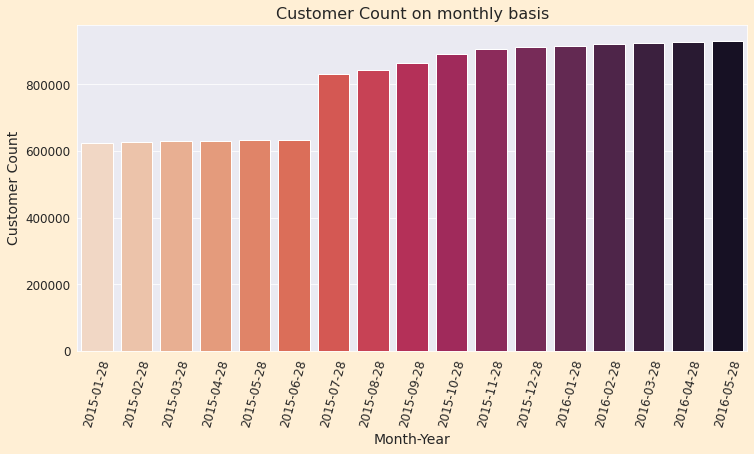

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(train_df.Date.value_counts().sort_index().index,train_df.Date.value_counts().sort_index().values,palette="rocket_r")
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer Count on monthly basis", fontsize=16)
plt.xticks(rotation=75,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Almost same customer count, for the first six months of 2015.
2. Sudden jump in customer count in July'15 by almost 31.3%.
3. Steady increase till Dec'2015 and then it tapers off untill May'2016 
4. I sense some kind of seasonality here. To answer this, We will deep dive into this with the help of other variables, in upcoming eda. 

><h5><b> 2. CustomerID </b></h5>

In [ ]:
print ("Total number of unique customers are", train_df.CustomerID.nunique())

Total number of unique customers are 956645


Let's look at the percentage occurrence of customers in the train data.

In [ ]:
round((train_df.groupby('CustomerID',dropna=False).size().value_counts().sort_values(ascending=False)/956645)*100,1).astype(str)+"%"

17    63.3%
11    20.0%
8      2.9%
9      2.5%
7      1.7%
10     1.6%
1      1.1%
6      1.0%
5      0.9%
4      0.8%
2      0.8%
3      0.7%
16     0.6%
15     0.6%
13     0.6%
14     0.5%
12     0.5%
dtype: object

In [ ]:
series_1 = train_df.groupby('CustomerID').size().value_counts().sort_index()

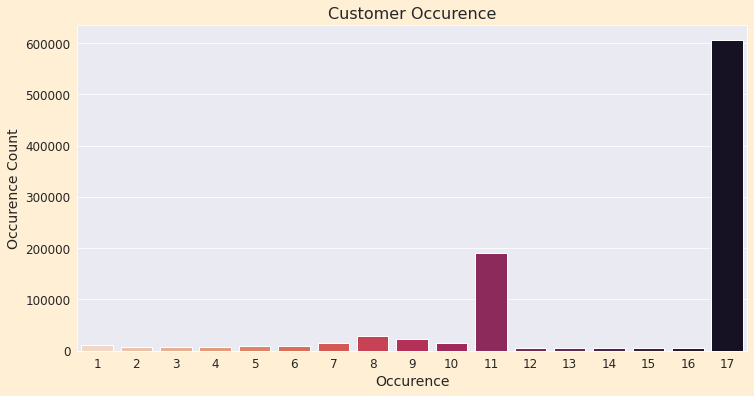

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_1.index,series_1.values,palette="rocket_r")
plt.xlabel('Occurence', fontsize=14)
plt.ylabel('Occurence Count', fontsize=14)
plt.title("Customer Occurence", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>:<br>Out of total unique customers 
1. 63.3% customers have 17 months of data
2. 20% customers have 11 months of data
3. This indicates that there are few New Customers 


<h3><b>9.6.2 Categorical Featues</b></h3>

> <h5><b> 3. Employee Type </b></h5>




In [ ]:
series_2 = train_df.groupby('Employee',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_2

Employee
N      949094
NaN      7340
B         219
F         152
A         148
S           1
Name: CustomerID, dtype: int64

Percentage of unique customers belonging to Employee Status

In [ ]:
round((train_df.groupby('Employee',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,2).astype(str)+"%"

Employee
N      99.21%
NaN     0.77%
B       0.02%
F       0.02%
A       0.02%
S        0.0%
Name: CustomerID, dtype: object

As there is huge difference, in the customer counts as per employee status, I will take log of the values in order to make values of Employee status other than 'N' visible in bar plot.

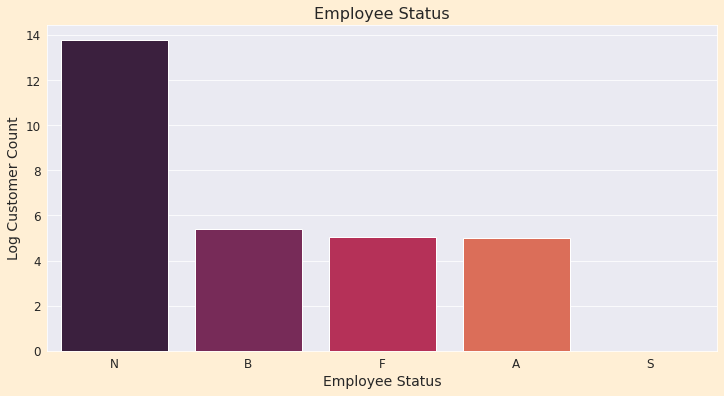

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_2.index,np.log(series_2.values),palette="rocket")
plt.xlabel('Employee Status', fontsize=14)
plt.ylabel('Log Customer Count', fontsize=14)
plt.title("Employee Status", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. 99.2% customers are not an employee of the bank.
2. As mentioned in the data description of the problem, possible values of employee status can be A, B, F, N, P.
3. 'S' seems to be an erroneous entry. We can replace it with the most frequent entry which is 'N' in the imputing section of this case study. 

> <b><h5> 4. Cust_Country </h5></b>

In [ ]:
print ("Unique Customer Countries are :",train_df.Cust_Country.nunique())

Unique Customer Countries are : 118


In [ ]:
series_3 = train_df.groupby('Cust_Country',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)
series_3

Cust_Country
ES     945660
NaN      7340
FR        320
AR        290
GB        289
DE        288
US        232
CO        211
IT        182
RO        175
MX        160
BR        144
VE        142
CH        130
EC        129
BE         96
BO         93
PT         90
PY         87
CL         61
PE         55
NL         47
RU         46
CU         46
PL         38
SE         38
CN         35
UY         30
CA         29
UA         29
AT         28
BG         28
DO         26
AU         26
IL         25
IE         25
MA         24
FI         21
HN         18
JP         15
GR         15
DK         14
AE         13
NG         13
IN         11
CR          9
GT          8
LU          8
AD          8
NO          8
SG          7
GQ          7
ZA          7
PA          6
TH          6
SV          6
MD          6
CZ          6
DZ          6
BY          6
KR          6
PR          6
SA          5
SK          5
KE          5
CM          5
PK          5
AO          4
EG          4
TR          4
HU     

In [ ]:
round((train_df.groupby('Cust_Country',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,0).astype(str)+"%"

Cust_Country
ES     99.0%
NaN     1.0%
FR      0.0%
AR      0.0%
GB      0.0%
DE      0.0%
US      0.0%
CO      0.0%
IT      0.0%
RO      0.0%
MX      0.0%
BR      0.0%
VE      0.0%
CH      0.0%
EC      0.0%
BE      0.0%
BO      0.0%
PT      0.0%
PY      0.0%
CL      0.0%
PE      0.0%
NL      0.0%
RU      0.0%
CU      0.0%
PL      0.0%
SE      0.0%
CN      0.0%
UY      0.0%
CA      0.0%
UA      0.0%
AT      0.0%
BG      0.0%
DO      0.0%
AU      0.0%
IL      0.0%
IE      0.0%
MA      0.0%
FI      0.0%
HN      0.0%
JP      0.0%
GR      0.0%
DK      0.0%
AE      0.0%
NG      0.0%
IN      0.0%
CR      0.0%
GT      0.0%
LU      0.0%
AD      0.0%
NO      0.0%
SG      0.0%
GQ      0.0%
ZA      0.0%
PA      0.0%
TH      0.0%
SV      0.0%
MD      0.0%
CZ      0.0%
DZ      0.0%
BY      0.0%
KR      0.0%
PR      0.0%
SA      0.0%
SK      0.0%
KE      0.0%
CM      0.0%
PK      0.0%
AO      0.0%
EG      0.0%
TR      0.0%
HU      0.0%
SN      0.0%
QA      0.0%
NI      0.0%
HR      0.0%
NZ      0.0%

Here also there is huge difference in the count of customers belonging to different countries. <br>
In order to visualize smaller numbers as well, I will take log of the customer counts to scale down.

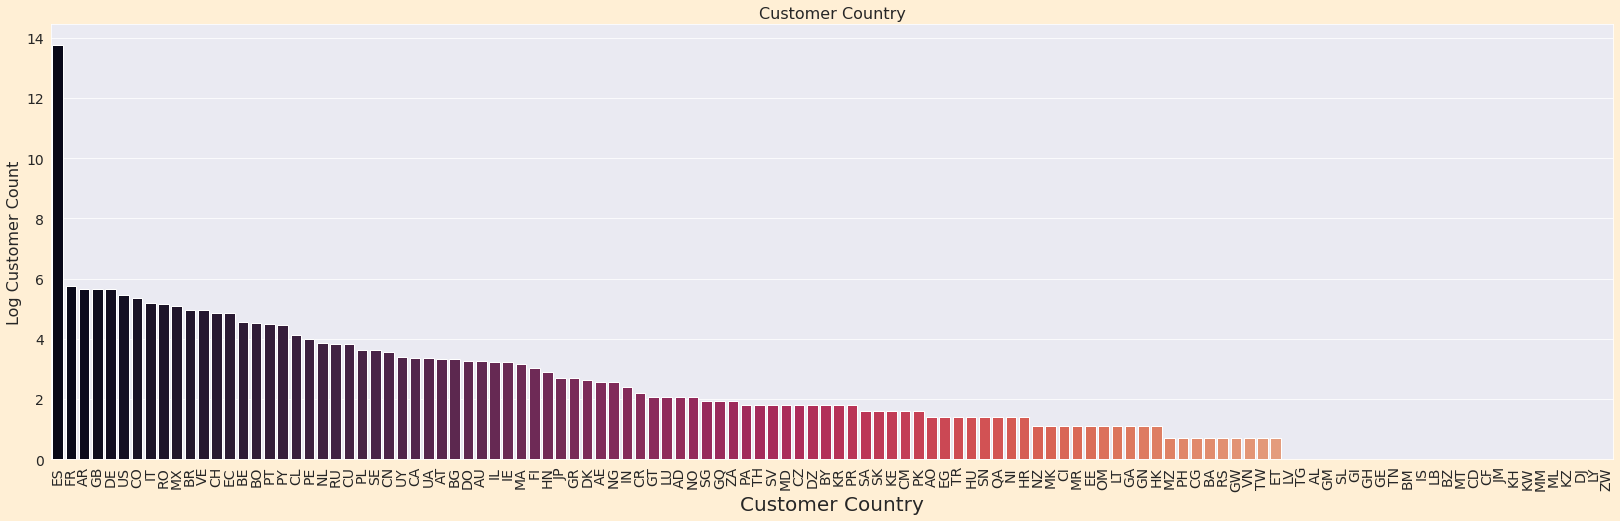

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_3.index,np.log(series_3.values),palette="rocket")
plt.xlabel('Customer Country', fontsize=20)
plt.ylabel('Log Customer Count', fontsize=16)
plt.title("Customer Country", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. 99% of the customers are from Spain itself.
2. 1% of customers have missing values. </font>

><h5><b> 5. Sex </b></h5>

In [ ]:
series_4 = train_df.groupby('Sex',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_4

Sex
V      515583
H      434072
NaN      7345
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('Sex',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,0).astype(str) + "%"

Sex
V      54.0%
H      45.0%
NaN     1.0%
Name: CustomerID, dtype: object

In [ ]:
test_df.groupby('Sex',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)

Sex
V      504515
H      425095
NaN         5
Name: CustomerID, dtype: int64

In [ ]:
round((test_df.groupby('Sex',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/test_df.shape[0])*100,0).astype(str) + "%"

Sex
V      54.0%
H      46.0%
NaN     0.0%
Name: CustomerID, dtype: object

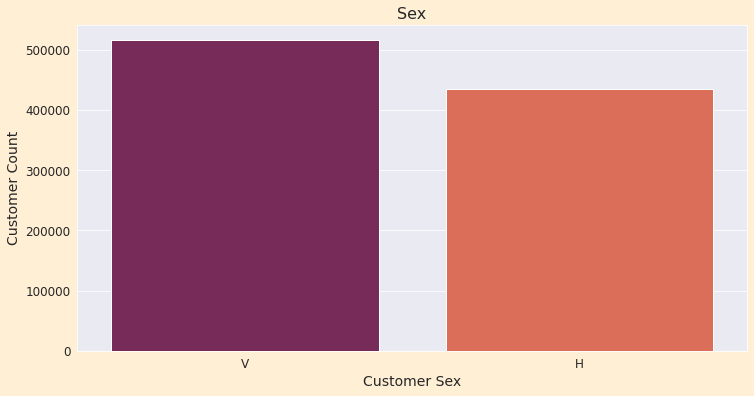

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_4.index,series_4.values,palette="rocket")
plt.xlabel('Customer Sex', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Sex", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Almost equal percentage of Male and Female customers
2. In about 1% of customers, the value of Sex is missing

> <h5><b> 6. Customer Joining Date : EntryDate </b></h5>

In [ ]:
print ("Total unique joining dates are",train_df.EntryDate.nunique(),"dates")

Total unique joining dates are 6756 dates


In [ ]:
entrydate_df = pd.DataFrame(train_df.groupby('EntryDate',dropna= False)['CustomerID'].nunique().sort_values(ascending=False).reset_index())
entrydate_df =  entrydate_df.rename(columns = {'CustomerID':'CustomerCount'})
entrydate_df['percent_count'] = round((entrydate_df['CustomerCount']/entrydate_df['CustomerCount'].sum())*100,2)
entrydate_df.head()

EntryDate  CustomerCount  percent_count
0         NaN           7340           0.77
1  2014-07-28           3469           0.36
2  2014-10-03           3424           0.36
3  2014-08-04           2821           0.29
4  2013-10-14           2654           0.28

Excluding NaN values for now in order to further analyize data.

In [ ]:
entrydate_df_ = entrydate_df[entrydate_df.EntryDate.notna()]
entrydate_df_['entry_yearmonth'] = entrydate_df_['EntryDate'].apply(lambda x: (100*x.year) + x.month)

In [ ]:
series_5 = entrydate_df_.groupby('entry_yearmonth')['CustomerCount'].sum().sort_index()

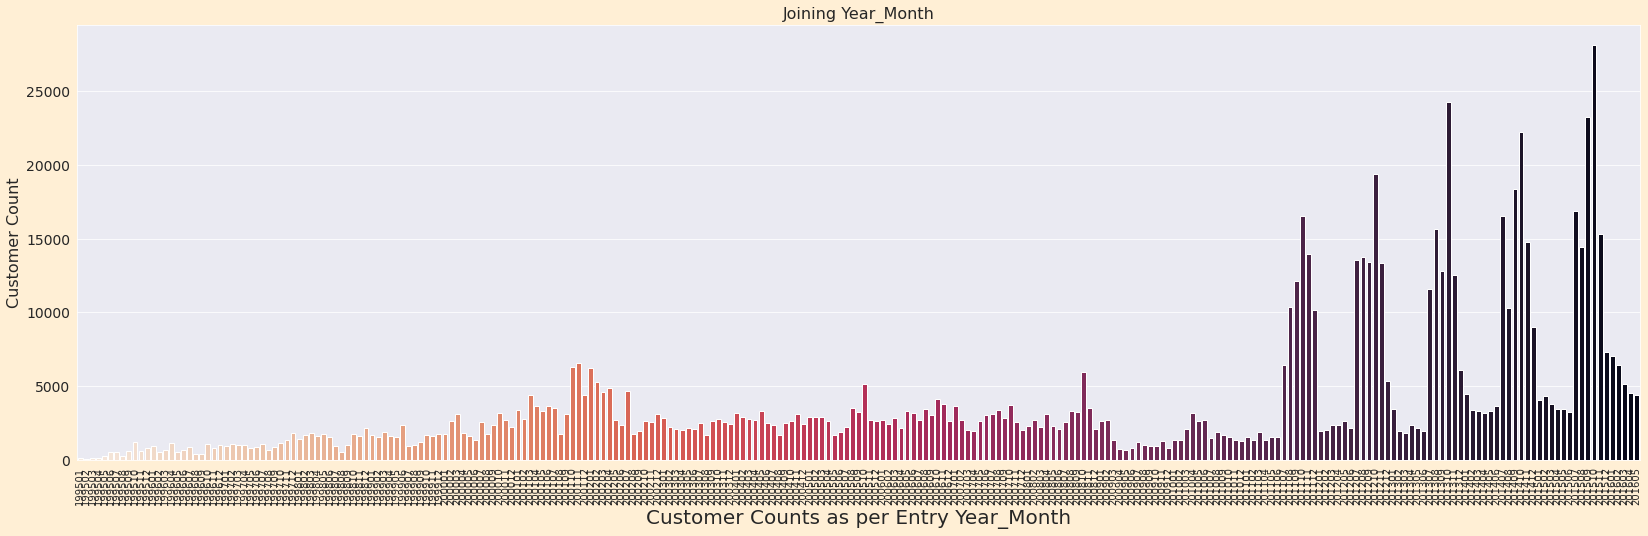

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_5.index,series_5.values,palette="rocket_r")
plt.xlabel('Customer Counts as per Entry Year_Month', fontsize=20)
plt.ylabel('Customer Count', fontsize=16)
plt.title("Joining Year_Month", fontsize=16)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=14)
plt.show()

* There is a periodicity in customer's joining date, more prevalent in last few years. 
* Let's zoom into the last 5 years of data for clearer view i.e. 2011 onwards

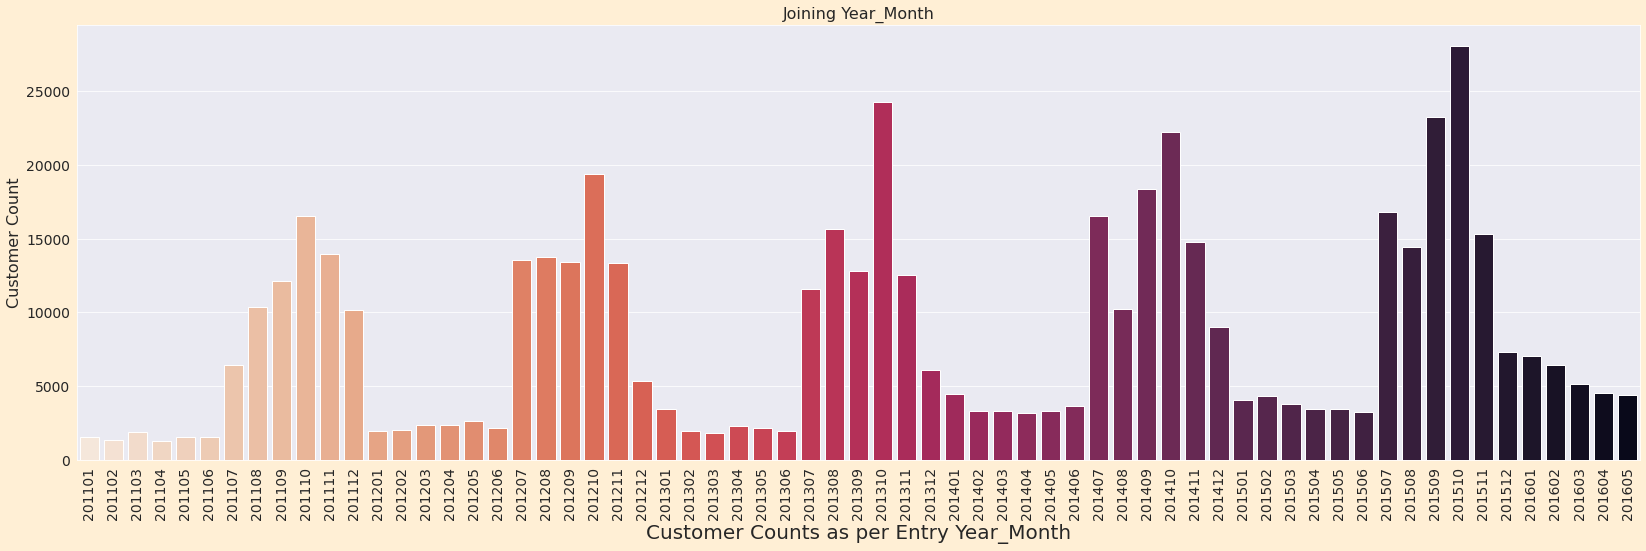

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_5.index[192:],series_5.values[192:],palette="rocket_r")
plt.xlabel('Customer Counts as per Entry Year_Month', fontsize=20)
plt.ylabel('Customer Count', fontsize=16)
plt.title("Joining Year_Month", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. A lot customers have missing entry date.
2. For first half of the months i.e. Jan-June, the customer count is pretty much same. Then there is huge jump in July followed by increase until October where it reaches maximum count. And then again the number goes down sharply untill December.
3. There is a clear difference in behavioural pattern of customers joining  the bank in first and second half of the year. 
4. This is an useful insight as we have to recommend products for the month of June.

> <h5><b> 7. New Customer </b></h5>

In [ ]:
series_6 =  train_df.groupby('New',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_6

New
0.0    907014
1.0    155756
NaN      7340
Name: CustomerID, dtype: int64

In [ ]:
series_6.values.sum()

1070110

* Sum of values above series is greater than the number of unique customers.  
* This is possible as a customer can have both the values associated with him. For eg. a customer is New for first 6 months of entry date and then becomes old.

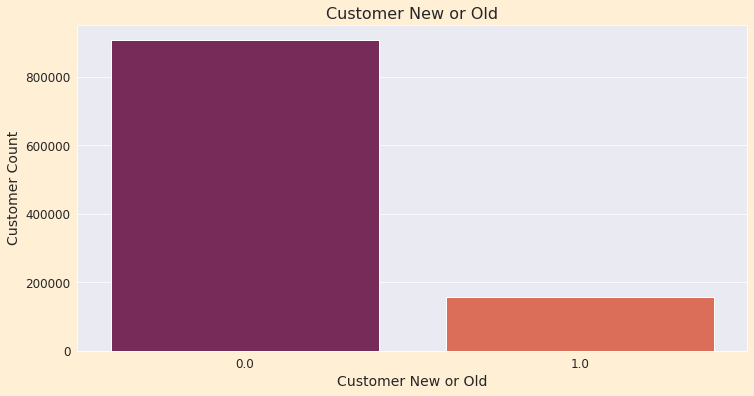

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_6.index,series_6.values,palette="rocket")
plt.xlabel('Customer New or Old', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer New or Old", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Most of the customers have been in system for more than 6 months.
2. 0.8% customers have this value missing

> <h5><b> 8. Primary Customers </b></h5>

In [ ]:
series_7 =  train_df.groupby('PrimaryCustomer',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_7

PrimaryCustomer
1.0     943998
99.0     19889
NaN       7340
Name: CustomerID, dtype: int64

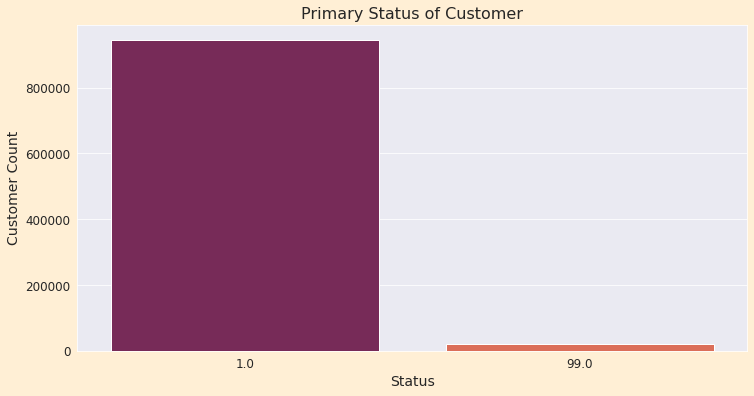

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_7.index,series_7.values,palette="rocket")
plt.xlabel('Status', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Primary Status of Customer", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Most of the customers are Primary customers (i.e. status index = 1.0)
2. 0.8% customers have this value missing

> <h5><b> 9.Last date as primary customer </b></h5>

In [ ]:
train_df.LastDateAsPrimaryCustomer.value_counts(dropna=False).sort_values(ascending=False)

NaN           13622516
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
2015-07-01         401
2015-07-21         391
2015-07-07         340
2015-07-17         330
2015-07-10         320
2015-07-28         311
2015-07-24         299
2015-07-20         295
2015-07-22         275
2015-07-15         273
2015-07-03         262
2015-07-29         255
2015-07-13         229
2015-07-30         224
2015-07-23         206
2015-12-21         206
2015-07-27         203
2015-07-14         196
2015-07-08         175
2015-12-17         172
2016-01-19         169
2016-01-05         167
2015-07-02         166
2015-12-16         158
2015-07-16         147
2015-12-18         139
2016-04-01         132
2015-10-26         131
2015-10-05         129
2016-02-15         129
2016-05-02         128
2015-11-02         128
2016-05-26         128
2015-10-28         125
2016-05-24         124
2016-01-13         122
2016-02-01         121
2015-10-01         115
2015-09-14 

In [ ]:
test_df.LastDateAsPrimaryCustomer.value_counts(dropna=False).sort_values(ascending=False)

NaN           927932
2016-06-01       138
2016-06-10       133
2016-06-03       110
2016-06-07       102
2016-06-06       101
2016-06-20        84
2016-06-13        84
2016-06-15        78
2016-06-23        78
2016-06-17        78
2016-06-14        76
2016-06-02        75
2016-06-09        75
2016-06-22        72
2016-06-21        70
2016-06-24        64
2016-06-16        62
2016-06-08        60
2016-06-27        58
2016-06-28        49
2016-06-29        36
Name: LastDateAsPrimaryCustomer, dtype: int64

<font color='blue'><b>Observation:</b></font>
1. There are 99.8% of the records where last date of customer as primary customer is missing. 
2. Simliarly, in test data data also, 99.8% of records don't have this value. 
3. I will most probably create a new boolean feature representing whether this feature is present or not and then drop this feature 
 

> <h5><b> 10. Customer type at the beginning of the month </b></h5>

In [ ]:
train_df.CustomerType.value_counts(dropna=False)

1.0    9133383
1      4357298
NaN     149781
3.0       2780
3         1570
P          874
2.0        740
2          577
4.0        223
4           83
Name: CustomerType, dtype: int64

In [ ]:
test_df.CustomerType.value_counts(dropna=False)

1.0    929565
3.0        27
NaN        23
Name: CustomerType, dtype: int64

<font color='blue'><b>Observation:</b></font>
1. Same values are represented in two different characters.
2. There is an erroneous value 'P'.
3. Null values are present in both train and test data.
4. All the above issues will be handled in the imputing section.

> <h5><b> 11. CustomerRelationType </b></h5>

In [ ]:
train_df.CustomerRelationType.value_counts(dropna=False)

I      7304875
A      6187123
NaN     149781
P         4656
R          870
N            4
Name: CustomerRelationType, dtype: int64

* A customer can have different type of relationship in different months.
* At the beginning of one month they can be 'Active' some other month they can  either be 'Inactive' or 'Potential' and so on. 
* This can be seen from below result.

In [ ]:
train_df.groupby('CustomerID')['CustomerRelationType'].nunique().sort_values(ascending=False)

CustomerID
602175     4
552128     3
1374055    3
851031     3
173490     3
          ..
1189239    0
1502687    0
1502657    0
1502652    0
1553689    0
Name: CustomerRelationType, Length: 956645, dtype: int64

In [ ]:
test_df.CustomerRelationType.value_counts(dropna=False)

I      535943
A      393622
P          27
NaN        23
Name: CustomerRelationType, dtype: int64

<font color='blue'><b>Observation:</b></font>
1. There is an erroneous entry in train data which is 'N'. Possible values of customer relationship status are A,I,P,R
2. Most of the customers are either Active or Inactive at the begining of the month.
3. Missing values in both train and test data will be handled.

> <h5><b> 12. Residence index : SameResidenceCountry </b></h5>

In [ ]:
series_8 =  train_df.groupby('SameResidenceCountry',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_8

SameResidenceCountry
S      945660
NaN      7340
N        4050
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('SameResidenceCountry',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,1).astype(str) + "%"

SameResidenceCountry
S      98.9%
NaN     0.8%
N       0.4%
Name: CustomerID, dtype: object

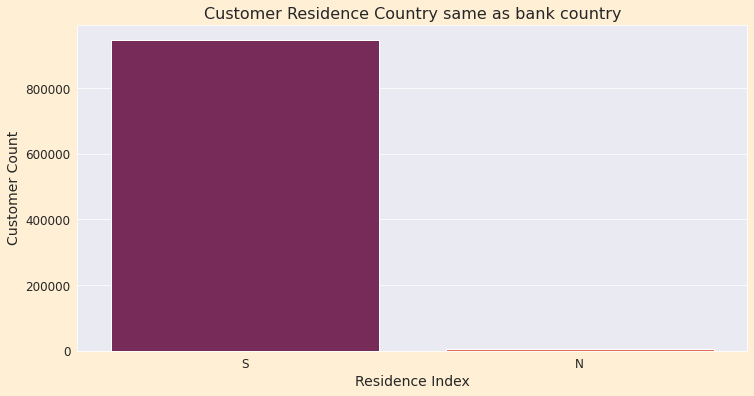

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_8.index,series_8.values,palette="rocket")
plt.xlabel('Residence Index', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer Residence Country same as bank country", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. 98.9% of the customers reside in the same country as their bank country
2. Only 0.4% customers don't reside in the same country
3. For 0.8% customers we have missing values

> <h5><b> 13. Foreigner index: OtherBirthCountry  </b></h5>

In [ ]:
series_9 =  train_df.groupby('OtherBirthCountry',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_9

OtherBirthCountry
N      902026
S       47823
NaN      7340
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('OtherBirthCountry',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,1).astype(str) + "%"

OtherBirthCountry
N      94.3%
S       5.0%
NaN     0.8%
Name: CustomerID, dtype: object

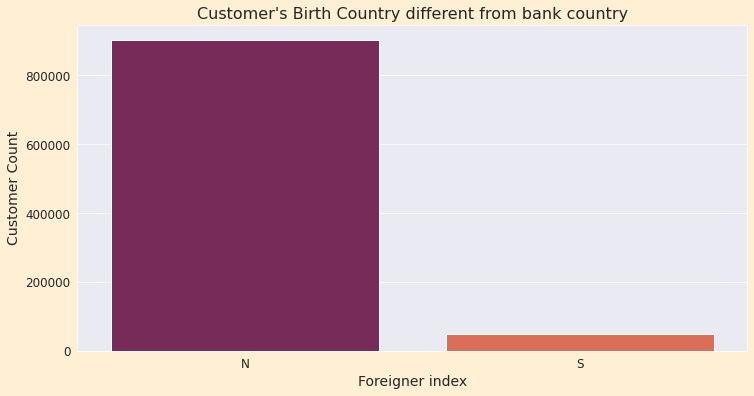

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_9.index,series_9.values,palette="rocket")
plt.xlabel('Foreigner index', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer's Birth Country different from bank country", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. 94.3% customer have birth country same as their bank country
2. 5% of customers have different birth country and bank country
3. For 0.8% customers we have missing values

> <h5><b> 14. Channel used by the customer to join : EntryChannel </b></h5>

In [ ]:
print ("Number of unique channels to join from are :",train_df.EntryChannel.nunique())

Number of unique channels to join from are : 162


In [ ]:
series_10 = train_df.groupby('EntryChannel',dropna= False)['CustomerID'].count().sort_values(ascending=False)
series_10[:10]

EntryChannel
KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
KHK     241084
NaN     186126
KHM     183924
KHD     116891
KHN     116608
Name: CustomerID, dtype: int64

In [ ]:
percent_contri = round((train_df.groupby('EntryChannel',dropna=False)['CustomerID'].count().sort_values(ascending=False)/train_df.shape[0])*100,1).astype(str) + "%"
percent_contri[:20]

EntryChannel
KHE    29.7%
KAT    23.9%
KFC    22.7%
KHQ     4.3%
KFA     3.0%
KHK     1.8%
NaN     1.4%
KHM     1.3%
KHD     0.9%
KHN     0.9%
KAS     0.6%
RED     0.6%
KAG     0.5%
KAY     0.5%
KAA     0.5%
KAB     0.5%
KAE     0.4%
KCC     0.4%
KBZ     0.3%
KHL     0.3%
Name: CustomerID, dtype: object

In [ ]:
entrychannel_df = pd.DataFrame(train_df.groupby('CustomerID')['EntryChannel'].nunique().sort_values(ascending=False).reset_index())
entrychannel_df.head()

CustomerID  EntryChannel
0     1263084             3
1      915626             3
2     1389760             3
3      861411             3
4      731565             3

In [ ]:
entrychannel_df[entrychannel_df['EntryChannel']>1].shape

(3704, 2)

In [ ]:
test_df.groupby('EntryChannel',dropna= False)['CustomerID'].count().sort_values(ascending=False)[0:10]

EntryChannel
KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
KFA     25653
KHN     18131
KHK     16918
KHD      7390
RED      6328
Name: CustomerID, dtype: int64

In [ ]:
percent_contri_test = round((test_df.groupby('EntryChannel',dropna=False)['CustomerID'].count().sort_values(ascending=False)/test_df.shape[0])*100,1).astype(str) + "%"
percent_contri_test[0:10]

EntryChannel
KHE    27.1%
KAT    22.1%
KFC    21.6%
KHQ     8.1%
KHM     3.6%
KFA     2.8%
KHN     2.0%
KHK     1.8%
KHD     0.8%
RED     0.7%
Name: CustomerID, dtype: object

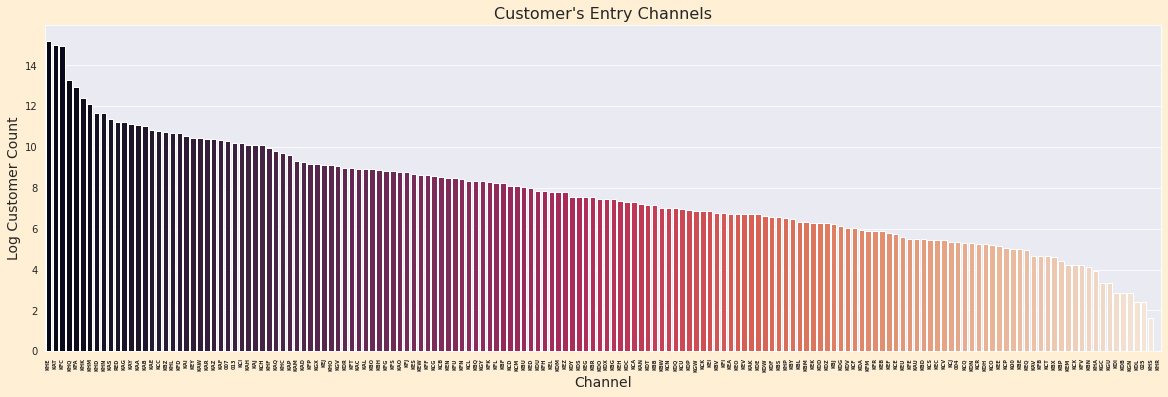

In [ ]:
plt.figure(figsize=(20,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_10.index,np.log(series_10.values),palette="rocket")
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Log Customer Count', fontsize=14)
plt.title("Customer's Entry Channels", fontsize=16)
plt.xticks(fontsize=5,rotation=90,weight='bold')
plt.yticks(fontsize=10)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Top three entry channels are KHE, KAT and KFC contributing to 76% of the total records.
2. In train data, there are 3704 customers out of 956645 (~0.4%) who have more than one entry channel
3. 1.4% missing values in train Data and 0.2% in test data

> <h5><b> 15. EmployeeSpouse </b></h5>

In [ ]:
series_11 = train_df.groupby('EmployeeSpouse',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_11

EmployeeSpouse
NaN    956526
N         287
S           1
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('EmployeeSpouse',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/956645)*100,2).astype(str) + "%"

EmployeeSpouse
NaN    99.99%
N       0.03%
S        0.0%
Name: CustomerID, dtype: object

In [ ]:
round((test_df.groupby('EmployeeSpouse',dropna=False)['CustomerID'].nunique().sort_values(ascending=False)/test_df.shape[0])*100,2).astype(str) + "%"

EmployeeSpouse
NaN    99.99%
N       0.01%
S        0.0%
Name: CustomerID, dtype: object

<font color='blue'><b>Onservation</b></font>:
1. 99.99% of the data related to spouse working in the same bank is missing in both train and test.
2. For customers, where data is present most of them do not have their spouse working in the bank, both in train and  test.
3. Its better to drop this column instead of imputing.

> <h5><b> 16. Deceased </b></h5>

In [ ]:
series_12 = train_df.groupby('Deceased',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_12

Deceased
N      947370
NaN      7340
S        2731
Name: CustomerID, dtype: int64

In [ ]:
series_12.values.sum()

957441

<font color='blue'><b>Onservation</b></font>:
1. Sum of the values of above series is 957,441 which is greater than the total unique customers which is 956,645. This implies that there are few customers who have both Yes and No flags corresponding to this column. 
2. Lets deep-dive into this, because if a customer is Deceased we should remove that customer from data.

In [ ]:
deceased_df = train_df[['CustomerID','Deceased']]
deceased_df = deceased_df.drop_duplicates()
deceased_df = deceased_df.sort_values(by=['CustomerID','Deceased'])
deceased_df.Deceased = deceased_df.Deceased.astype(str)

In [ ]:
deceased_dupe_df = pd.DataFrame(deceased_df.groupby('CustomerID')['Deceased'].apply(','.join).reset_index())
deceased_dupe_df.Deceased.value_counts()

N        946574
nan        7031
S          2244
N,S         487
N,nan       309
Name: Deceased, dtype: int64

In [ ]:
946574/956645 * 100

98.94725838738509

3. Now this gives a clearer picture. There are :
 * 98.9% of the customers are not deceased
 * 487 customers who are eventually deceased, we will replace Deceased flag corresponding to them with 'S'. 
 * For 309 customers, who aren't deceased and yet in some records their value is missing, we will replace it with 'N'
 * Remaining missing values will be treated in the imputing section.

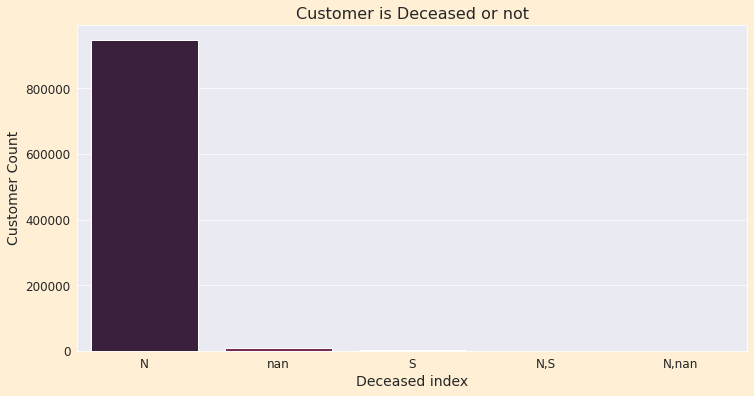

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(deceased_dupe_df.Deceased.value_counts().index,deceased_dupe_df.Deceased.value_counts().values,palette="rocket")
plt.xlabel('Deceased index', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer is Deceased or not", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

> <h5><b> 17. AddresType </b></h5>

In [ ]:
series_13 = train_df.groupby('AddresType',dropna= False)['CustomerID'].count().sort_values(ascending=False)
series_13

AddresType
1.0    13619574
NaN       27735
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('AddresType',dropna=False)['CustomerID'].count().sort_values(ascending=False)/train_df.shape[0])*100,2).astype(str) + "%"

AddresType
1.0    99.8%
NaN     0.2%
Name: CustomerID, dtype: object

In [ ]:
test_df.groupby('AddresType',dropna= False)['CustomerID'].count().sort_values(ascending=False)

AddresType
1    929615
Name: CustomerID, dtype: int64

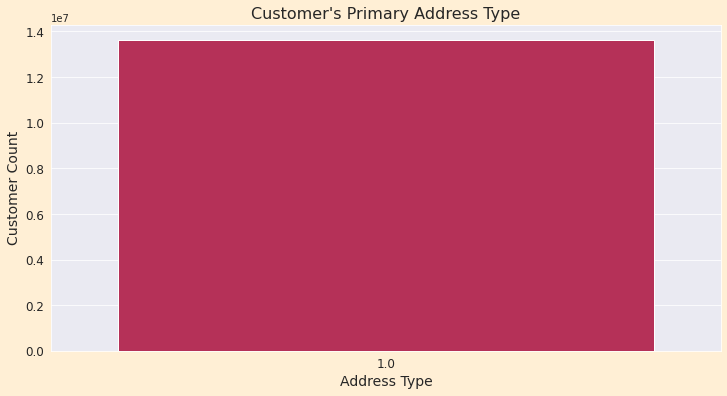

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_13.index,series_13.values,palette="rocket")
plt.xlabel('Address Type', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer's Primary Address Type", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font color='blue'><b>Observation:</b></font>
  1. There is just one value corresponding to this field which is 1.0
  2. Only 0.2% of the values are missing.
  3. This field is not adding any information both in train and test data. We can drop this.

> <h5><b> 18. ProvinceCode </b></h5>

In [ ]:
series_14 = train_df.groupby('ProvinceCode',dropna= False)['CustomerID'].count().sort_values(ascending=False)
series_14

ProvinceCode
28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
30.0     396759
29.0     367023
50.0     342543
3.0      313397
11.0     294684
36.0     280026
33.0     265749
47.0     238259
35.0     235700
6.0      192996
48.0     185888
45.0     183067
18.0     178562
37.0     164238
39.0     155706
14.0     144679
10.0     129912
7.0      124933
21.0     122283
13.0     119390
2.0      114128
12.0     104295
43.0     100115
9.0       97188
NaN       93591
17.0      90538
31.0      88618
26.0      85202
27.0      84962
32.0      84009
24.0      83003
25.0      79059
20.0      71567
38.0      70968
19.0      64618
23.0      64363
4.0       60291
16.0      57310
49.0      50927
34.0      49282
40.0      42341
22.0      40181
5.0       38783
1.0       37704
44.0      22525
42.0      17660
52.0       9460
51.0       7218
Name: CustomerID, dtype: int64

In [ ]:
round((train_df.groupby('ProvinceCode',dropna=False)['CustomerID'].count().sort_values(ascending=False)/train_df.shape[0])*100,1).astype(str) + "%"

ProvinceCode
28.0    32.3%
8.0      9.3%
46.0     5.0%
41.0     4.4%
15.0     3.1%
30.0     2.9%
29.0     2.7%
50.0     2.5%
3.0      2.3%
11.0     2.2%
36.0     2.1%
33.0     1.9%
47.0     1.7%
35.0     1.7%
6.0      1.4%
48.0     1.4%
45.0     1.3%
18.0     1.3%
37.0     1.2%
39.0     1.1%
14.0     1.1%
10.0     1.0%
7.0      0.9%
21.0     0.9%
13.0     0.9%
2.0      0.8%
12.0     0.8%
43.0     0.7%
9.0      0.7%
NaN      0.7%
17.0     0.7%
31.0     0.6%
26.0     0.6%
27.0     0.6%
32.0     0.6%
24.0     0.6%
25.0     0.6%
20.0     0.5%
38.0     0.5%
19.0     0.5%
23.0     0.5%
4.0      0.4%
16.0     0.4%
49.0     0.4%
34.0     0.4%
40.0     0.3%
22.0     0.3%
5.0      0.3%
1.0      0.3%
44.0     0.2%
42.0     0.1%
52.0     0.1%
51.0     0.1%
Name: CustomerID, dtype: object

In [ ]:
test_df.groupby('ProvinceCode',dropna= False)['CustomerID'].count().sort_values(ascending=False)

ProvinceCode
28.0    298250
8.0      88579
46.0     47996
41.0     40492
15.0     28715
30.0     27752
29.0     24546
50.0     23160
3.0      22147
11.0     19795
36.0     18961
33.0     18300
35.0     16332
47.0     16018
6.0      12936
45.0     12658
48.0     12494
18.0     12392
37.0     11071
39.0     10824
14.0      9831
7.0       9130
10.0      8598
13.0      8075
21.0      8018
2.0       7780
43.0      7631
12.0      7145
9.0       6645
17.0      6304
31.0      6010
26.0      5806
24.0      5717
27.0      5656
32.0      5605
25.0      5430
38.0      5097
20.0      4869
19.0      4678
23.0      4496
4.0       4307
NaN       3996
16.0      3788
49.0      3430
34.0      3311
40.0      2881
22.0      2789
5.0       2628
1.0       2591
44.0      1538
42.0      1261
52.0       643
51.0       513
Name: CustomerID, dtype: int64

In [ ]:
round((test_df.groupby('ProvinceCode',dropna=False)['CustomerID'].count().sort_values(ascending=False)/test_df.shape[0])*100,2).astype(str) + "%"

ProvinceCode
28.0    32.08%
8.0      9.53%
46.0     5.16%
41.0     4.36%
15.0     3.09%
30.0     2.99%
29.0     2.64%
50.0     2.49%
3.0      2.38%
11.0     2.13%
36.0     2.04%
33.0     1.97%
35.0     1.76%
47.0     1.72%
6.0      1.39%
45.0     1.36%
48.0     1.34%
18.0     1.33%
37.0     1.19%
39.0     1.16%
14.0     1.06%
7.0      0.98%
10.0     0.92%
13.0     0.87%
21.0     0.86%
2.0      0.84%
43.0     0.82%
12.0     0.77%
9.0      0.71%
17.0     0.68%
31.0     0.65%
26.0     0.62%
24.0     0.61%
27.0     0.61%
32.0      0.6%
25.0     0.58%
38.0     0.55%
20.0     0.52%
19.0      0.5%
23.0     0.48%
4.0      0.46%
NaN      0.43%
16.0     0.41%
49.0     0.37%
34.0     0.36%
40.0     0.31%
22.0      0.3%
5.0      0.28%
1.0      0.28%
44.0     0.17%
42.0     0.14%
52.0     0.07%
51.0     0.06%
Name: CustomerID, dtype: object

For visualization, taking log of the values.

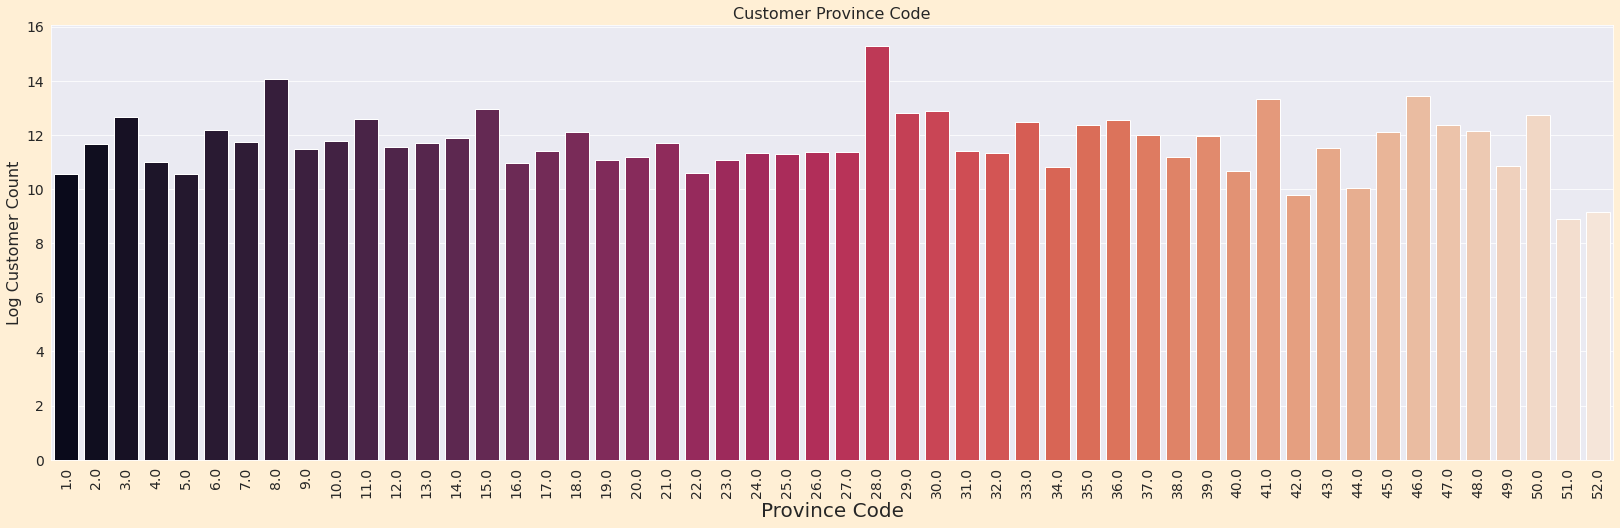

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_14.index,np.log(series_14.values),palette="rocket")
plt.xlabel('Province Code', fontsize=20)
plt.ylabel('Log Customer Count', fontsize=16)
plt.title("Customer Province Code", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. 32.8% of the customer belongs to Province Code which is 28.
2. Both in Train and Test data most of the bank customers belong to province 28.
3. Train data has 0.7% missing values corresponding to this field whereas Test data has 0.03% missing values

> <h5><b> 19. ProvinceName </b></h5>

In [ ]:
series_15 = train_df.groupby('ProvinceName',dropna= False)['CustomerID'].count().sort_values(ascending=False)
series_15

ProvinceName
MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID                 238259
PALMAS, LAS                235700
BADAJOZ                    192996
BIZKAIA                    185888
TOLEDO                     183067
GRANADA                    178562
SALAMANCA                  164238
CANTABRIA                  155706
CORDOBA                    144679
CACERES                    129912
BALEARS, ILLES             124933
HUELVA                     122283
CIUDAD REAL                119390
ALBACETE                   114128
CASTELLON                  104295
TARRAGONA                  100115
BURGOS                      97188
N

In [ ]:
round((train_df.groupby('ProvinceName',dropna=False)['CustomerID'].count().sort_values(ascending=False)/train_df.shape[0])*100,1).astype(str) + "%"

ProvinceName
MADRID                    32.3%
BARCELONA                  9.3%
VALENCIA                   5.0%
SEVILLA                    4.4%
CORUÑA, A                  3.1%
MURCIA                     2.9%
MALAGA                     2.7%
ZARAGOZA                   2.5%
ALICANTE                   2.3%
CADIZ                      2.2%
PONTEVEDRA                 2.1%
ASTURIAS                   1.9%
VALLADOLID                 1.7%
PALMAS, LAS                1.7%
BADAJOZ                    1.4%
BIZKAIA                    1.4%
TOLEDO                     1.3%
GRANADA                    1.3%
SALAMANCA                  1.2%
CANTABRIA                  1.1%
CORDOBA                    1.1%
CACERES                    1.0%
BALEARS, ILLES             0.9%
HUELVA                     0.9%
CIUDAD REAL                0.9%
ALBACETE                   0.8%
CASTELLON                  0.8%
TARRAGONA                  0.7%
BURGOS                     0.7%
NaN                        0.7%
GIRONA                     

In [ ]:
test_df.groupby('ProvinceName',dropna= False)['CustomerID'].count().sort_values(ascending=False)

ProvinceName
MADRID                    298250
BARCELONA                  88579
VALENCIA                   47996
SEVILLA                    40492
CORUÑA, A                  28715
MURCIA                     27752
MALAGA                     24546
ZARAGOZA                   23160
ALICANTE                   22147
CADIZ                      19795
PONTEVEDRA                 18961
ASTURIAS                   18300
PALMAS, LAS                16332
VALLADOLID                 16018
BADAJOZ                    12936
TOLEDO                     12658
BIZKAIA                    12494
GRANADA                    12392
SALAMANCA                  11071
CANTABRIA                  10824
CORDOBA                     9831
BALEARS, ILLES              9130
CACERES                     8598
CIUDAD REAL                 8075
HUELVA                      8018
ALBACETE                    7780
TARRAGONA                   7631
CASTELLON                   7145
BURGOS                      6645
GIRONA                      63

In [ ]:
round((test_df.groupby('ProvinceName',dropna=False)['CustomerID'].count().sort_values(ascending=False)/test_df.shape[0])*100,2).astype(str) + "%"

ProvinceName
MADRID                    32.08%
BARCELONA                  9.53%
VALENCIA                   5.16%
SEVILLA                    4.36%
CORUÑA, A                  3.09%
MURCIA                     2.99%
MALAGA                     2.64%
ZARAGOZA                   2.49%
ALICANTE                   2.38%
CADIZ                      2.13%
PONTEVEDRA                 2.04%
ASTURIAS                   1.97%
PALMAS, LAS                1.76%
VALLADOLID                 1.72%
BADAJOZ                    1.39%
TOLEDO                     1.36%
BIZKAIA                    1.34%
GRANADA                    1.33%
SALAMANCA                  1.19%
CANTABRIA                  1.16%
CORDOBA                    1.06%
BALEARS, ILLES             0.98%
CACERES                    0.92%
CIUDAD REAL                0.87%
HUELVA                     0.86%
ALBACETE                   0.84%
TARRAGONA                  0.82%
CASTELLON                  0.77%
BURGOS                     0.71%
GIRONA                     0.6

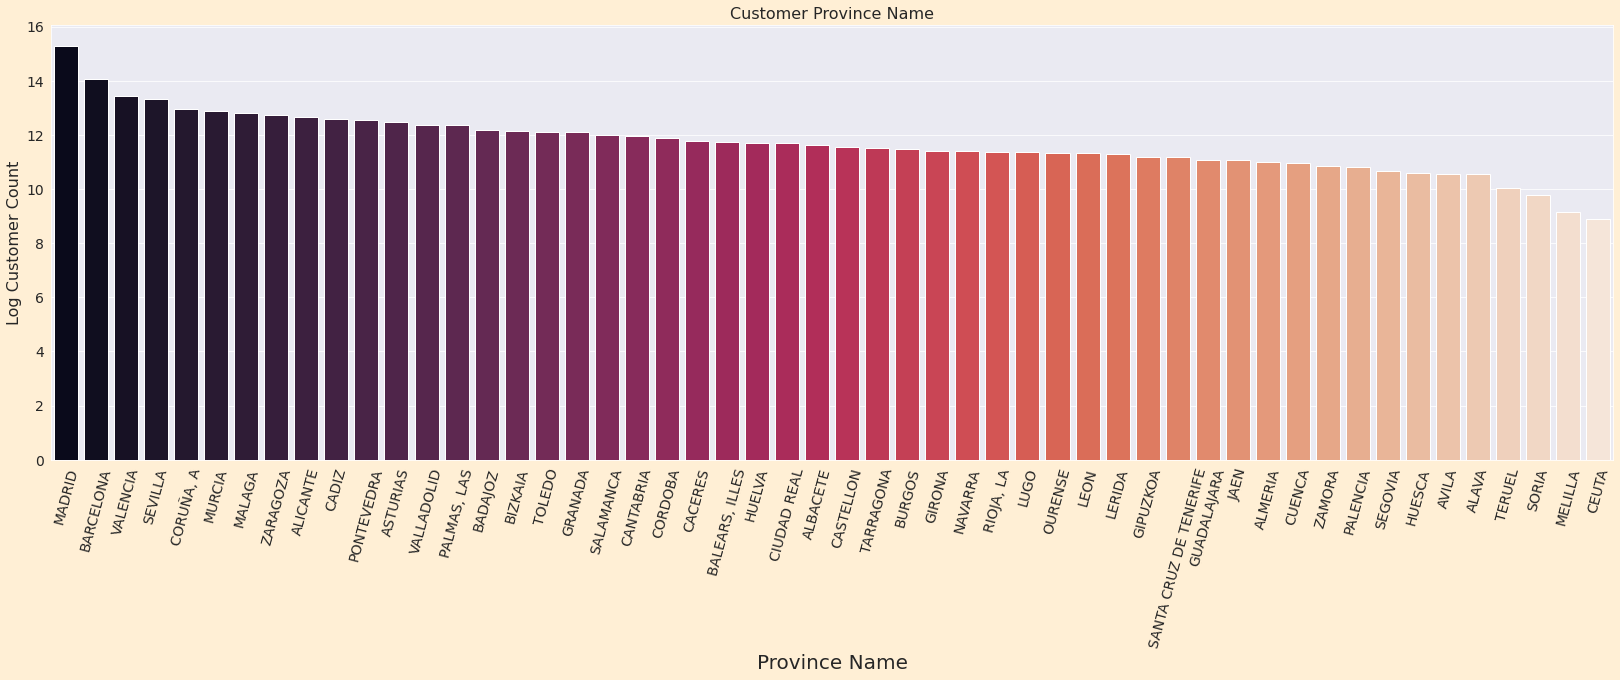

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_15.index,np.log(series_15.values),palette="rocket")
plt.xlabel('Province Name', fontsize=20)
plt.ylabel('Log Customer Count', fontsize=16)
plt.title("Customer Province Name", fontsize=16)
plt.xticks(fontsize=14,rotation=75)
plt.yticks(fontsize=14)
plt.show()

<b><font color='blue'><b>Observation:</b></font>:</b>
1. Province name is nothing but name of the province corresponding to the province code. Hence, it's behaviour is completely same to province code field.
2. Now we know that province code 28, corresponds to Madrid. Hence, most of the customers belong to Madrid, followed by Barcelona and so on. This makes sense as bank is in Spain.
3. Test data also have same distribution as train data
4. Percentage of missing values is same as province code field for both Train and Test data.
5. As these two features are highly correlated, I will keep either of the two.

> <h5><b> 20. Active </b></h5>

In [ ]:
series_16 = train_df.groupby('Active',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_16

Active
0.0    595101
1.0    433893
NaN      7340
Name: CustomerID, dtype: int64

In [ ]:
series_16.values.sum()

1036334

<font color='blue'><b>Observation:</b></font>

1. Here also sum of the values of above series is 1,036,334 which is greater than total unique customers which is 956,645. This is possible as a customer can be active for sometime and then become inactive or vice-versa
2. Lets deep-dive into this and see if we find something insightful.

In [ ]:
activity_df = train_df[['CustomerID','Active']]
activity_df = activity_df.drop_duplicates()
activity_df = activity_df.sort_values(by=['CustomerID','Active'])
activity_df.Active = activity_df.Active.astype(str)
activity_df.head()

CustomerID Active
416965        15889    1.0
416966        15890    1.0
5319232       15891    0.0
4078994       15891    1.0
416967        15892    1.0

In [ ]:
activity_dupe_df = pd.DataFrame(activity_df.groupby('CustomerID')['Active'].apply(','.join).reset_index())
activity_dupe_df.Active.value_counts()

0.0            515660
1.0            354378
0.0,1.0         79267
nan              7031
1.0,nan           135
0.0,1.0,nan       113
0.0,nan            61
Name: Active, dtype: int64

In [ ]:
round((activity_dupe_df.Active.value_counts()/956645)*100,2).astype(str)+"%"

0.0             53.9%
1.0            37.04%
0.0,1.0         8.29%
nan             0.73%
1.0,nan         0.01%
0.0,1.0,nan     0.01%
0.0,nan         0.01%
Name: Active, dtype: object

3. Now this gives a clearer picture. There are :
 * ~ 54% of the customers have always been inactive.
 * ~ 37% of customers are active.
 * ~ 8.3% customers were inactive and then have become active
 * For 0.73% customers this value is missing
 * Remaining combination will help us in imputing missing values.

In [ ]:
round((test_df.groupby('Active',dropna=False)['CustomerID'].count().sort_values(ascending=False)/test_df.shape[0])*100,0).astype(str) + "%"

Active
0    57.0%
1    43.0%
Name: CustomerID, dtype: object

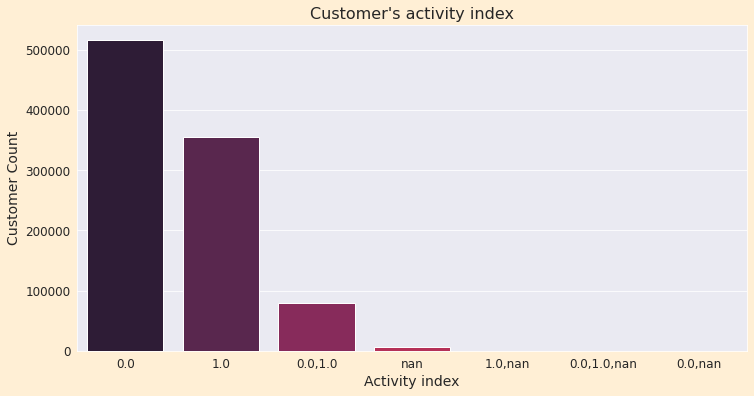

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(activity_dupe_df.Active.value_counts().index,activity_dupe_df.Active.value_counts().values,palette="rocket")
plt.xlabel('Activity index', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer's activity index", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

4. Interestingly, most of the bank customers are inactive.
5. Even in test dataset, 57% of the customers are inactive and remaining are active.

> <h5><b> 21. Segment </b></h5>

In [ ]:
series_16 = train_df.groupby('Segment',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)
series_16

Segment
02 - PARTICULARES     566666
03 - UNIVERSITARIO    353158
NaN                   145780
01 - TOP               43838
Name: CustomerID, dtype: int64

In [ ]:
series_16.values.sum()

1109442

<b><font color='blue'><b>Observation:</b></font></b>:

1. Here also sum of the values of above series is 1,109,442 which is greater than the total unique customers i.e. 956,645. 
2. This is because there are few customers who are falling under multiple segements. Let's check them out and see if we find something useful.

In [ ]:
segment_df = train_df[['CustomerID','Segment']]
segment_df = segment_df.drop_duplicates()
segment_df = segment_df.sort_values(by=['CustomerID','Segment'])
segment_df.Segment = segment_df.Segment.astype(str)
segment_df.head()

CustomerID            Segment
416965         15889           01 - TOP
10426091       15890           01 - TOP
416966         15890  02 - PARTICULARES
5319232        15891  02 - PARTICULARES
4078994        15891                nan

In [ ]:
segment_dupe_df = pd.DataFrame(segment_df.groupby('CustomerID')['Segment'].apply(', '.join).reset_index())
segment_dupe_df.Segment.value_counts()

02 - PARTICULARES                                       497533
03 - UNIVERSITARIO                                      269848
03 - UNIVERSITARIO, nan                                  74767
02 - PARTICULARES, nan                                   43771
01 - TOP                                                 25461
nan                                                      18374
01 - TOP, 02 - PARTICULARES                              14228
02 - PARTICULARES, 03 - UNIVERSITARIO, nan                4746
02 - PARTICULARES, 03 - UNIVERSITARIO                     3768
01 - TOP, 02 - PARTICULARES, nan                          2615
01 - TOP, nan                                             1505
01 - TOP, 03 - UNIVERSITARIO                                23
01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO              4
01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO, nan         1
01 - TOP, 03 - UNIVERSITARIO, nan                            1
Name: Segment, dtype: int64

In [ ]:
round((segment_dupe_df.Segment.value_counts()/956645)*100,1).astype(str)+"%"

02 - PARTICULARES                                       52.0%
03 - UNIVERSITARIO                                      28.2%
03 - UNIVERSITARIO, nan                                  7.8%
02 - PARTICULARES, nan                                   4.6%
01 - TOP                                                 2.7%
nan                                                      1.9%
01 - TOP, 02 - PARTICULARES                              1.5%
02 - PARTICULARES, 03 - UNIVERSITARIO, nan               0.5%
02 - PARTICULARES, 03 - UNIVERSITARIO                    0.4%
01 - TOP, 02 - PARTICULARES, nan                         0.3%
01 - TOP, nan                                            0.2%
01 - TOP, 03 - UNIVERSITARIO                             0.0%
01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO          0.0%
01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO, nan     0.0%
01 - TOP, 03 - UNIVERSITARIO, nan                        0.0%
Name: Segment, dtype: object

3. Now this gives a clearer picture. There are :
 * 52% of the bank customers are PARTICULARES which means individuals
 * 28.2% of the customers are students or in academics.
 * Only small percent i.e. 2.7% of customers belongs to Top segment which makes sense.
 * 1.9% customers this value is missing
 * Remaining missing values occur in combination with other segments, which we can will while use to impute.

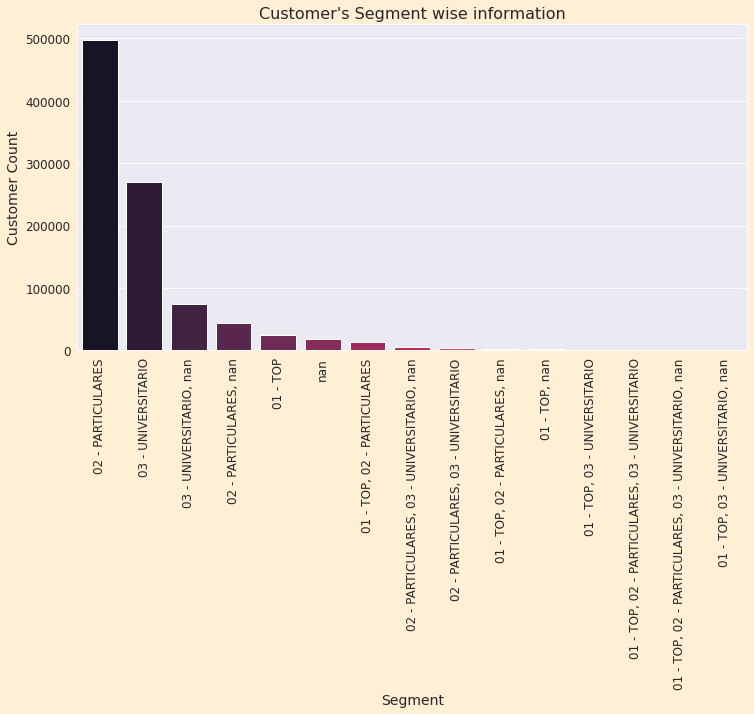

In [ ]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(segment_dupe_df.Segment.value_counts().index,segment_dupe_df.Segment.value_counts().values,palette="rocket")
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title("Customer's Segment wise information", fontsize=16)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
test_df.groupby('Segment',dropna= False)['CustomerID'].nunique().sort_values(ascending=False)

Segment
02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
NaN                     2248
Name: CustomerID, dtype: int64

In [ ]:
round((test_df.groupby('Segment',dropna=False)['CustomerID'].count().sort_values(ascending=False)/test_df.shape[0])*100,1).astype(str) + "%"

Segment
02 - PARTICULARES     58.7%
03 - UNIVERSITARIO    37.2%
01 - TOP               3.9%
NaN                    0.2%
Name: CustomerID, dtype: object

4. In test data, each customer belongs to only one segment, which is good. 
5. There are 0.2% missing values in test which we will impute in later section.

<h3><b>9.6.3 Numerical Featues</b></h3>

> <h5><b> 22. Age </b></h5>

In [ ]:
round(train_df[['Age']].describe().T,0)

count  mean   std  min   25%   50%   75%    max
Age  13619575.0  40.0  17.0  2.0  24.0  39.0  50.0  164.0

In [ ]:
series_17 = train_df.groupby('Age',dropna= False)['CustomerID'].nunique().sort_index()
series_17

Age
2.0        142
3.0        213
4.0        274
5.0        365
6.0        433
7.0        466
8.0        553
9.0        694
10.0       905
11.0      1182
12.0      1422
13.0      1476
14.0      1493
15.0      1499
16.0      1417
17.0      1370
18.0      1318
19.0      5227
20.0     63208
21.0     94183
22.0     89144
23.0     91888
24.0     85438
25.0     62039
26.0     43603
27.0     35235
28.0     30357
29.0     26377
30.0     23759
31.0     22016
32.0     21830
33.0     22105
34.0     22540
35.0     23449
36.0     25081
37.0     26998
38.0     29017
39.0     32052
40.0     35314
41.0     37571
42.0     38787
43.0     39112
44.0     38790
45.0     38047
46.0     36322
47.0     34614
48.0     32931
49.0     30549
50.0     28687
51.0     27166
52.0     25655
53.0     24402
54.0     22261
55.0     20149
56.0     18508
57.0     17591
58.0     16429
59.0     15305
60.0     14369
61.0     13300
62.0     12421
63.0     11306
64.0     10616
65.0     10337
66.0     10023
67.0      9562
68.0  

In [ ]:
print ("Percentage of missing values : ",7340/956645 * 100)

Percentage of missing values :  0.7672647638361147


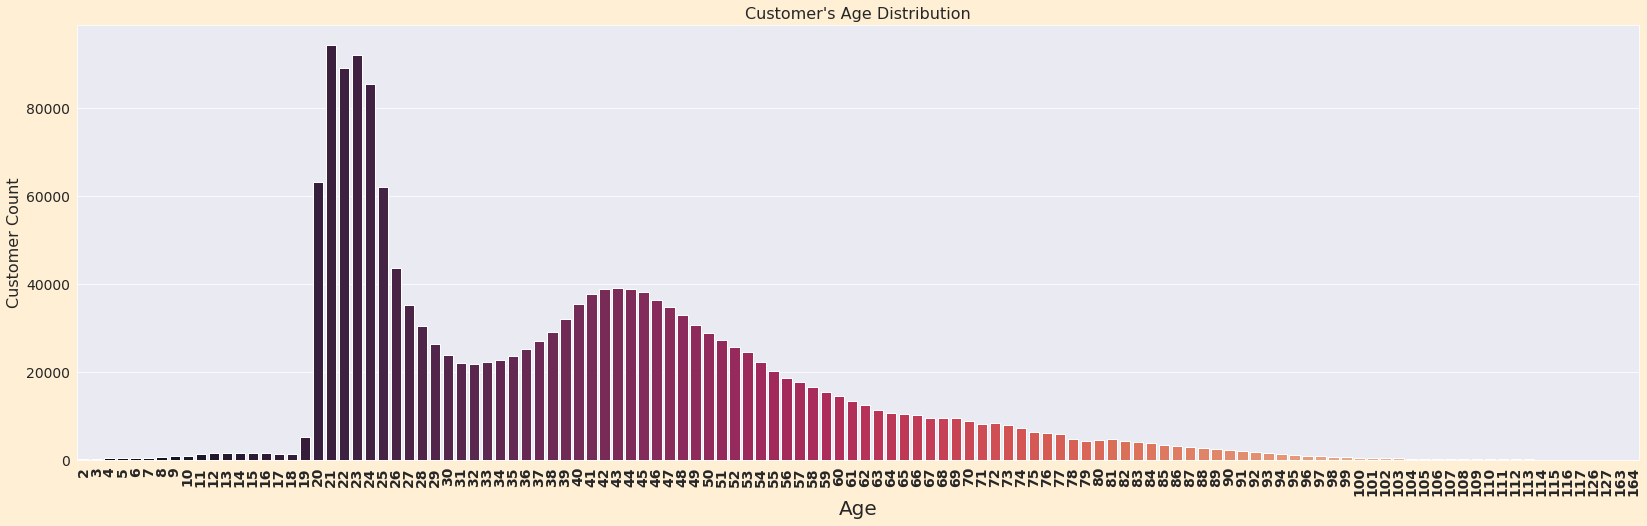

In [ ]:
plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_17.index[:-1].astype('int'),series_17.values[:-1],palette="rocket")
plt.xlabel('Age', fontsize=20)
plt.ylabel('Customer Count', fontsize=16)
plt.title("Customer's Age Distribution", fontsize=16)
plt.xticks(fontsize=14,rotation=90,weight='bold')
plt.yticks(fontsize=14)
plt.show()

In [ ]:
round (test_df[['Age']].describe().T,0)

count  mean   std  min   25%   50%   75%    max
Age  929615.0  40.0  17.0  2.0  25.0  39.0  51.0  164.0

<font color='blue'><b>Observation:</b></font>
1. The age distribution is Bimodal with two peaks, one between 20-26 and another between 40-60. This means there are broadly 2 groups of bank customers. 
2. The maximum age in both test and train dataset is 164. We need to cap the ages. Assuming that 100 is the maximum human age we will set upper bound accordingly.
3. 0.8% of the customers in train data have age value missing which we will impute in next section

> <h5><b> 23. Seniority </b></h5>

In [ ]:
round(train_df[['Seniority']].describe().T,0)

count  mean     std       min   25%   50%    75%    max
Seniority  13619575.0  77.0  1672.0 -999999.0  23.0  50.0  135.0  256.0

In [ ]:
series_18 = train_df.groupby('Seniority',dropna= False)['CustomerID'].count().sort_index()
series_18

Seniority
-999999.0        38
 0.0         134484
 1.0         132579
 2.0         130259
 3.0         132745
 4.0         127442
 5.0         139618
 6.0         127176
 7.0         129262
 8.0         155703
 9.0         177957
 10.0        206165
 11.0        124718
 12.0        243160
 13.0        123990
 14.0        126798
 15.0        121716
 16.0        135307
 17.0        125055
 18.0        125186
 19.0        118696
 20.0        145050
 21.0        214795
 22.0        154809
 23.0        177839
 24.0        167059
 25.0        108448
 26.0        113488
 27.0        107958
 28.0        104820
 29.0        102815
 30.0        103117
 31.0        109500
 32.0        139023
 33.0        174352
 34.0        147957
 35.0        149736
 36.0        164425
 37.0        100490
 38.0        105792
 39.0         98125
 40.0        103485
 41.0         99968
 42.0         92558
 43.0        136555
 44.0        150837
 45.0        168847
 46.0        141724
 47.0        123834
 48.0     

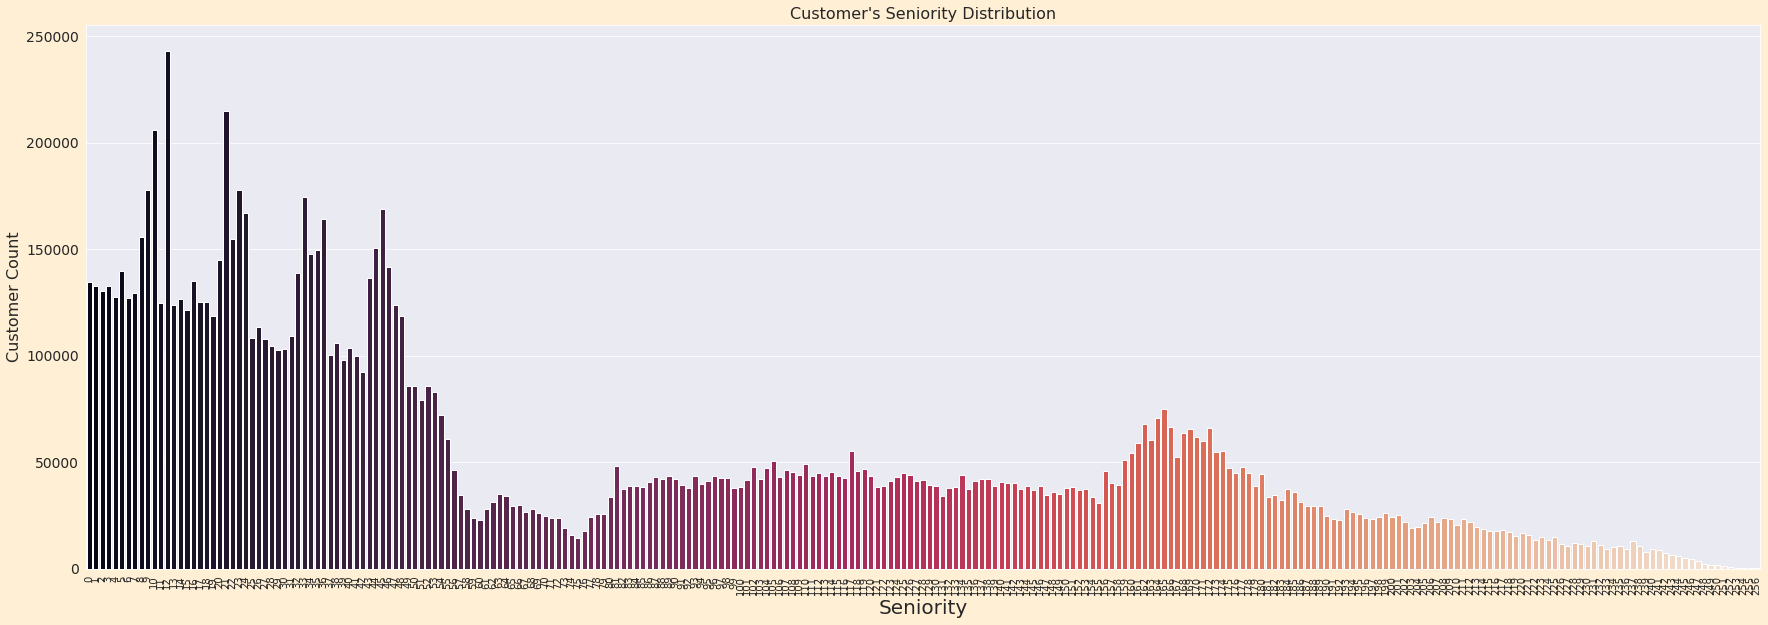

In [ ]:
plt.figure(figsize=(30,10),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_18.index[1:258].astype('int'),series_18.values[1:258],palette="rocket")
plt.xlabel('Seniority', fontsize=20)
plt.ylabel('Customer Count', fontsize=16)
plt.title("Customer's Seniority Distribution", fontsize=16)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<i>Zooming in the seniority between 0 to 60 months.</i>

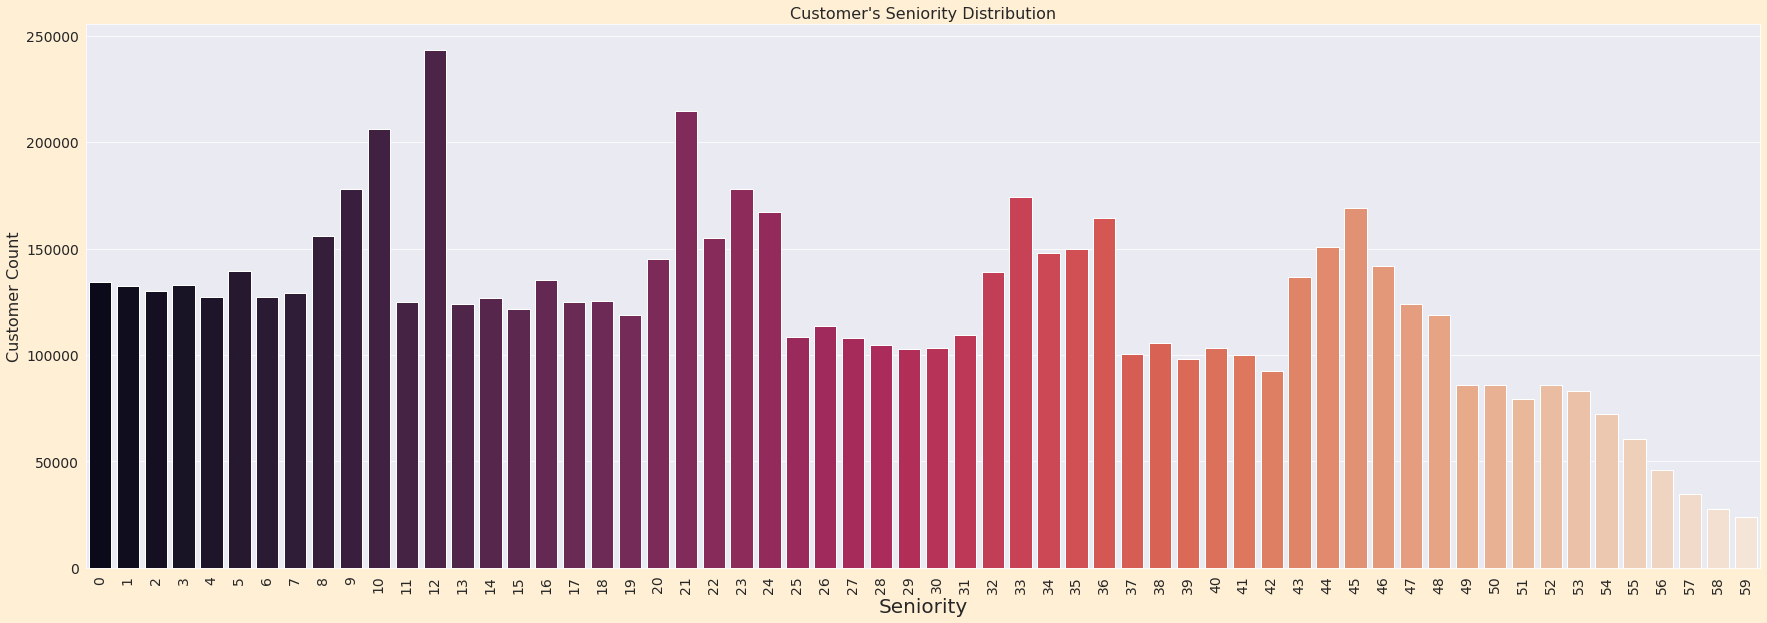

In [ ]:
plt.figure(figsize=(30,10),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(series_18.index[1:61].astype('int'),series_18.values[1:61],palette="rocket")
plt.xlabel('Seniority', fontsize=20)
plt.ylabel('Customer Count', fontsize=16)
plt.title("Customer's Seniority Distribution", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
round(test_df[['Seniority']].describe().T,0)

count  mean     std       min   25%   50%    75%    max
Seniority  929615.0  78.0  1798.0 -999999.0  23.0  55.0  136.0  257.0

In [ ]:
test_df.groupby('Seniority',dropna= False)['CustomerID'].count().sort_index()[0:10]

Seniority
0.0       129
1.0      4179
2.0      3969
3.0      4564
4.0      6124
5.0      6762
6.0      5579
7.0     13932
8.0     26335
9.0     22972
10.0     9944
Name: CustomerID, dtype: int64

<font color='blue'><b>Observation:</b></font>
1. We have an outlier value of -999999 in both Train and Test data of which we will get rid of in the next section.
2. There are peaks in between; top three most common seniority levels of customers in months are 12,10 and 21
3. 0.8% of the customers in train data have seniority value missing which we will impute in next section.

> <h5><b> 24. GrossIncome </b></h5>

In [ ]:
round(train_df[['GrossIncome']].describe().T,0)

count      mean       std     min      25%       50%       75%         max
GrossIncome  10852934.0  134254.0  230620.0  1203.0  68711.0  101850.0  155956.0  28894396.0

In [ ]:
gross_income_series = np.sort(train_df.GrossIncome.unique())

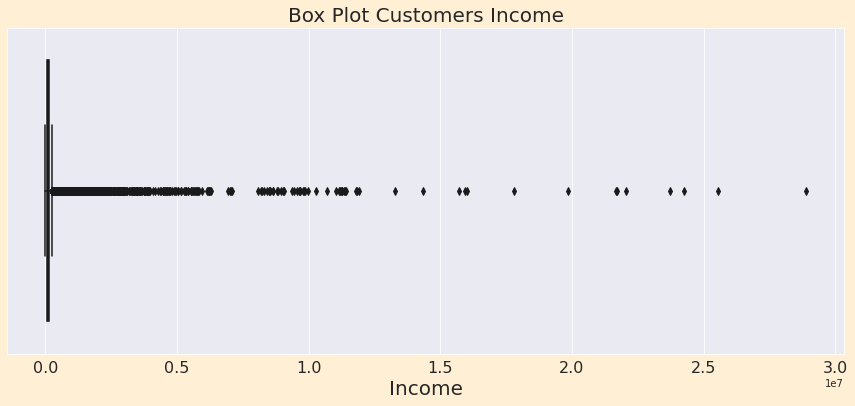

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.boxplot(gross_income_series,palette=sns.color_palette("rocket"))
plt.xlabel('Income', fontsize=20)
plt.title("Box Plot Customers Income", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

* There are customers with extreme income, hence squeezing the box plot to the left. 
* PDF of gross income will be heavily right skewed.

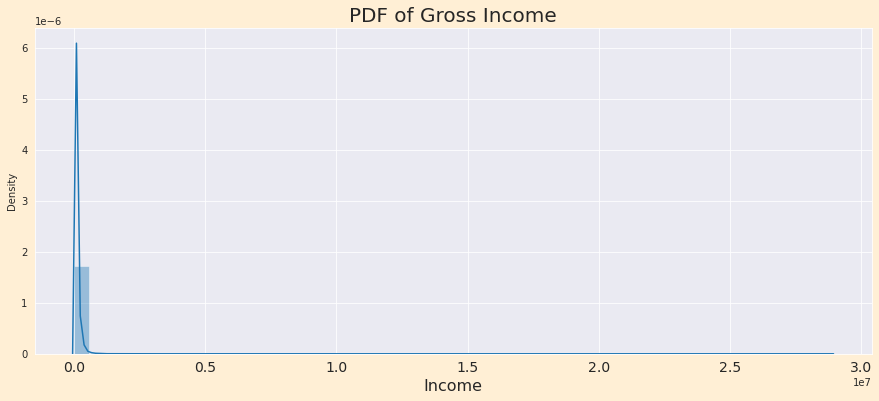

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.distplot(gross_income_series,kde=True)
plt.xlabel('Income', fontsize=16)
plt.title("PDF of Gross Income", fontsize=20)
plt.xticks(fontsize=14)
plt.show()

* As expected it is right-tailed distribution. Let's plot Log of gross income. It should be normally distributed.

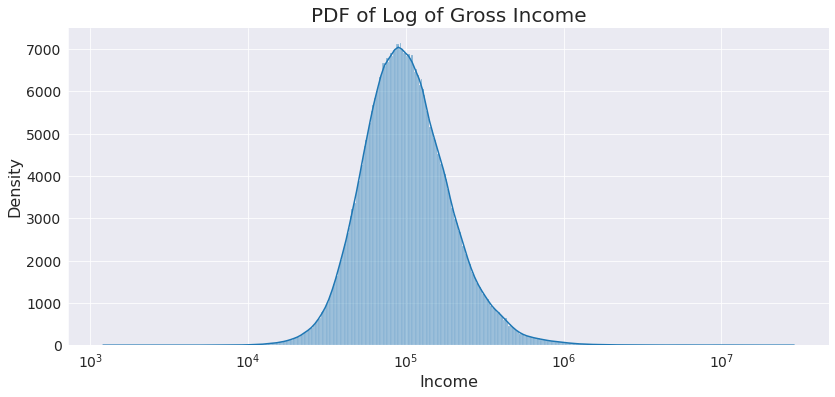

In [ ]:
sns.set_style("darkgrid")
sns.displot(gross_income_series,kde=True,log_scale=True,height=5,aspect=2.3,palette=sns.color_palette())
plt.title("PDF of Log of Gross Income", fontsize=20)
plt.xlabel('Income', fontsize=16)
plt.ylabel( "Density",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Hence, it is confirmed that there are few customers with extremely large income. This can be an outlier. We need to set an upper bound.

In [ ]:
print ("Percentiles 0-100 step - 10")
for i in range(0,101,10):
  print (i,round(np.nanpercentile(gross_income_series,i),0))
print ("\n")

print ("Percentiles 90-100 step - 1")
for i in range(90,101,1):
  print (i,round(np.nanpercentile(gross_income_series,i),0))
print ("\n")

print ("Percentiles 99-100 step - 0.1")
for i in (99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100):
  print (i,round(np.nanpercentile(gross_income_series,i),0))

Percentiles 0-100 step - 10
0 1203.0
10 46890.0
20 59800.0
30 71316.0
40 83374.0
50 96853.0
60 113091.0
70 134029.0
80 165710.0
90 225500.0
100 28894396.0


Percentiles 90-100 step - 1
90 225500.0
91 235687.0
92 247684.0
93 261872.0
94 279436.0
95 301347.0
96 329675.0
97 368705.0
98 426914.0
99 555045.0
100 28894396.0


Percentiles 99-100 step - 0.1
99.1 581636.0
99.2 611820.0
99.3 647319.0
99.4 691022.0
99.5 744108.0
99.6 814450.0
99.7 912901.0
99.8 1065081.0
99.9 1438086.0
100 28894396.0


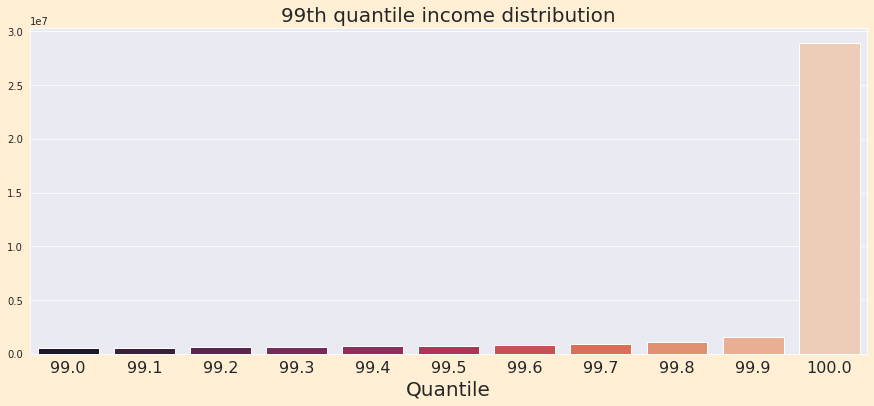

In [ ]:
gross_income_90th_series = train_df['GrossIncome'].quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(gross_income_90th_series.index*100,gross_income_90th_series.values,palette="rocket")
plt.xlabel('Quantile', fontsize=20)
plt.title("99th quantile income distribution", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Box-plot confirms the presence of very large income values as outliers. 
2. PDF of Gross Income is heavily right skewed, which means there are few customers with very high income. Log normal plot confirms this.
3. By looking at the individual quantile values between 99 to 100, we can see that there is sudden increase in the 100th percentile. It can be an outlier. 
4. We will cap the gross income at 99.9th percentile value.
5. There are 20% of the records in train data where Gross Income is missing, we will impute it in next section.

<h3><b>9.6.4 Target Featues</b></h3>

<b><i>There are records with missing values in target 'Payroll' and 'Pensions_2' which we will impute in the next section.</i></b>

In [ ]:
product_count = train_df[products].astype('float64').sum(axis=0).sort_values(ascending=False)

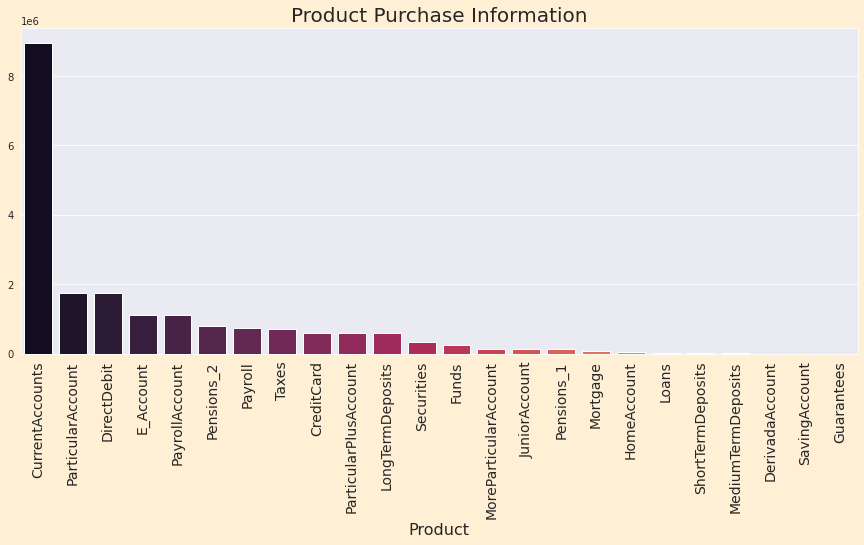

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(product_count.index,product_count.values,palette="rocket")
plt.xlabel('Product', fontsize=16)
plt.title("Product Purchase Information", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.show()

<font color='blue'><b>Observation:</b></font>
 1. Current Account is the most popular product, followed by Particular Account
 2. Saving Account and Guarantees are least popural products

<h3><b> 9.7 Bivariate Analysis</b> </h3>

<h3><b>9.7.1 Date and Products</b></h3>

In [ ]:
products_date = products.copy()
products_date.insert(0,'Date')
date_product_df = train_df[products_date]
date_product_df['Date'] = pd.to_datetime(date_product_df["Date"])
date_product_df['year_month'] = date_product_df['Date'].dt.strftime('%Y-%m')
date_product_df.head(2)

Date  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit year_month
0 2015-01-28              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0    2015-01
1 2015-01-28              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0    2015-01

In [ ]:
product_date_summary = pd.DataFrame(date_product_df.groupby('year_month').sum().reset_index())
product_date_summary.head(2)

year_month  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit
0    2015-01             88          19           487855              301           58763           7757                   8418             106471                  36195               1513                1620             36010      60381  13865      5007        7430   2349  38288       35613       20263         3234  38995.0     43331.0        95601
1    2015-02             89          20           488658              301           60028           7690                   8228             106043                  36040               2055                1596             35621      61080  14160      4998        7407   2344  38507       34352       20198         3219  40746.0     44810.0        94543

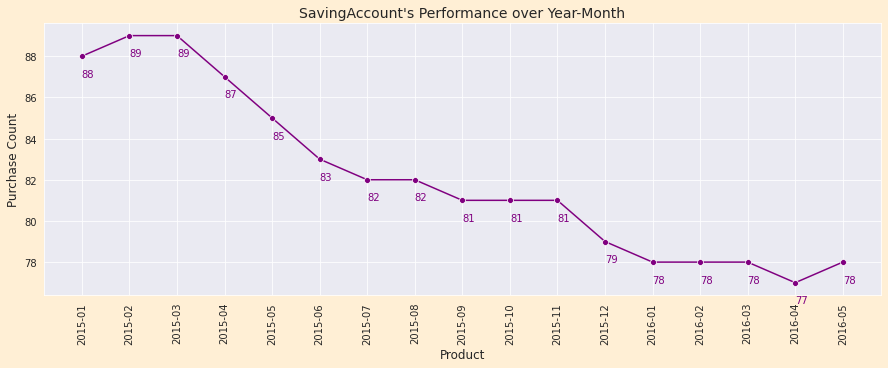

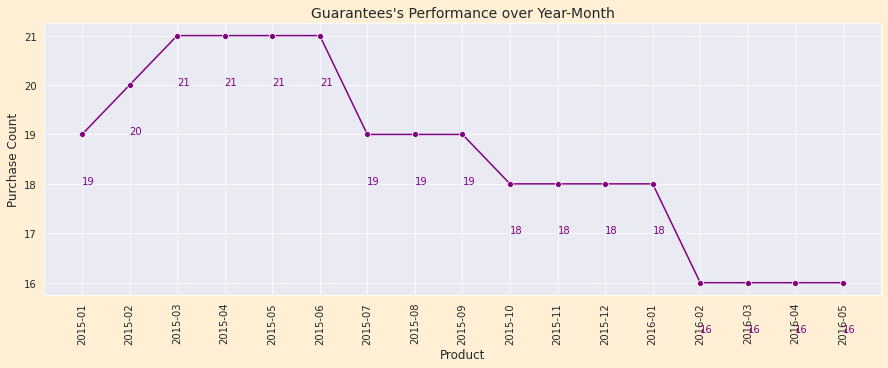

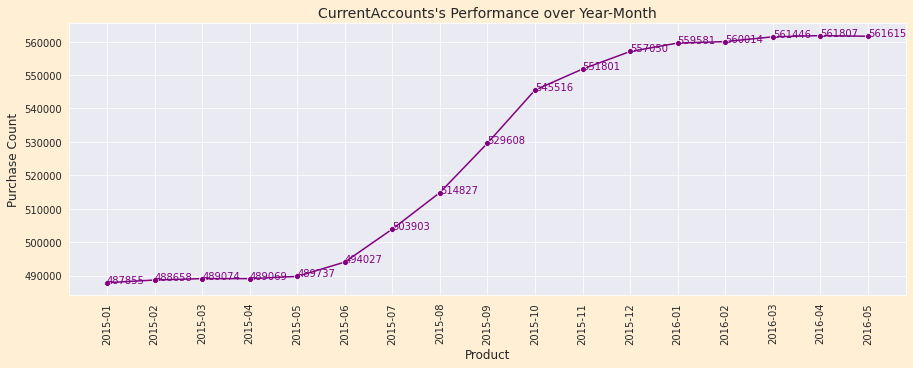

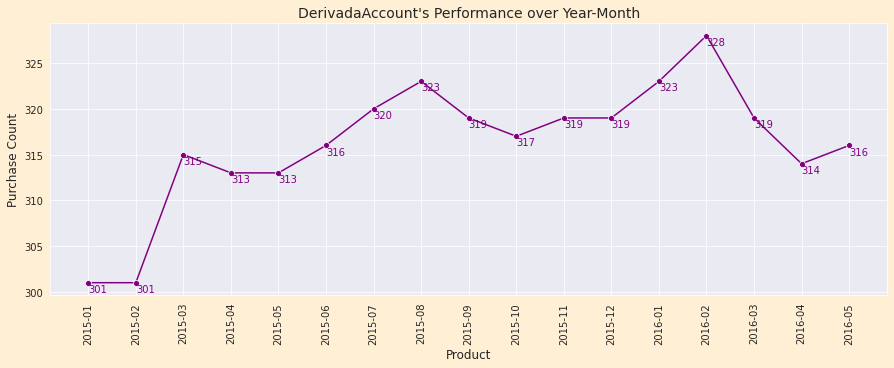

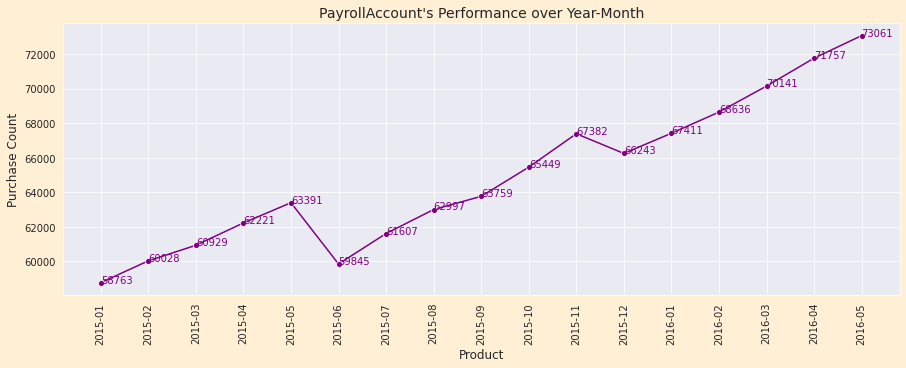

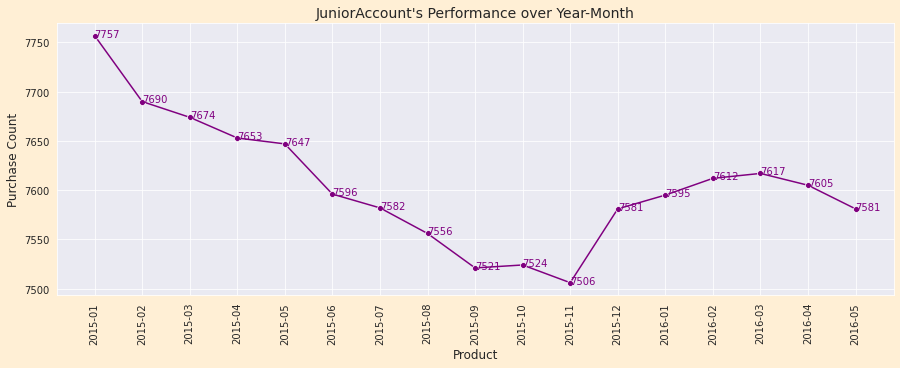

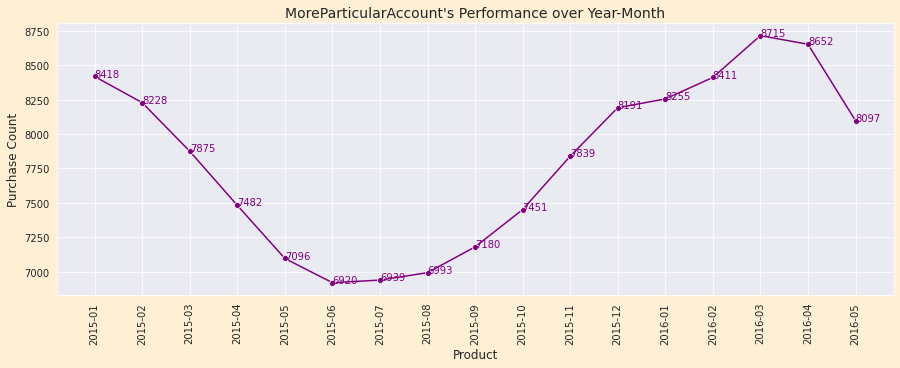

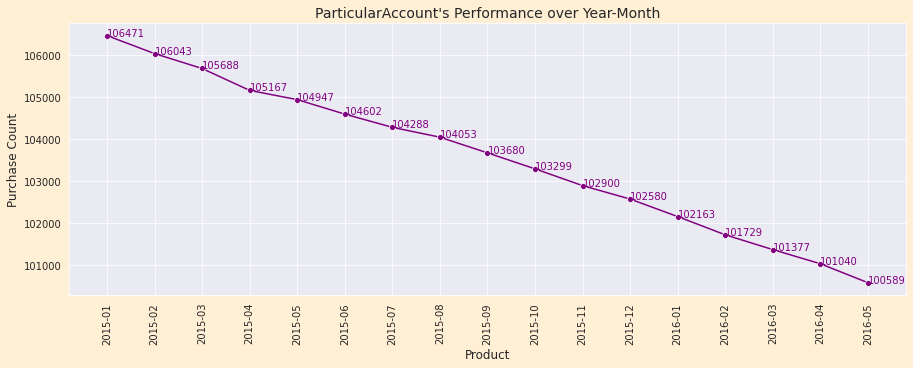

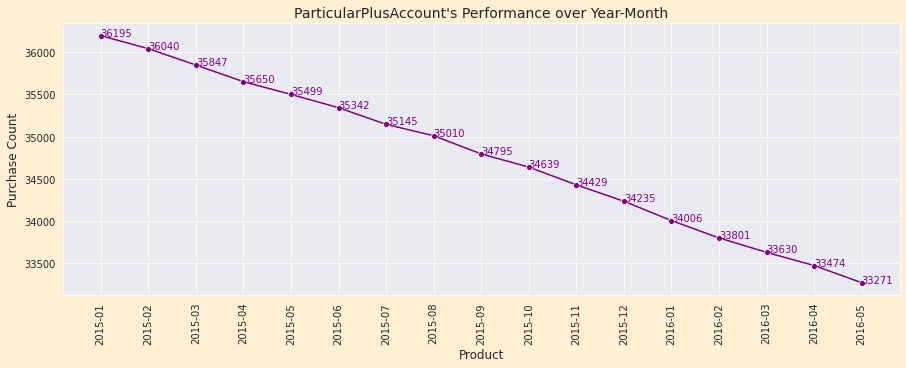

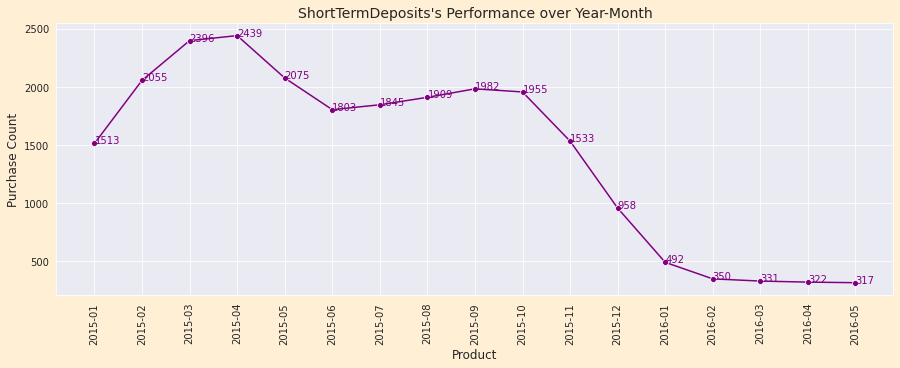

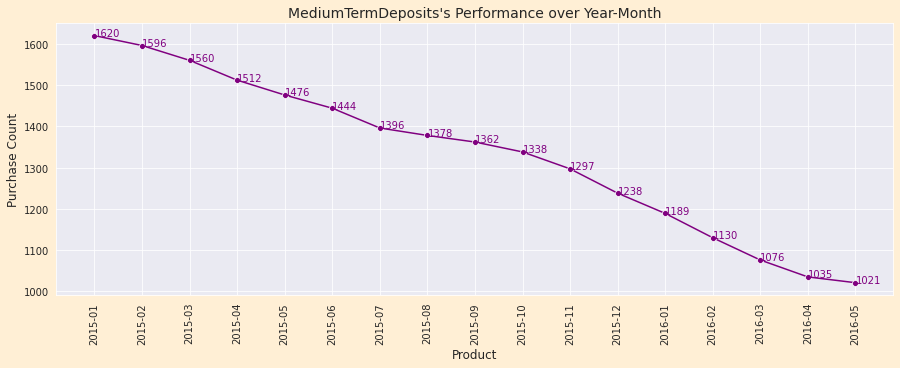

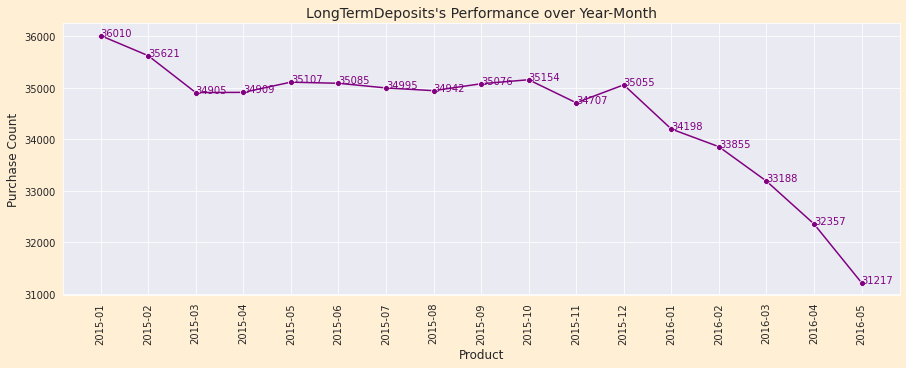

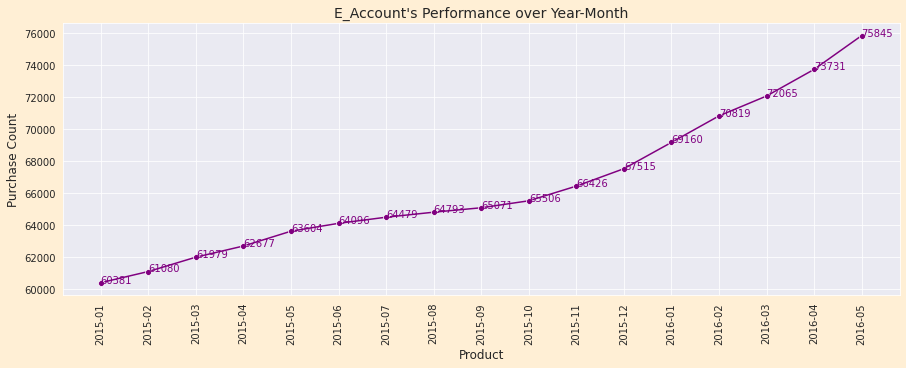

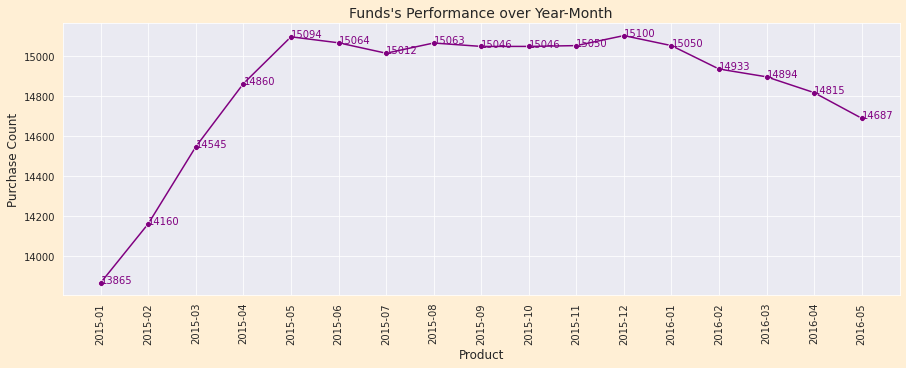

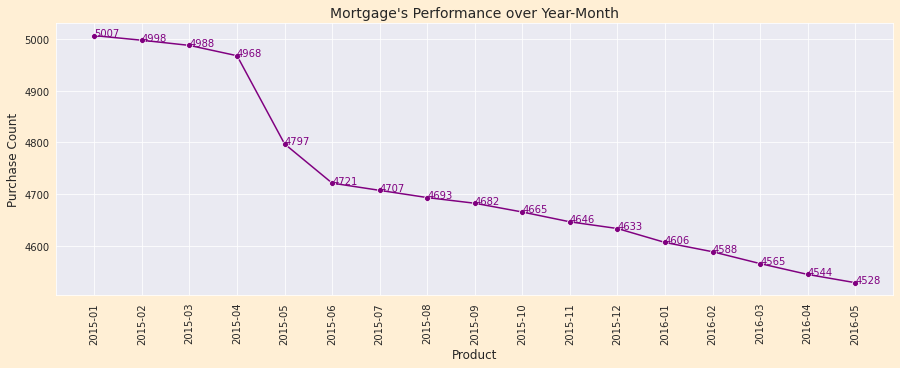

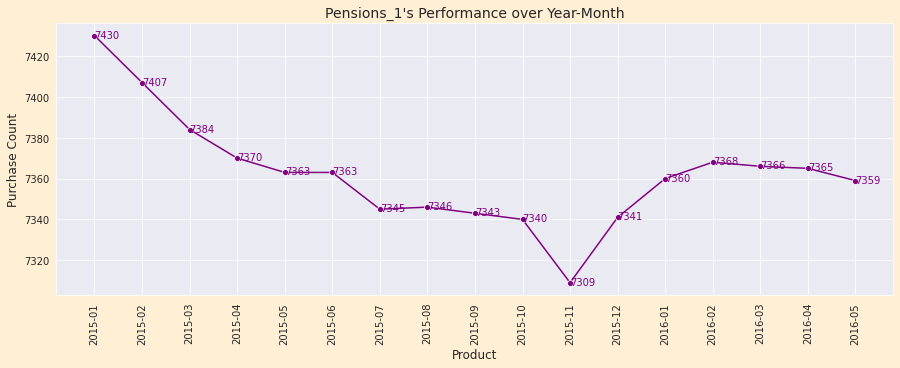

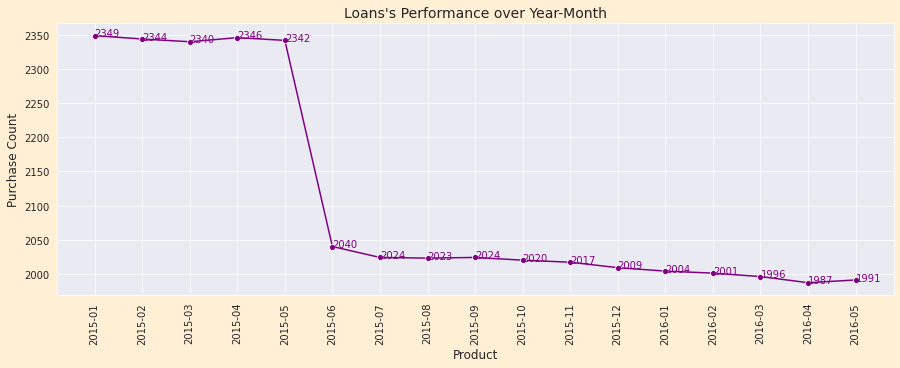

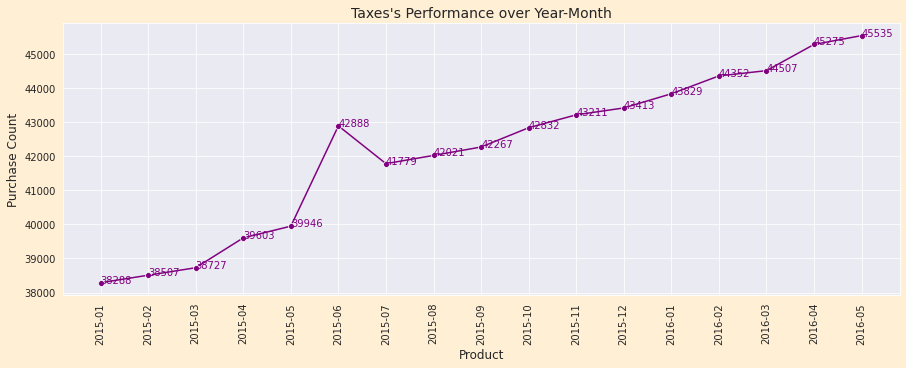

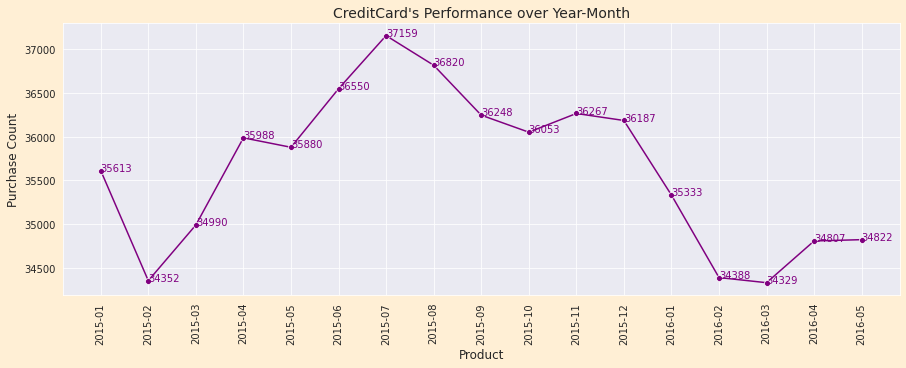

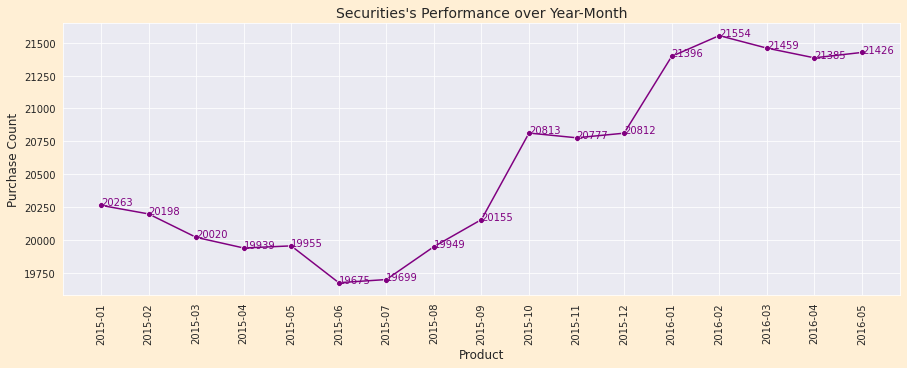

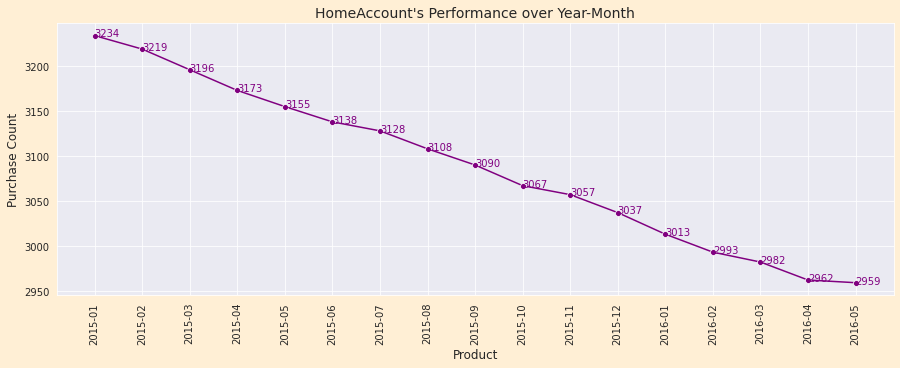

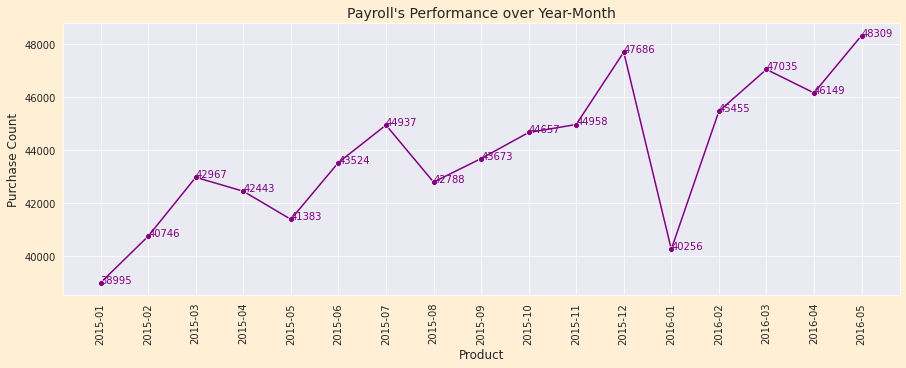

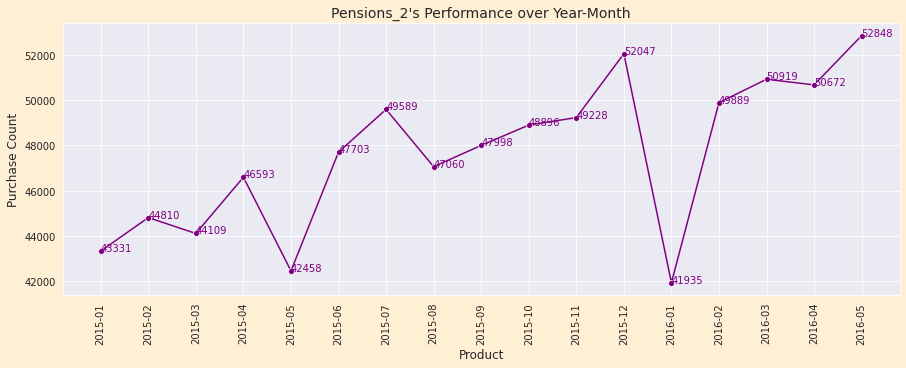

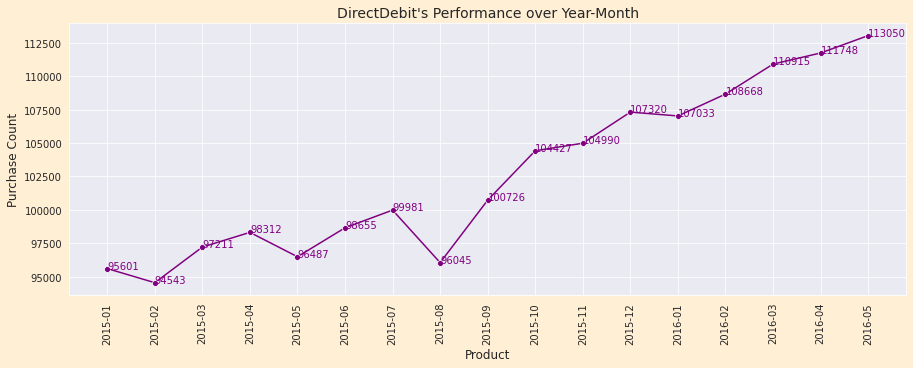

In [ ]:
for prod in products:
  plt.figure(figsize=(15,5),facecolor='papayawhip')
  sns.set_style("darkgrid")
  sns.lineplot(product_date_summary.year_month,product_date_summary[prod],color='purple',marker="o",)
  for x, y in zip(product_date_summary.year_month, product_date_summary[prod]):
    plt.text(x = x, y = y-1,s = "{:.0f}".format(y),color = "purple") 
  plt.title("{0}'s Performance over Year-Month".format(prod), fontsize=14)
  plt.xlabel('Product', fontsize=12)
  plt.ylabel('Purchase Count', fontsize=12)
  plt.xticks(fontsize=10,rotation=90)
  plt.yticks(fontsize=10)
  plt.show()
  print ("\n")

<font color='blue'><b>Observation:</b></font>
1. Following products have a clear upward trend :     
 * Current Accounts
 * Payroll Accounts
 * E-accounts
 * Taxes
 * DirectDebit
2. Gurantees and Saving Account are owned by very less customers. We can remove these two products
3. Products whose numbers have fallen sharply overtime are :              
 * Short Term Deposits
 * Medium Term Deposits
 * Long term Deposits
 * Mortgage
 * Home Accounts
4. As we can see, purchasing behaviour of customers have changed a lot from Jan'2015 to May'2016. Thus, using purchase history all the way from Jan'15 to recommend products for June'16 is not a good idea. 
5. We will use recent 5-6 months purchases to recommend products for June 16


<h3><b>9.7.2 Sex of Customer and Products</b></h3>

In [ ]:
products_sex = products.copy()
products_sex.insert(0,'Sex')
products_sex_df = train_df[products_sex]

In [ ]:
prod_sex = pd.DataFrame(products_sex_df.groupby('Sex').sum().T)
prod_sex['Male'] = np.log(prod_sex['H'])
prod_sex['Female'] = np.log(prod_sex['V'])
prod_sex = prod_sex[['Male','Female']]

In [ ]:
prod_sex.head()

Sex                   Male     Female
SavingAccount     5.834811   6.960348
Guarantees        4.394449   5.459586
CurrentAccounts  15.246744  15.374555
DerivadaAccount   6.610696   8.440096
PayrollAccount   13.020180  13.387162

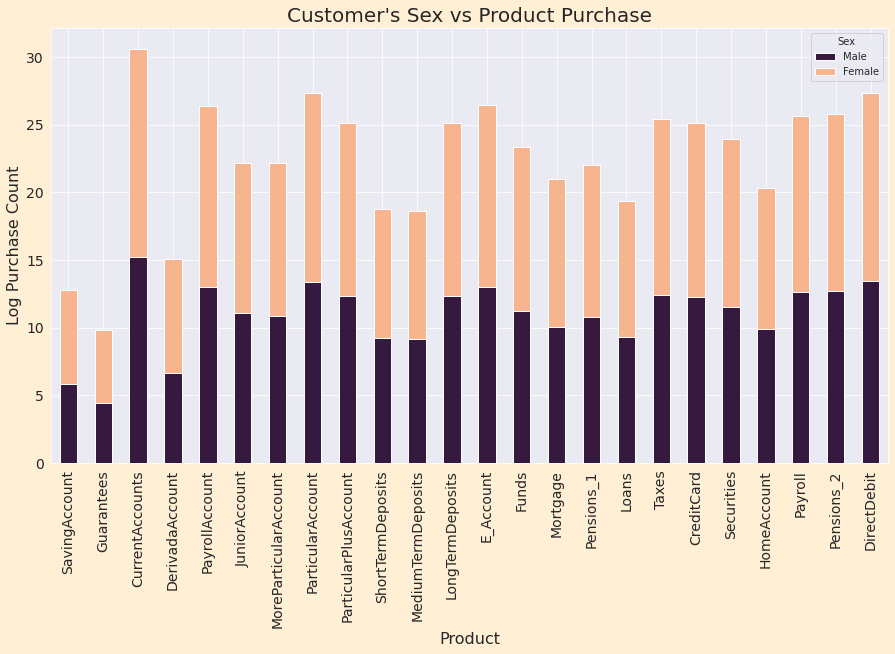

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = prod_sex.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Sex vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Log Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. There are no products which is biased to anyone of the sex.
2. No relation between Sex of Customer and Products purchased

<h3><b>9.7.3 Activity of Customer and Products</b></h3>

In [ ]:
products_active = products.copy()
products_active.insert(0,'Active')
products_active_df = train_df[products_active]

prod_active = pd.DataFrame(products_active_df.groupby('Active').sum().T)
prod_active.head()

Active                 0.0        1.0
SavingAccount        374.0     1022.0
Guarantees             0.0      316.0
CurrentAccounts  4297807.0  4640343.0
DerivadaAccount      501.0     4871.0
PayrollAccount     14104.0  1088912.0

In [ ]:
prod_active['Inactive_Customer'] = np.log(prod_active[0.0])
prod_active['Active_Customer'] = np.log(prod_active[1.0])
prod_active = prod_active[['Inactive_Customer','Active_Customer']]

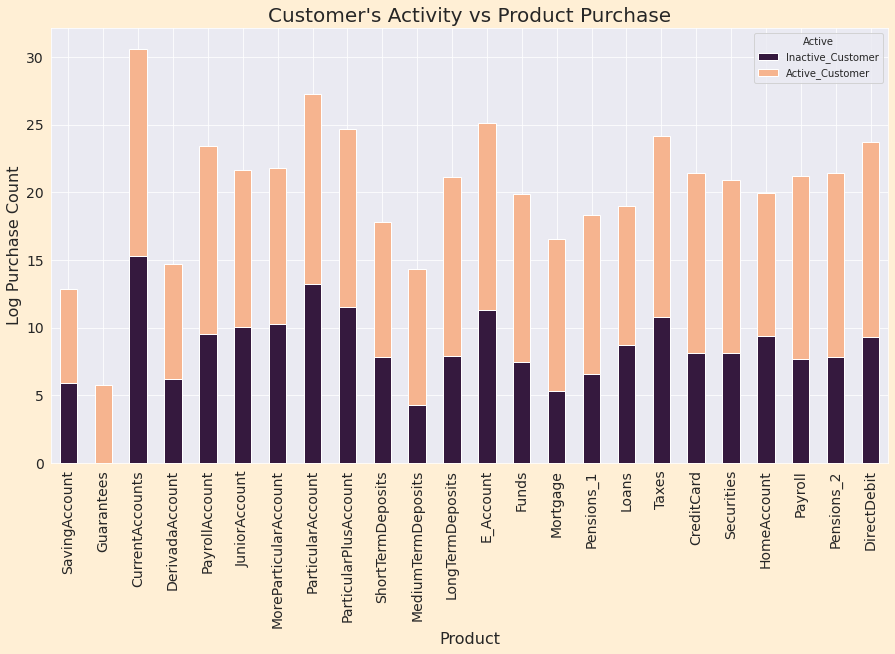

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = prod_active.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Activity vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Log Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. As expected most of the products are bought by Active Customers.

<h3><b>9.7.4 Entry Channel and Products</b></h3>

In [ ]:
train_df["EntryChannel"].value_counts().head(5)

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
Name: EntryChannel, dtype: int64

In [ ]:
products_entry = products.copy()
products_entry.insert(0,'EntryChannel')
top_channels = ['KHE', 'KAT', 'KFC', 'KHQ', 'KFA']
channel_product_df = train_df[train_df.EntryChannel.isin(top_channels)][products_entry]
top_channel_product_df = pd.DataFrame(channel_product_df.groupby('EntryChannel').sum()).T

In [ ]:
top_channel_product_df.head()

EntryChannel           KAT       KFA        KFC        KHE       KHQ
SavingAccount        777.0      51.0      287.0        0.0       0.0
Guarantees           154.0       5.0      125.0        0.0       0.0
CurrentAccounts  1854011.0  227554.0  1713483.0  3480725.0  440623.0
DerivadaAccount     2245.0     166.0     2157.0       17.0       2.0
PayrollAccount    447141.0   52585.0   339245.0    76760.0    3111.0

In [ ]:
for i in top_channels:
  top_channel_product_df[i] = np.log(top_channel_product_df[i])

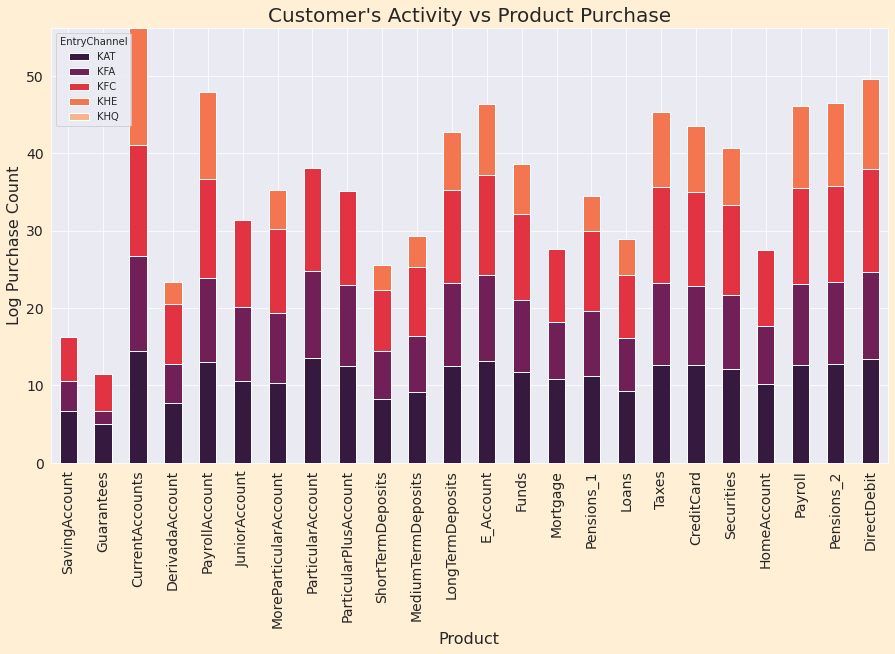

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = top_channel_product_df.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Activity vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Log Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

<font color='blue'><b>Observation:</b></font>
1. No dominance of any one of the entry channels in product purchase.

<h3><b>9.7.5 Customer Segment and Products</b></h3>

In [ ]:
products_segment = products.copy()
products_segment.insert(0,'Segment')
products_segment_df = train_df[products_segment]

In [ ]:
prod_segment = pd.DataFrame(products_segment_df.groupby('Segment').sum().T)
prod_segment = prod_segment.sort_values(by='02 - PARTICULARES',ascending=False)

In [ ]:
prod_segment.head()

Segment            01 - TOP  02 - PARTICULARES  03 - UNIVERSITARIO
CurrentAccounts    342911.0          4427518.0           4090434.0
ParticularAccount  141224.0          1589768.0             28372.0
DirectDebit        215653.0          1278516.0            249800.0
E_Account          262052.0           788218.0             77631.0
PayrollAccount     174163.0           758940.0            169285.0

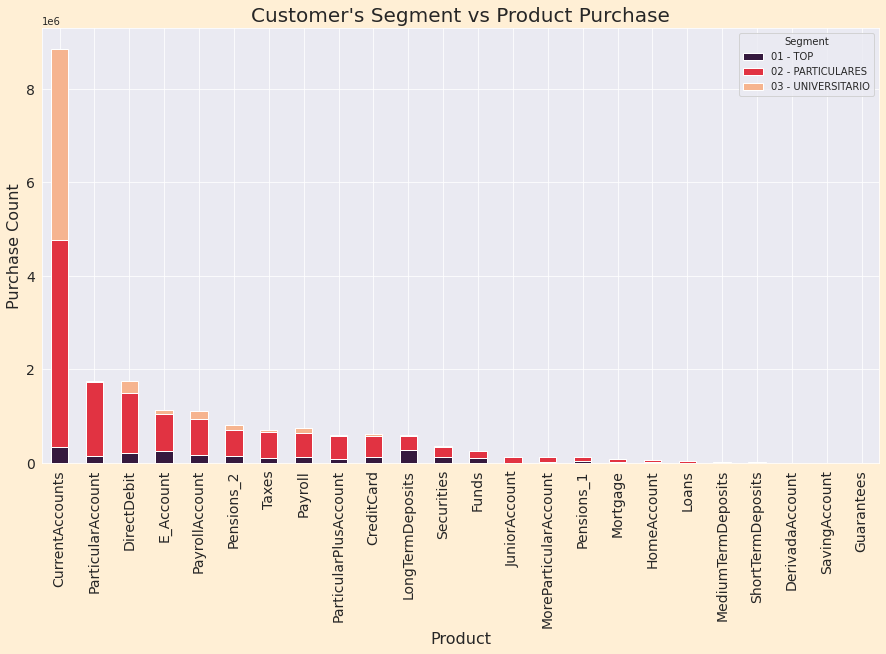

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = prod_segment.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Segment vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
segment_contribution = pd.DataFrame(prod_segment.sum(axis=0).reset_index())

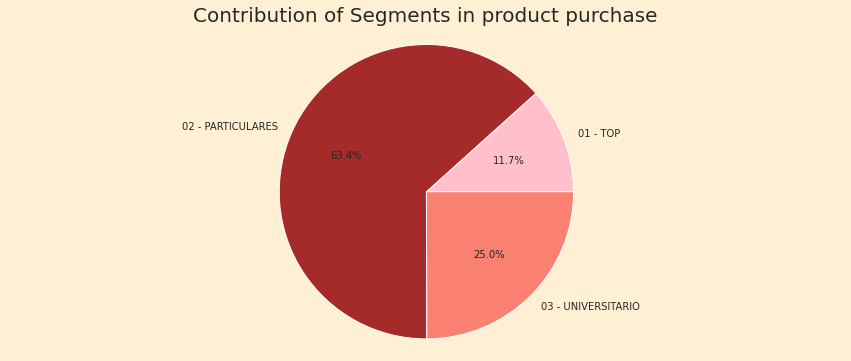

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
plt.pie(segment_contribution[0],labels=segment_contribution['Segment'],autopct='%1.1f%%',colors= ['pink','brown','salmon'])
plt.title('Contribution of Segments in product purchase',fontsize=20)
plt.axis('equal')
plt.show()

<font color='blue'><b>Observation:</b></font>
1. Most of the products are purchased customers belonging Particulars segement followed by Academic customers and then VIPs
2. There isn't any particular product which is completely dominated by one of the segments

<h3><b>9.7.6 Customer's Age and Products</b></h3>

In [ ]:
products_age = products.copy()
products_age.insert(0,'Age')
products_age_df = train_df[products_age]
prod_age = pd.DataFrame(products_age_df.groupby('Age').sum())

In [ ]:
print (prod_age.index.tolist())

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 126.0, 127.0, 163.0, 164.0]


Grouping Age into 6 bins for better analysis.

In [ ]:
bins = [0,20,40,60,80,100, np.inf]
names = ['0-20', '20-40', '40-60', '60-80', '80-100','100+']

prod_age['AgeRange'] = pd.cut(prod_age.index, bins, labels=names)
prod_age.head(2)

SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit AgeRange
Age                                                                                                                                                                                                                                                                                                                                                            
2.0              0           0                7                0               0            565                      0                  0                      0                  0                   0                 0          0      0        34           0      0      0           0           0            0      0.0         0.0            0     0-20
3.0              0           0                2                0               0           1415                      1                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      2.0         3.0            0     0-20

In [ ]:
prod_age_df = pd.DataFrame(prod_age.groupby('AgeRange')[products].sum()).T
prod_age_df

AgeRange                   0-20      20-40      40-60     60-80    80-100    100+
SavingAccount               0.0       44.0     1259.0      93.0       0.0     0.0
Guarantees                  0.0       87.0      212.0      17.0       0.0     0.0
CurrentAccounts        309395.0  5034057.0  2632257.0  775034.0  182155.0  5252.0
DerivadaAccount             2.0      745.0     3504.0     951.0     170.0     0.0
PayrollAccount           3785.0   413468.0   586331.0   87634.0   11722.0    76.0
JuniorAccount          128952.0       97.0        0.0       0.0       0.0     0.0
MoreParticularAccount     334.0    49823.0    62311.0   16562.0    3218.0     9.0
ParticularAccount           6.0   229085.0  1034174.0  364923.0  125934.0  5261.0
ParticularPlusAccount       0.0   122400.0   371657.0   80648.0   15675.0   275.0
ShortTermDeposits         175.0     7162.0    12455.0    3360.0     681.0     0.0
MediumTermDeposits          0.0     3363.0    14731.0    3336.0    1233.0     0.0
LongTermDeposits          582.0    75980.0   339460.0  136104.0   33914.0   176.0
E_Account                8593.0   304159.0   621059.0  164283.0   29764.0   167.0
Funds                      67.0    26140.0   156411.0   56157.0   13171.0   210.0
Mortgage                   34.0     6833.0    67913.0    5286.0      57.0     0.0
Pensions_1                  0.0     8697.0    95998.0   20011.0     392.0     0.0
Loans                       0.0     7977.0    22030.0    4274.0     225.0    17.0
Taxes                     408.0   190698.0   434796.0   70530.0   10133.0   240.0
CreditCard                197.0   129304.0   403227.0   68944.0    3860.0    34.0
Securities                136.0    48567.0   227247.0   62218.0   11054.0   102.0
HomeAccount                 0.0    14158.0    36285.0    1678.0     363.0     0.0
Payroll                  1245.0   273593.0   440145.0   30203.0     546.0    24.0
Pensions_2               1805.0   278108.0   451264.0   69070.0    9569.0    44.0
DirectDebit              5734.0   659646.0   921207.0  139543.0   18544.0   129.0

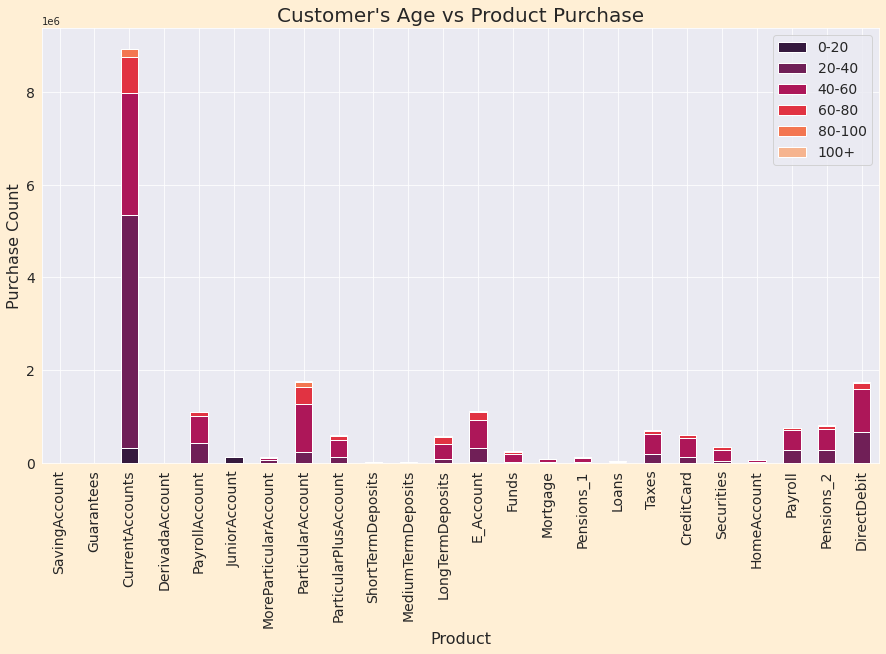

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = prod_age_df.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Age vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.legend(loc = 0,prop={'size': 14})
plt.show()

<i>Excluding Current Accounts from the analysis, in order to focus on other products.</i>

In [ ]:
update_df = prod_age_df.drop('CurrentAccounts')

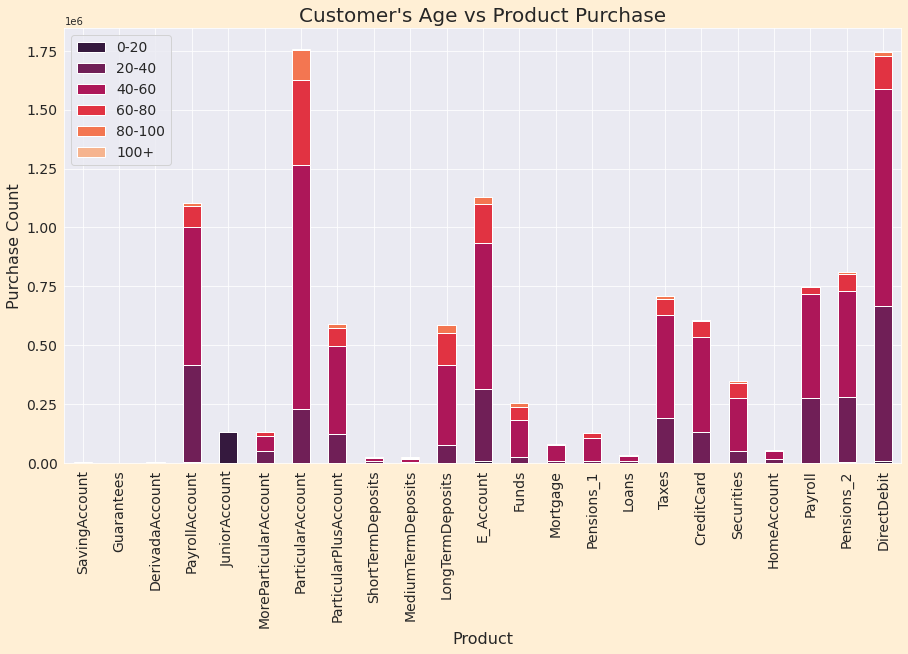

In [ ]:
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
ax = update_df.plot(kind='bar',stacked=True,figsize=(15,8),colormap=ListedColormap(sns.color_palette("rocket")))
ax.figure.set_facecolor('papayawhip')
plt.title("Customer's Age vs Product Purchase",fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Purchase Count', fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.legend(loc = 0,prop={'size': 14})
plt.show()

<font color='blue'><b>Observation:</b></font>
1. JuniorAccount product is purchased mainly by customers of age group 0-20
2. 20-40 and 40-60 are the two most prominent age groups. We have observed the same in univariate analysis of age, that is, the distribution of customer's age is bimodal with peaks between 20-26 and 40-60.
3. Excluding Current Accounts, customers belonging to age group 40-60 domniate in purchasing products.
4. Current Accounts product is mostly purchased by customers of age group 20-40.
5. Age does help in predicting products a customer purchases.


<h3><b>9.7.7 Customer's Seniority and Products</b></h3>

In [ ]:
products_seniority = products.copy()
products_seniority.insert(0,'Seniority')
products_seniority_df = train_df[products_seniority]


Excluding negative values from Seniority for better analysis.

In [ ]:
products_seniority_df = products_seniority_df[products_seniority_df.Seniority >= 0]
products_seniority_df.head()

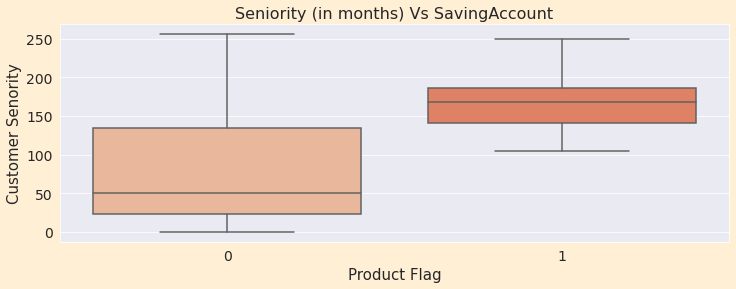

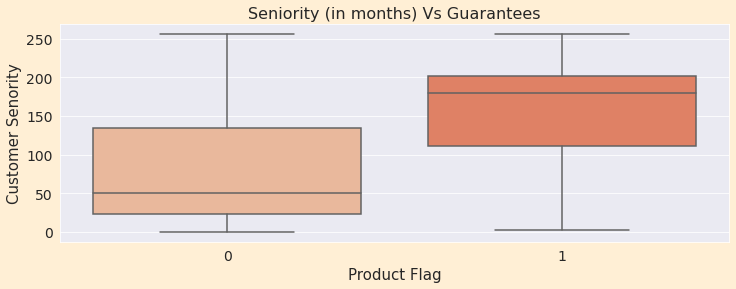

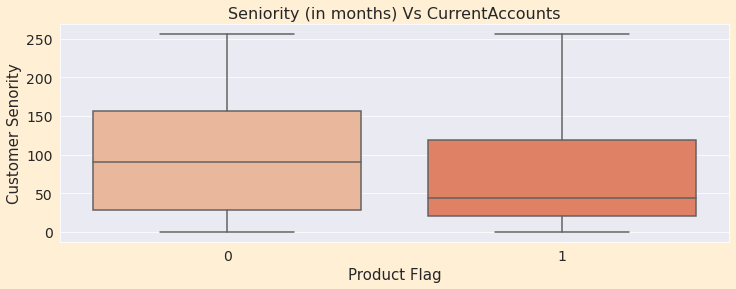

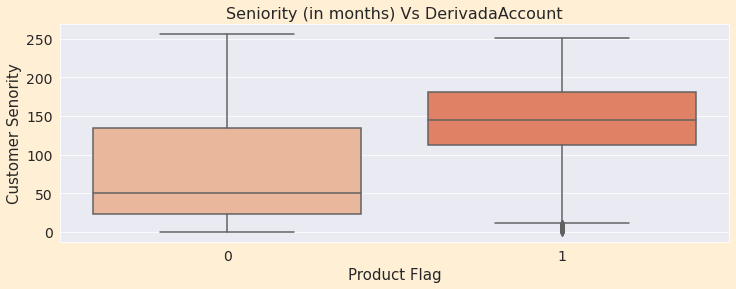

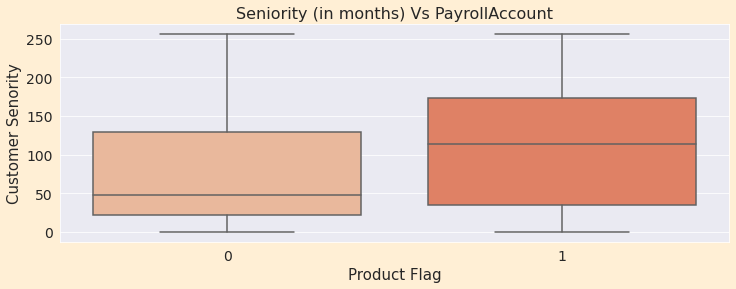

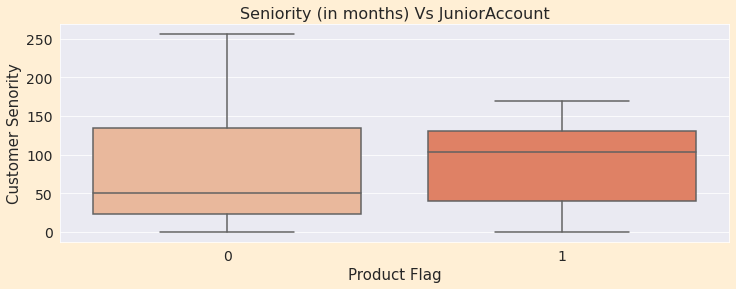

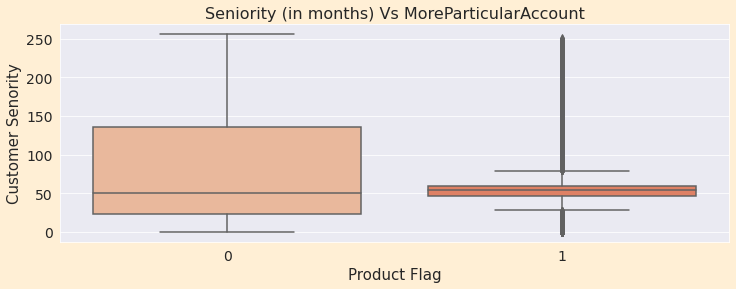

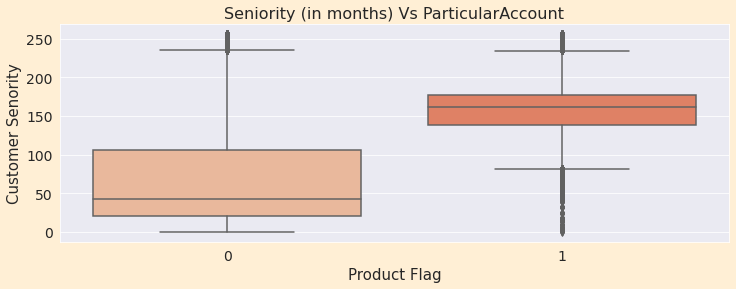

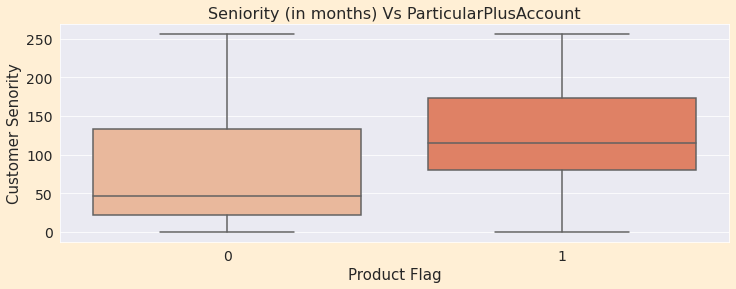

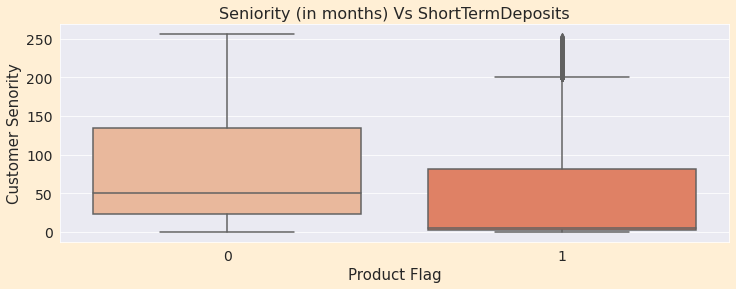

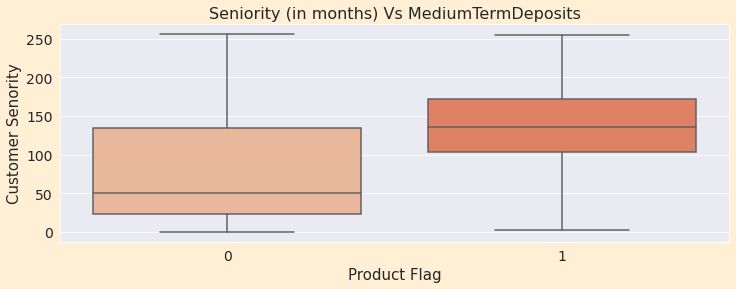

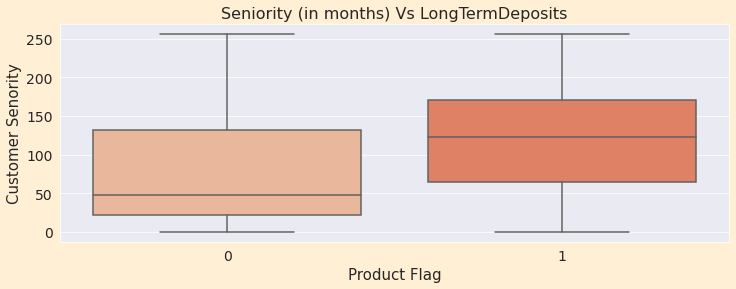

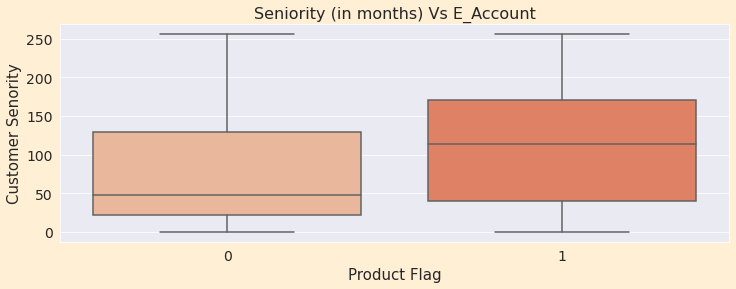

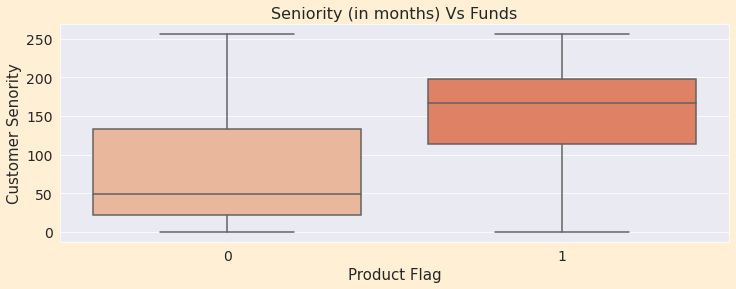

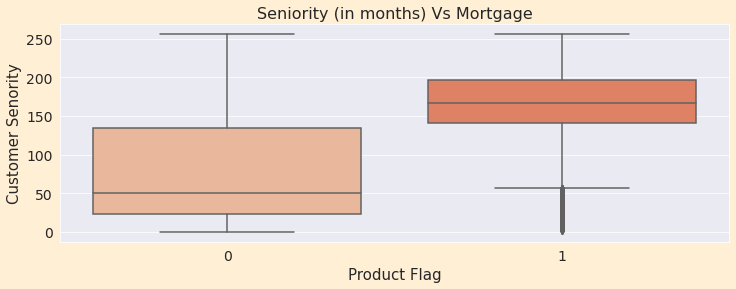

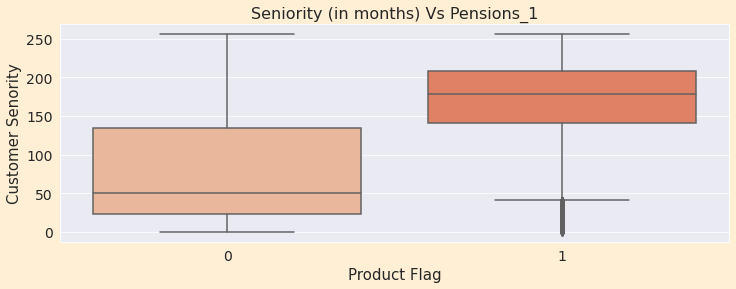

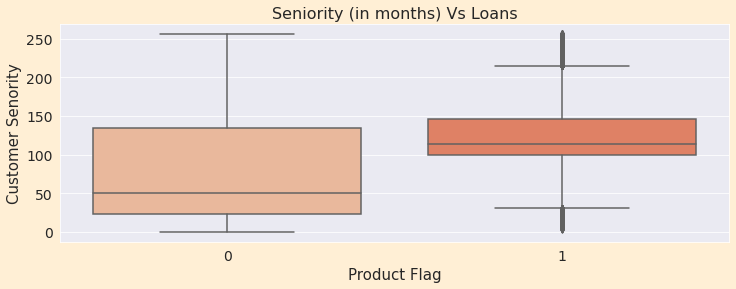

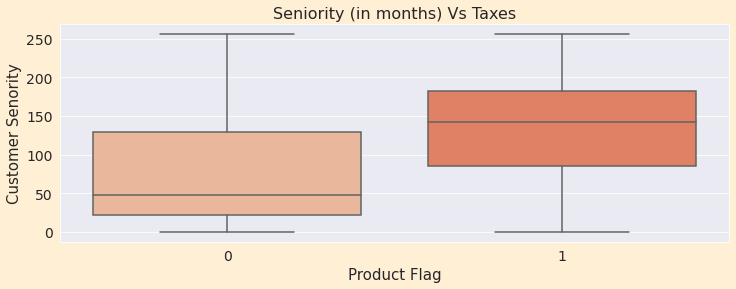

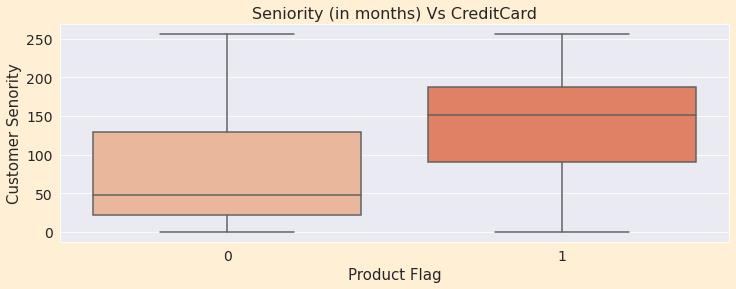

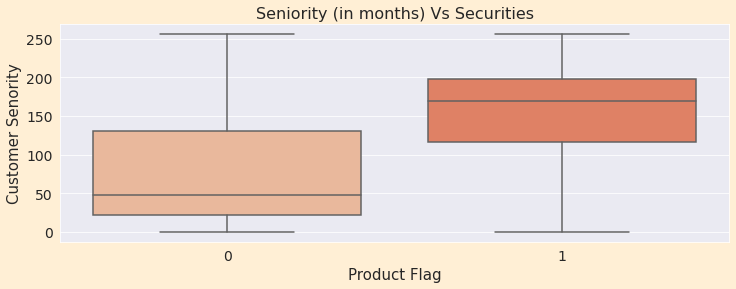

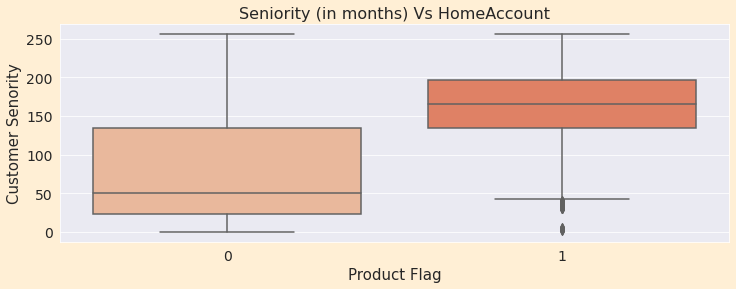

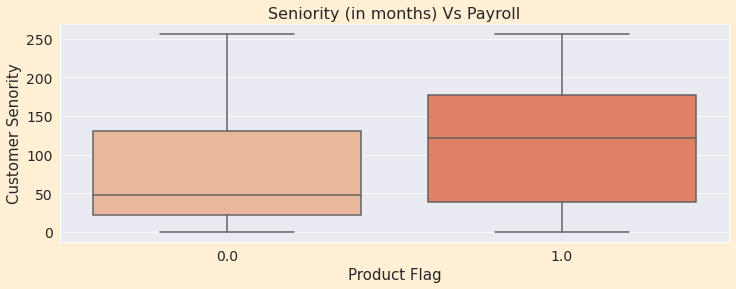

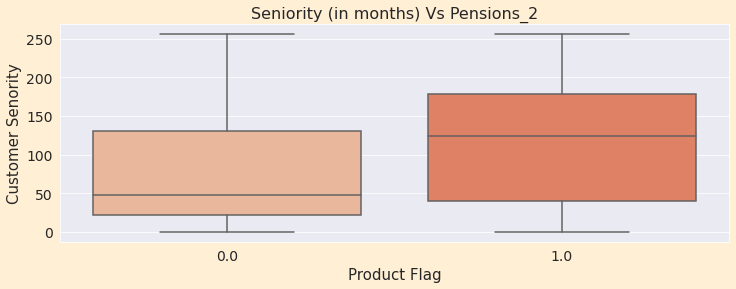

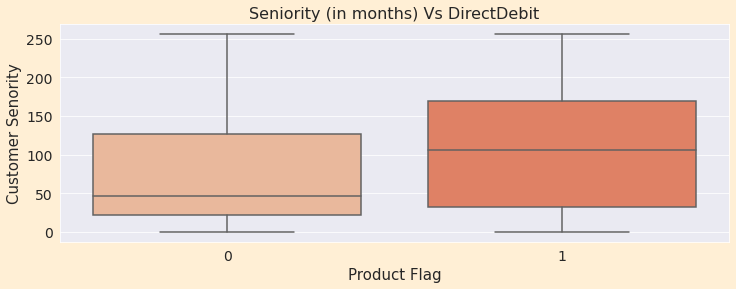

In [ ]:
for prod in products:
  plt.figure(figsize=(12,4),facecolor='papayawhip')
  sns.set_style("darkgrid")
  sns.boxplot(x=products_seniority_df[prod],y =products_seniority_df.Seniority, palette=sns.color_palette("rocket_r"))
  plt.title('Seniority (in months) Vs ' + prod, fontsize=16)
  plt.xlabel('Product Flag', fontsize=15)
  plt.ylabel('Customer Senority', fontsize=15)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()
  print ("\n")


<font color='blue'><b>Observation:</b></font>:
1. Box Plots of the following products are quite well seperated.
 * Also, all the products are purchased by customers with seniority > 140 months :    
    * Particular Account
    * Mortgage
    * Pensions_1
    * Securities
    * HomeAccount
2. Seniority also helps in predicting which customer purchases what product.

<h3><b>9.7.8 Customer's Gross Income and Products</b></h3>

In [ ]:
products_income = products.copy()
products_income.insert(0,'GrossIncome')
products_income_df = train_df[products_income]

* Capping maximum income to be 99.9th perctile to visualize box plots nicely, otherwise they will be highly squeezed.

In [ ]:
income_cap = train_df.GrossIncome.quantile(0.999)

In [ ]:
products_income_df["GrossIncome"].loc[products_income_df["GrossIncome"]>income_cap] = income_cap

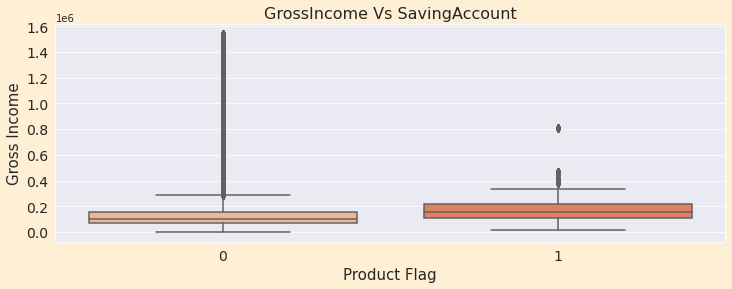

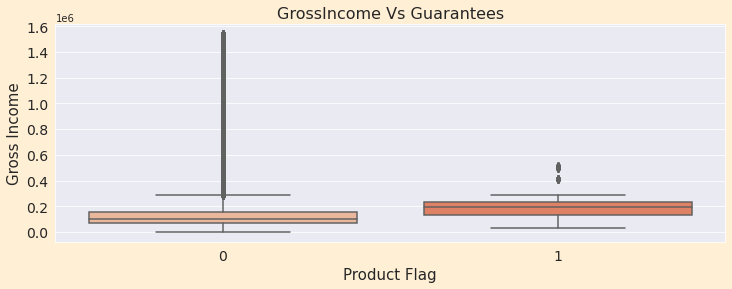

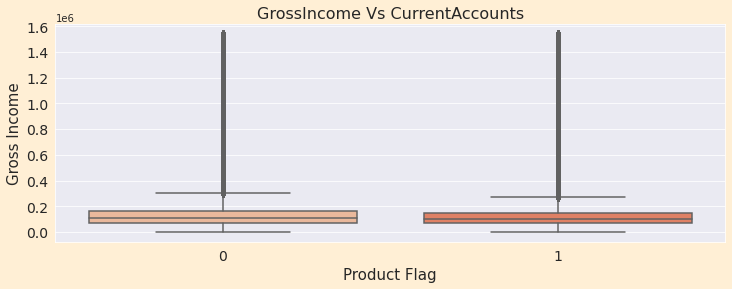

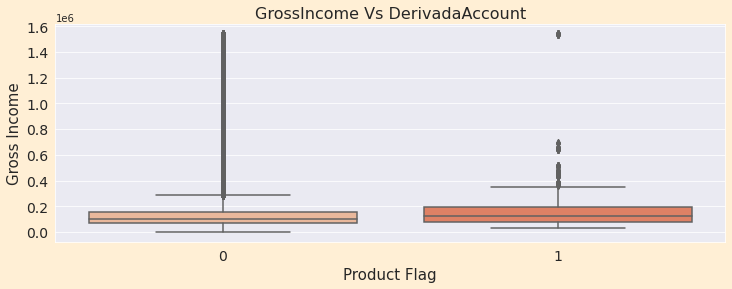

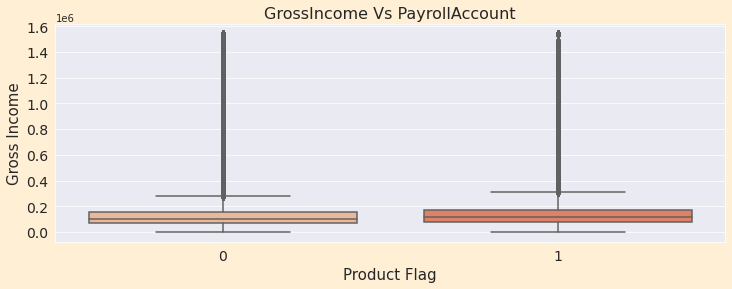

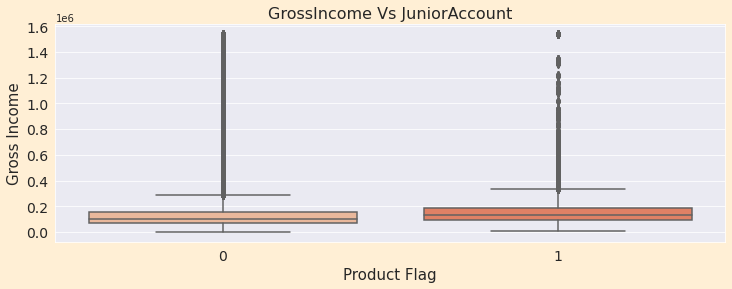

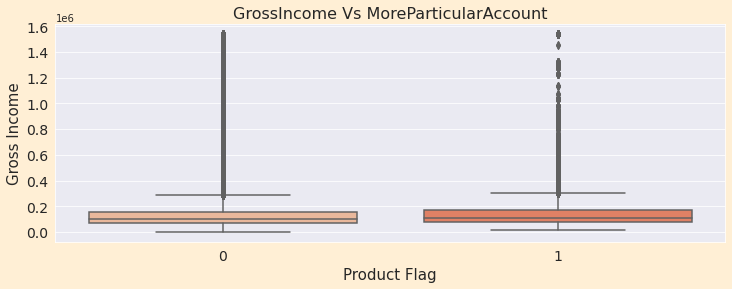

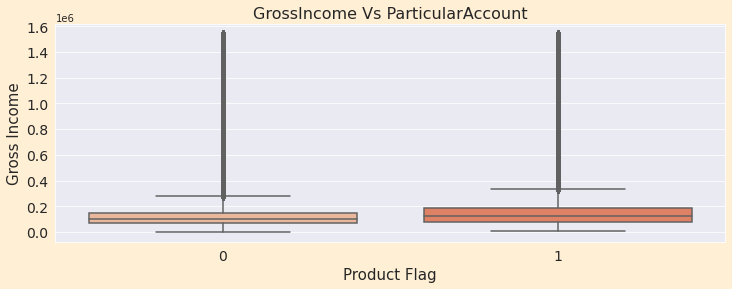

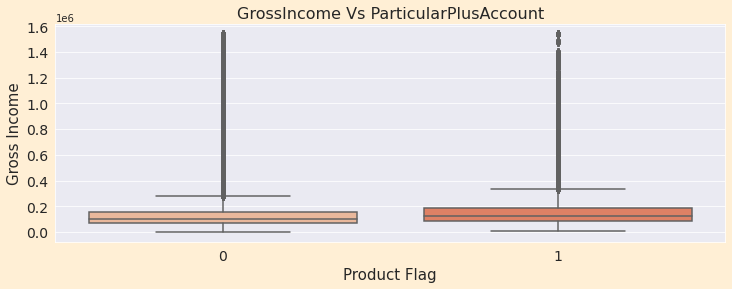

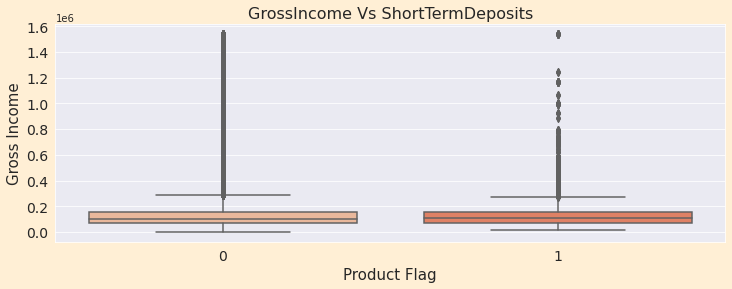

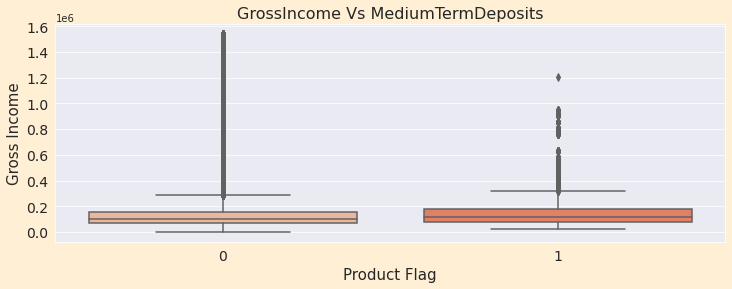

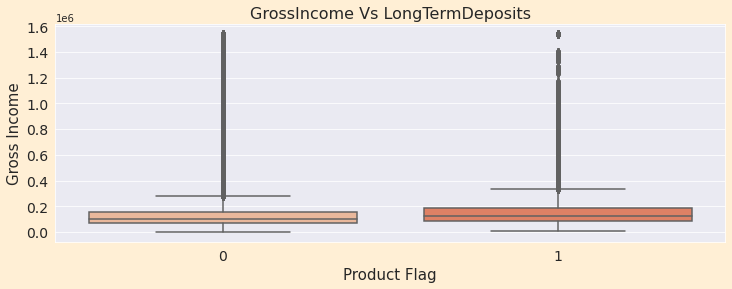

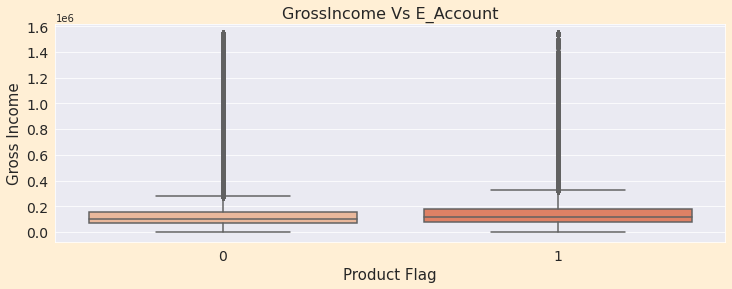

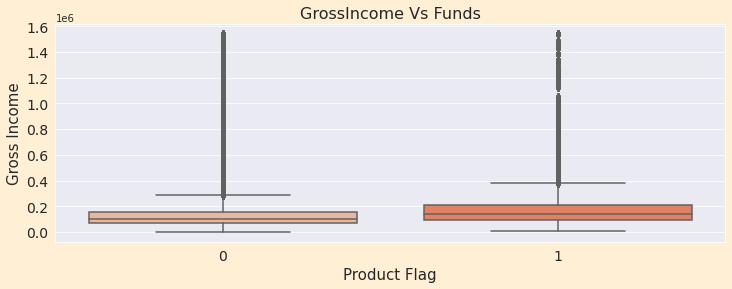

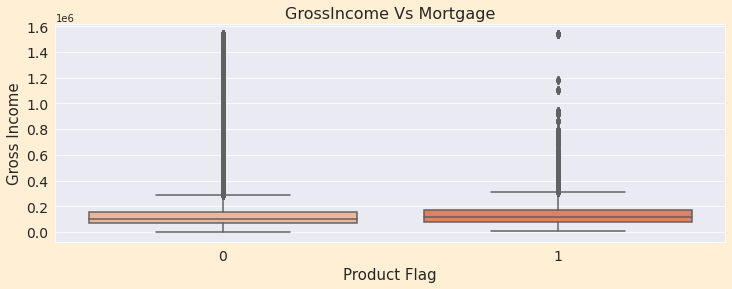

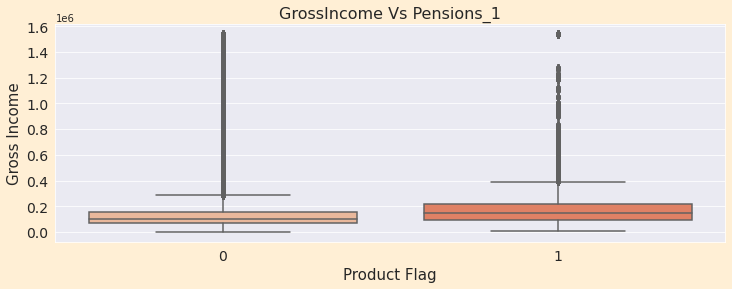

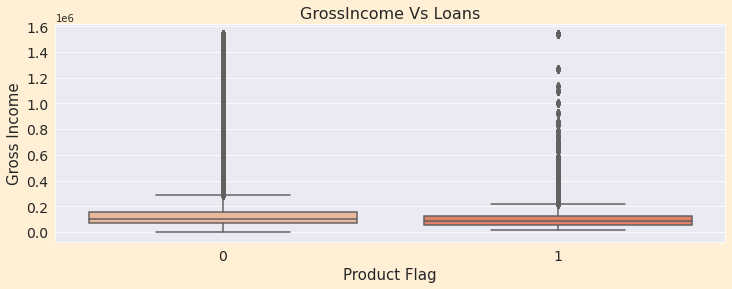

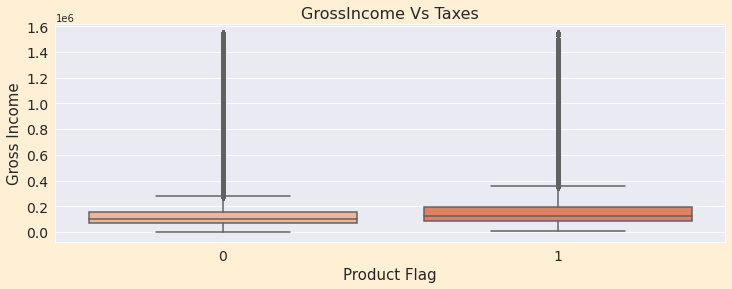

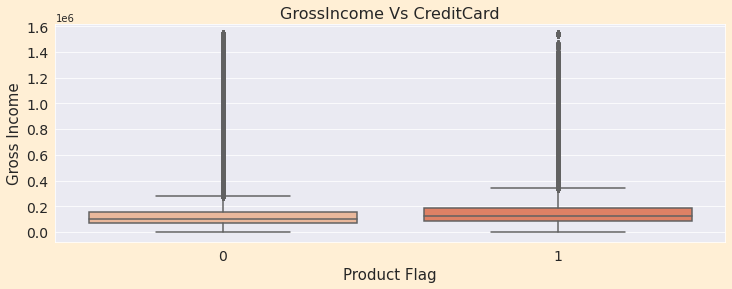

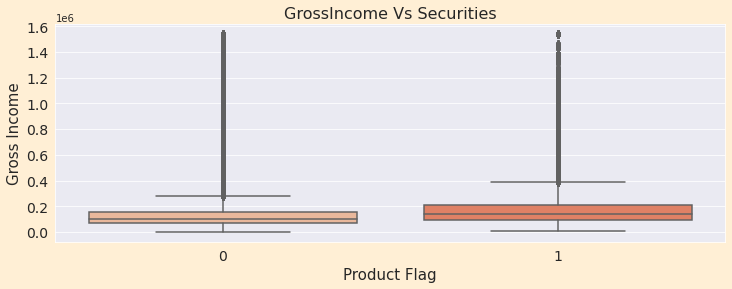

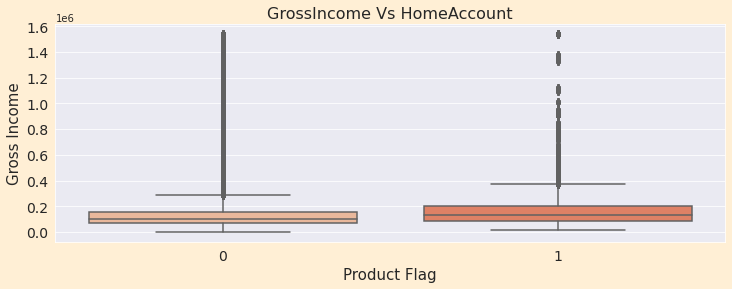

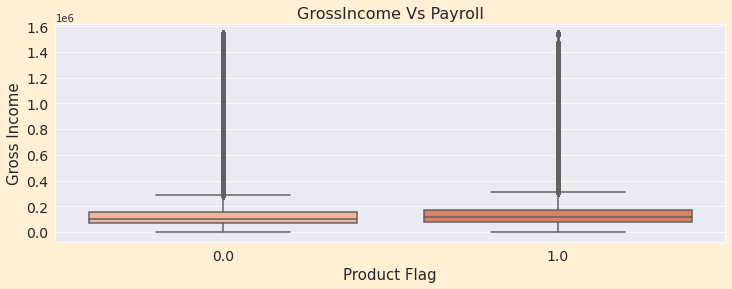

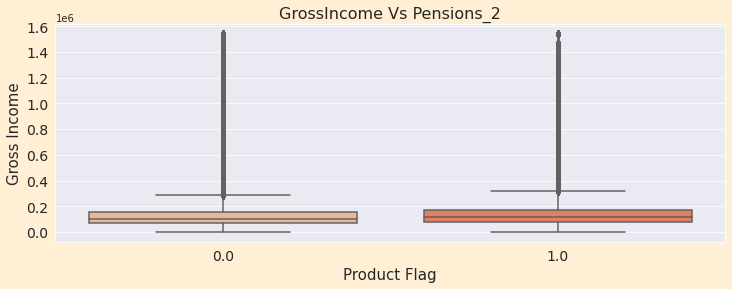

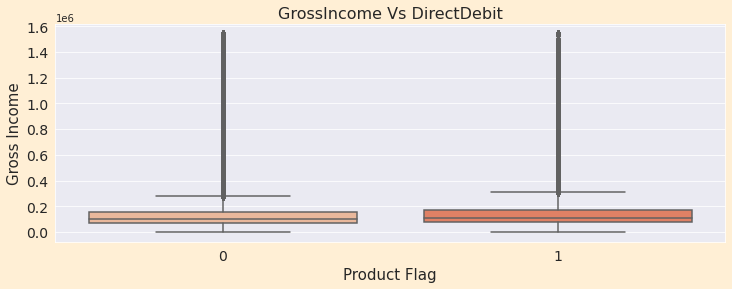

In [ ]:
for prod in products:
  plt.figure(figsize=(12,4),facecolor='papayawhip')
  sns.set_style("darkgrid")
  sns.boxplot(x=products_income_df[prod],y =products_income_df.GrossIncome, palette=sns.color_palette("rocket_r"))
  plt.title('GrossIncome Vs ' + prod, fontsize=16)
  plt.xlabel('Product Flag', fontsize=15)
  plt.ylabel('Gross Income', fontsize=15)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()
  print ("\n")

<font color='blue'><b>Observation:</b></font>
1. Gross Income has huge overlap between product flags for all of the products. None of the products stand-out as such.

In [ ]:
del series_1
del series_2
del series_3
del series_4
del series_5
del series_6
del series_7
del series_8
del series_9
del series_10
del series_11
del series_12
del series_13
del series_14
del series_15
del series_16
del series_17
del series_18
gc.collect()

21629

In [ ]:
del entrydate_df
del entrydate_df_
del entrychannel_df
del prod_active
del prod_age
del prod_age_df
del prod_segment
del prod_sex
del product_count
del product_date_summary
del products_active
del products_active_df
del products_date
del products_entry
del products_income
del products_income_df
gc.collect()


397

In [ ]:
del products_seniority
del products_seniority_df
del products_sex_df
del products_segment_df
gc.collect()

797

In [ ]:
del deceased_df
del deceased_dupe_df
del date_product_df
del channel_product_df
del top_channel_product_df
del segment_df
del products_age_df
del activity_df
del activity_dupe_df
del age_index
del age_values
del gross_income_90th_series
del gross_income_series
del percent_contri
del percent_contri_test
del segment_contribution
del segment_dupe_df
del products_segment
del products_sex
del update_df
gc.collect()

469

<h3><b> 9.8 Treating Outliers and Erroneous values</b> </h3>

<h3><b>9.8.1 Categorical Features</b></h3>

<b>1. Customer Type</b>

In [ ]:
cust_type_dict =  {1.0:"1", "1.0":"1", "1":"1",
                   2.0:"2", "2.0":"2", "2":"2",
                   3.0:"3", "3.0":"3", "3":"3",
                   "4":"4", "4.0":"4", "4":"4",
                   "P":"5"}
train_df['CustomerType'] = train_df.CustomerType.apply(lambda x: cust_type_dict.get(x,x))
test_df['CustomerType'] = test_df.CustomerType.apply(lambda x: cust_type_dict.get(x,x))

In [ ]:
train_df['CustomerType'].value_counts(dropna=False)

1      13490681
NaN      149781
3          4350
2          1317
5           874
4           306
Name: CustomerType, dtype: int64

<b>2. Customer Relation Type</b>

In [ ]:
train_df.loc[train_df["CustomerRelationType"]== 'N',"CustomerRelationType"] = 'I'

In [ ]:
train_df.CustomerRelationType.value_counts(dropna=False)

I      7304879
A      6187123
NaN     149781
P         4656
R          870
Name: CustomerRelationType, dtype: int64

<h3><b>9.8.2 Numerical Features</b></h3>

<b>1. Age </b>

* For customer's age greater than 100, I am replacing it with median age between 30 and 100. 
* Not upper bounding it to be 100 as it can be a false entry.

In [ ]:
train_df.loc[train_df.Age > 100,"Age"] = train_df.loc[(train_df.Age >= 30) & (train_df.Age <= 100),"Age"].median(skipna=True)
test_df.loc[test_df.Age > 100,"Age"]   = test_df.loc[(test_df.Age >= 30) & (test_df.Age <= 100),"Age"].median(skipna=True)

In [ ]:
round(train_df[['Age']].describe().T,0)

count  mean   std  min   25%   50%   75%    max
Age  13619575.0  40.0  17.0  2.0  24.0  39.0  50.0  100.0

In [ ]:
round(test_df[['Age']].describe().T,0)

count  mean   std  min   25%   50%   75%    max
Age  929615.0  40.0  17.0  2.0  25.0  39.0  50.0  100.0

<b>2. Seniority </b>

* Replacing negative value of Seniority with median value.

In [ ]:
train_df.loc[train_df.Seniority == -999999, 'Seniority'] = train_df[train_df.Seniority >= 0].Seniority.median()
test_df.loc[test_df.Seniority == -999999, 'Seniority'] = test_df[test_df.Seniority >= 0].Seniority.median()

In [ ]:
round(train_df[['Seniority']].describe().T,0)

count  mean   std  min   25%   50%    75%    max
Seniority  13619575.0  79.0  66.0  0.0  23.0  50.0  135.0  256.0

In [ ]:
round(test_df[['Seniority']].describe().T,0)

count  mean   std  min   25%   50%    75%    max
Seniority  929615.0  81.0  67.0  0.0  23.0  55.0  136.0  257.0

<b> 3. Gross Income </b>

* As dicussed during univariate analysis of Gross Income, I am upper bounding gross income to be 99.9th percentile value 

In [ ]:
# income_cap = train_df["GrossIncome"].quantile(0.999)
# train_df[train_df["GrossIncome"]>income_cap]

In [ ]:
income_cap = train_df["GrossIncome"].quantile(0.999)

train_df.loc[train_df["GrossIncome"]>income_cap,"GrossIncome"] = income_cap
test_df.loc[test_df["GrossIncome"]>income_cap,"GrossIncome"] = income_cap

In [ ]:
round(train_df[['GrossIncome']].describe().T,0)

count      mean       std     min      25%       50%       75%        max
GrossIncome  10852934.0  131094.0  113646.0  1203.0  68711.0  101850.0  155956.0  1537817.0

In [ ]:
round(test_df[['GrossIncome']].describe().T,0)

count      mean       std     min      25%       50%       75%        max
GrossIncome  701650.0  130876.0  113928.0  1203.0  68491.0  101491.0  155541.0  1537817.0

In [ ]:
del cust_type_dict
del segment_df
del segment_dupe_df
del deceased_df
del deceased_dupe_df
del activity_dupe_df
del activity_df
gc.collect()

239

<h3><b> 9.9 Missing Values</b> </h3>

In [ ]:
# !pip install missingno

In [ ]:
train_df = train_df[['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age',
       'EntryDate', 'New', 'Seniority', 'PrimaryCustomer',
       'LastDateAsPrimaryCustomer', 'CustomerType', 'CustomerRelationType',
       'SameResidenceCountry', 'OtherBirthCountry', 'EmployeeSpouse',
       'EntryChannel', 'Deceased','AddresType', 'ProvinceCode', 'ProvinceName',
        'Active','GrossIncome','Segment', 'SavingAccount', 'Guarantees', 'CurrentAccounts',
       'DerivadaAccount', 'PayrollAccount', 'JuniorAccount',
       'MoreParticularAccount', 'ParticularAccount', 'ParticularPlusAccount',
       'ShortTermDeposits', 'MediumTermDeposits', 'LongTermDeposits',
       'E_Account', 'Funds', 'Mortgage', 'Pensions_1', 'Loans', 'Taxes',
       'CreditCard', 'Securities', 'HomeAccount', 'Payroll', 'Pensions_2',
       'DirectDebit']]

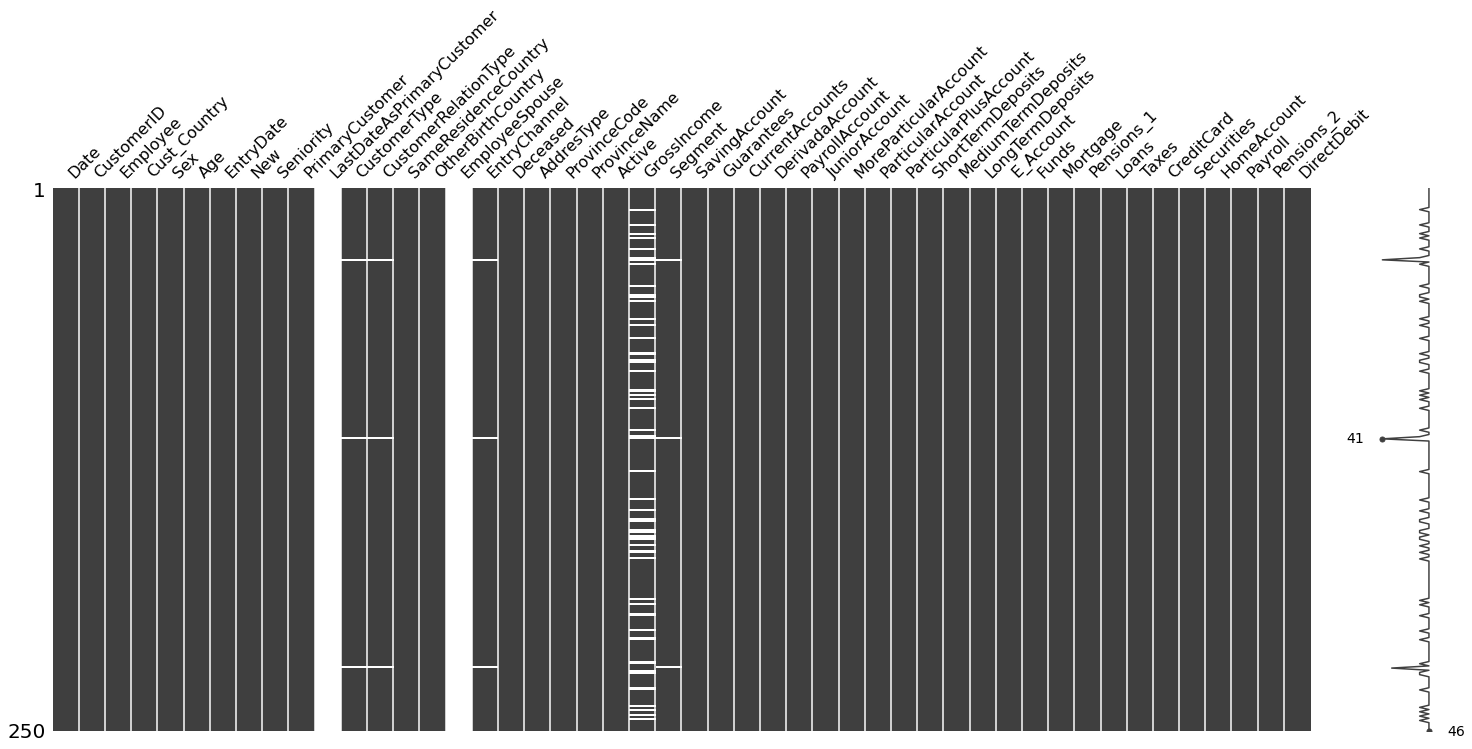

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(train_df.sample(250))

In [ ]:
cust_cat = ['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age',
       'EntryDate', 'New', 'Seniority', 'PrimaryCustomer',
       'LastDateAsPrimaryCustomer', 'CustomerType', 'CustomerRelationType',
       'SameResidenceCountry', 'OtherBirthCountry', 'EmployeeSpouse',
       'EntryChannel', 'Deceased','AddresType', 'ProvinceCode', 'ProvinceName',
        'Active','GrossIncome','Segment']

#exclude LastDateAsPrimaryCustomer and EmployeeSpouse

cust_cat2 = ['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age',
       'EntryDate', 'New', 'Seniority', 'PrimaryCustomer', 'CustomerType', 'CustomerRelationType',
       'SameResidenceCountry', 'OtherBirthCountry',
       'EntryChannel', 'Deceased','AddresType', 'ProvinceCode', 'ProvinceName',
        'Active','GrossIncome','Segment']

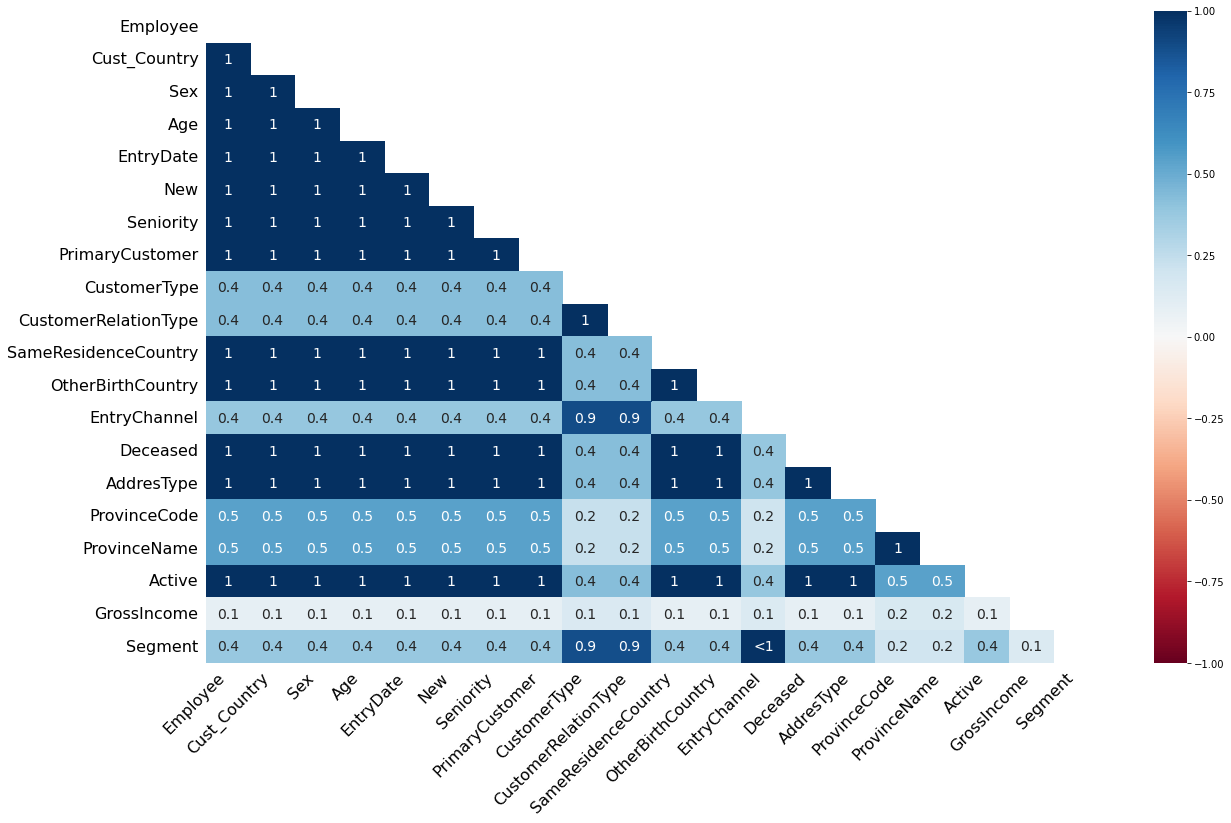

In [ ]:
msno.heatmap(train_df[cust_cat2])

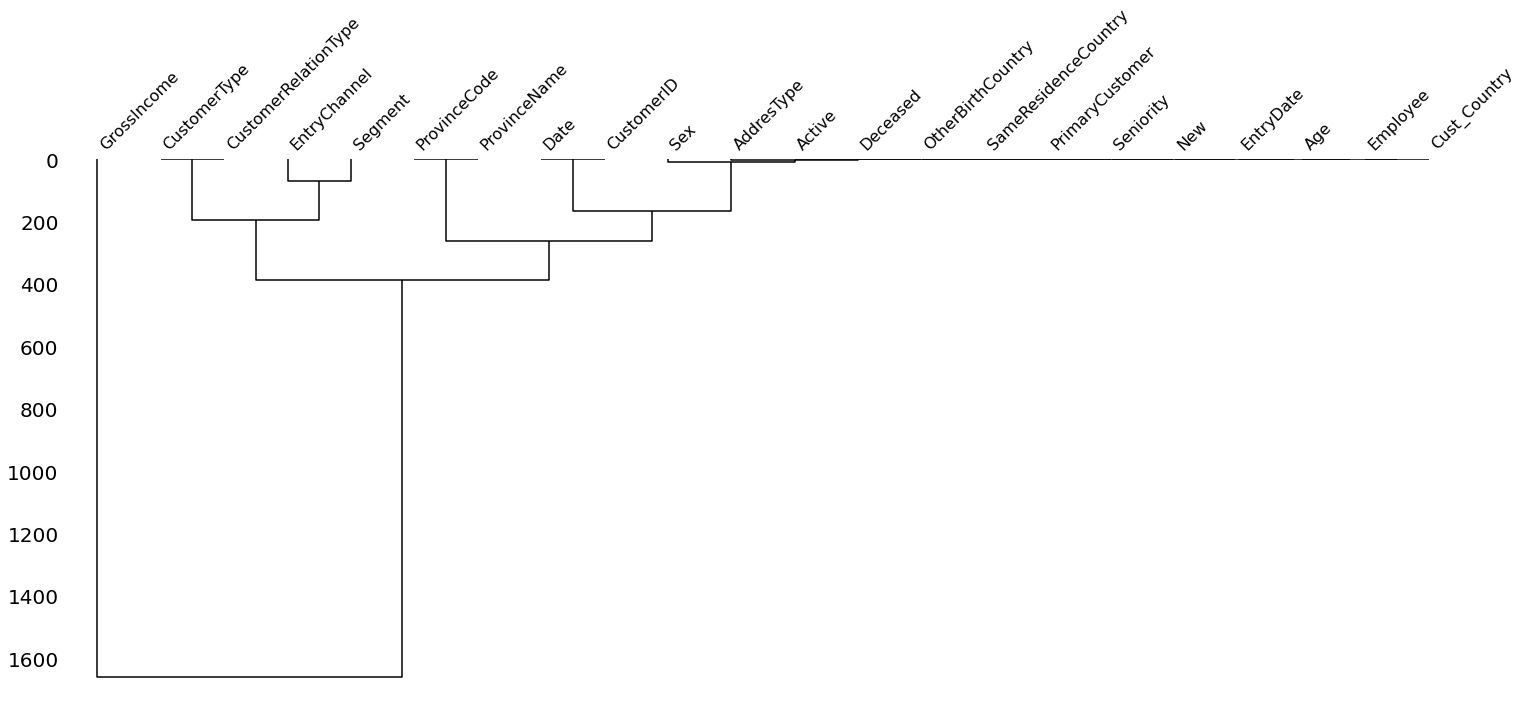

In [ ]:
msno.dendrogram(train_df[cust_cat2])

In [ ]:
pd.DataFrame([train_df.isnull().sum().values,test_df.isnull().sum().values], columns=train_df.isnull().sum().index, index=['Train_missing', 'Test_missing']).T

Train_missing  Test_missing
Date                                 0.0           0.0
CustomerID                           0.0           0.0
Employee                         27734.0           0.0
Cust_Country                     27734.0           0.0
Sex                              27804.0           5.0
Age                              27734.0           0.0
EntryDate                        27734.0           0.0
New                              27734.0           0.0
Seniority                        27734.0           0.0
PrimaryCustomer                  27734.0           0.0
LastDateAsPrimaryCustomer     13622516.0      927932.0
CustomerType                    149781.0          23.0
CustomerRelationType            149781.0          23.0
SameResidenceCountry             27734.0           0.0
OtherBirthCountry                27734.0           0.0
EmployeeSpouse                13645501.0      929511.0
EntryChannel                    186126.0        2081.0
AddresType                       27735.0           0.0
ProvinceCode                     93591.0           0.0
ProvinceName                     93591.0        3996.0
GrossIncome                    2794375.0        3996.0
SavingAccount                        0.0           0.0
Guarantees                           0.0      227965.0
CurrentAccounts                      0.0        2248.0
DerivadaAccount                      0.0           NaN
PayrollAccount                       0.0           NaN
JuniorAccount                        0.0           NaN
MoreParticularAccount                0.0           NaN
ParticularAccount                    0.0           NaN
ParticularPlusAccount                0.0           NaN
ShortTermDeposits                    0.0           NaN
MediumTermDeposits                   0.0           NaN
LongTermDeposits                     0.0           NaN
E_Account                            0.0           NaN
Funds                                0.0           NaN
Mortgage                             0.0           NaN
Pensions_1                           0.0           NaN
Loans                                0.0           NaN
Taxes                                0.0           NaN
CreditCard                           0.0           NaN
Securities                           0.0           NaN
HomeAccount                          0.0           NaN
Payroll                          16063.0           NaN
Pensions_2                       16063.0           NaN
DirectDebit                          0.0           NaN
Segment                              0.0           NaN
Deceased                             0.0           NaN
Active                               0.0           NaN

<i> Note that a lot of features have equal number of missing records which is 27734. This means there are some which only have Date, CustomerID and Target Features. Let's dive deep into it. </i>

In [ ]:
cust_id = list(train_df[train_df['Employee'].isnull()]['CustomerID'].unique())

In [ ]:
(len(cust_id)/train_df['CustomerID'].nunique())*100

0.7672647638361147

<h3><b>9.9.1 Imputing Categorical Features</b></h3>

* To start with, for all the missing values in categorical features, I am creating a new category with value = -99. I will impute them with relevant values if  there is any possibility
* It will be easier for me to label encode the features later

In [ ]:
cat_cols_1 = ['Employee', 'Cust_Country', 'Sex',
                    'New','PrimaryCustomer','CustomerType',
                    'CustomerRelationType','SameResidenceCountry', 
                    'OtherBirthCountry', 'EmployeeSpouse','EntryChannel', 
                    'Deceased', 'AddresType', 'ProvinceCode',
                    'ProvinceName', 'Active', 'Segment']

In [ ]:
for col in cat_cols_1:
  try:
    print ("Columns :",col)
    print (train_df[col].value_counts(dropna=False)[0:10])
    print ("\n")
  except :
    print (train_df[col].value_counts(dropna=False))
    print ("\n")

Columns : Employee
N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: Employee, dtype: int64


Columns : Cust_Country
ES     13553710
NaN       27734
FR         5161
AR         4835
DE         4625
GB         4605
US         3651
CO         3526
IT         2947
RO         2931
Name: Cust_Country, dtype: int64


Columns : Sex
V      7424252
H      6195253
NaN      27804
Name: Sex, dtype: int64


Columns : New
0.0    12808368
1.0      811207
NaN       27734
Name: New, dtype: int64


Columns : PrimaryCustomer
1.0     13594782
NaN        27734
99.0       24793
Name: PrimaryCustomer, dtype: int64


Columns : CustomerType
1      13490681
NaN      149781
3          4350
2          1317
5           874
4           306
Name: CustomerType, dtype: int64


Columns : CustomerRelationType
I      7304879
A      6187123
NaN     149781
P         4656
R          870
Name: CustomerRelationType, dtype: int64


Columns : SameResidenceCountry
S      1355371

In [ ]:
train_df['PrimaryCustomer'] = train_df['PrimaryCustomer'].replace(np.nan, 1)
test_df['PrimaryCustomer'] = test_df['PrimaryCustomer'].replace(np.nan, 1)

In [ ]:
for col in cat_cols_1:
  if col == 'PrimaryCustomer':
    pass
  if col != 'ProvinceName':
    train_df[col] = train_df[col].replace(np.nan, -99)
  elif col == 'ProvinceName':
    train_df[col] = train_df[col].replace(np.nan, 'UNKNOWN')

In [ ]:
for col in cat_cols_1:
  if col == 'PrimaryCustomer':
    pass
  if col != 'ProvinceName':
    test_df[col] = test_df[col].replace(np.nan, -99)
  elif col == 'ProvinceName':
    test_df[col] = test_df[col].replace(np.nan, 'UNKNOWN')

* Checking imputed cateogry -99

In [ ]:
for col in cat_cols_1:
  print ("Columns :",col)
  print (train_df[col].value_counts(dropna=False))
  print ("\n")

Columns : Employee
N      13610977
-99       27734
B          3566
F          2523
A          2492
S            17
Name: Employee, dtype: int64


Columns : Cust_Country
ES     13553710
-99       27734
FR         5161
AR         4835
DE         4625
GB         4605
US         3651
CO         3526
IT         2947
RO         2931
MX         2573
BR         2351
VE         2331
EC         2169
CH         1995
BE         1526
BO         1514
PY         1430
PT         1419
CL          989
PE          900
RU          769
CU          758
NL          757
SE          603
PL          599
CN          563
UY          510
UA          493
BG          476
AT          476
CA          446
AU          424
DO          424
IL          413
IE          409
MA          396
FI          345
HN          282
GR          243
JP          239
DK          226
AE          221
NG          214
IN          187
CR          147
NO          136
GT          130
LU          124
GQ          119
ZA          119
SG          117

* Status after imputing all missing values under '-99' category.

In [ ]:
pd.DataFrame([train_df.isnull().sum().values,test_df.isnull().sum().values], 
             columns=train_df.isnull().sum().index, 
             index=['Train_missing', 'Test_missing']).T

Train_missing  Test_missing
Date                                 0.0           0.0
CustomerID                           0.0           0.0
Employee                             0.0           0.0
Cust_Country                         0.0           0.0
Sex                                  0.0           0.0
Age                              27734.0           0.0
EntryDate                        27734.0           0.0
New                                  0.0           0.0
Seniority                        27734.0           0.0
PrimaryCustomer                      0.0           0.0
LastDateAsPrimaryCustomer     13622516.0      927932.0
CustomerType                         0.0           0.0
CustomerRelationType                 0.0           0.0
SameResidenceCountry                 0.0           0.0
OtherBirthCountry                    0.0           0.0
EmployeeSpouse                       0.0           0.0
EntryChannel                         0.0           0.0
Deceased                             0.0           0.0
AddresType                           0.0           0.0
ProvinceCode                         0.0           0.0
ProvinceName                         0.0           0.0
Active                               0.0           0.0
GrossIncome                    2794375.0      227965.0
Segment                              0.0           0.0
SavingAccount                        0.0           NaN
Guarantees                           0.0           NaN
CurrentAccounts                      0.0           NaN
DerivadaAccount                      0.0           NaN
PayrollAccount                       0.0           NaN
JuniorAccount                        0.0           NaN
MoreParticularAccount                0.0           NaN
ParticularAccount                    0.0           NaN
ParticularPlusAccount                0.0           NaN
ShortTermDeposits                    0.0           NaN
MediumTermDeposits                   0.0           NaN
LongTermDeposits                     0.0           NaN
E_Account                            0.0           NaN
Funds                                0.0           NaN
Mortgage                             0.0           NaN
Pensions_1                           0.0           NaN
Loans                                0.0           NaN
Taxes                                0.0           NaN
CreditCard                           0.0           NaN
Securities                           0.0           NaN
HomeAccount                          0.0           NaN
Payroll                          16063.0           NaN
Pensions_2                       16063.0           NaN
DirectDebit                          0.0           NaN

<h3><b>9.9.2 Imputing Datetime Features</b></h3>

<b> EntryDate</b>

* Filling missing values of 'EntryDate' with the very first date of the customer in the system. 

In [ ]:
cust_first_month = train_df.groupby(["CustomerID"])["Date"].first().reset_index()
assert cust_first_month.shape[0] == train_df.CustomerID.nunique()

In [ ]:
train_df = train_df.merge(cust_first_month, on="CustomerID", how = "left")
train_df.loc[train_df["EntryDate"].isnull(), "EntryDate"] = train_df["Date_y"]
train_df =train_df.drop("Date_y", axis=1)
train_df = train_df.rename(columns = {'Date_x':'Date'})
train_df.head(2)

Date  CustomerID Employee Cust_Country Sex   Age   EntryDate  New  Seniority  PrimaryCustomer LastDateAsPrimaryCustomer CustomerType CustomerRelationType SameResidenceCountry OtherBirthCountry EmployeeSpouse EntryChannel Deceased  AddresType  ProvinceCode ProvinceName  Active  GrossIncome             Segment  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit
0  2015-01-28     1375586        N           ES   H  35.0  2015-01-12  0.0        6.0              1.0                       NaT            1                    A                    S                 N            -99          KHL        N         1.0          29.0       MALAGA     1.0     87218.10   02 - PARTICULARES              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0
1  2015-01-28     1050611        N           ES   V  23.0  2012-08-10  0.0       35.0              1.0                       NaT            1                    I                    S                 S            -99          KHE        N         1.0          13.0  CIUDAD REAL     0.0     35548.74  03 - UNIVERSITARIO              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0

<b> LastDateAsPrimaryCustomer </b>

In [ ]:
print ("Percentage of missing values in LastDateAsPrimaryCustomer feature are",str(round((train_df[train_df.LastDateAsPrimaryCustomer.isnull()].shape[0]/train_df.shape[0])*100,2)) + "%")

Percentage of missing values in LastDateAsPrimaryCustomer feature are 99.82%


* We drop this "LastDateAsPrimaryCustomer" feature.

<h3><b>9.9.3 Imputing Numerical Features</b></h3>

<b>Age</b>

In [ ]:
train_df[['Age']].describe().T

count       mean        std  min   25%   50%   75%    max
Age  13619575.0  40.127446  17.072986  2.0  24.0  39.0  50.0  100.0

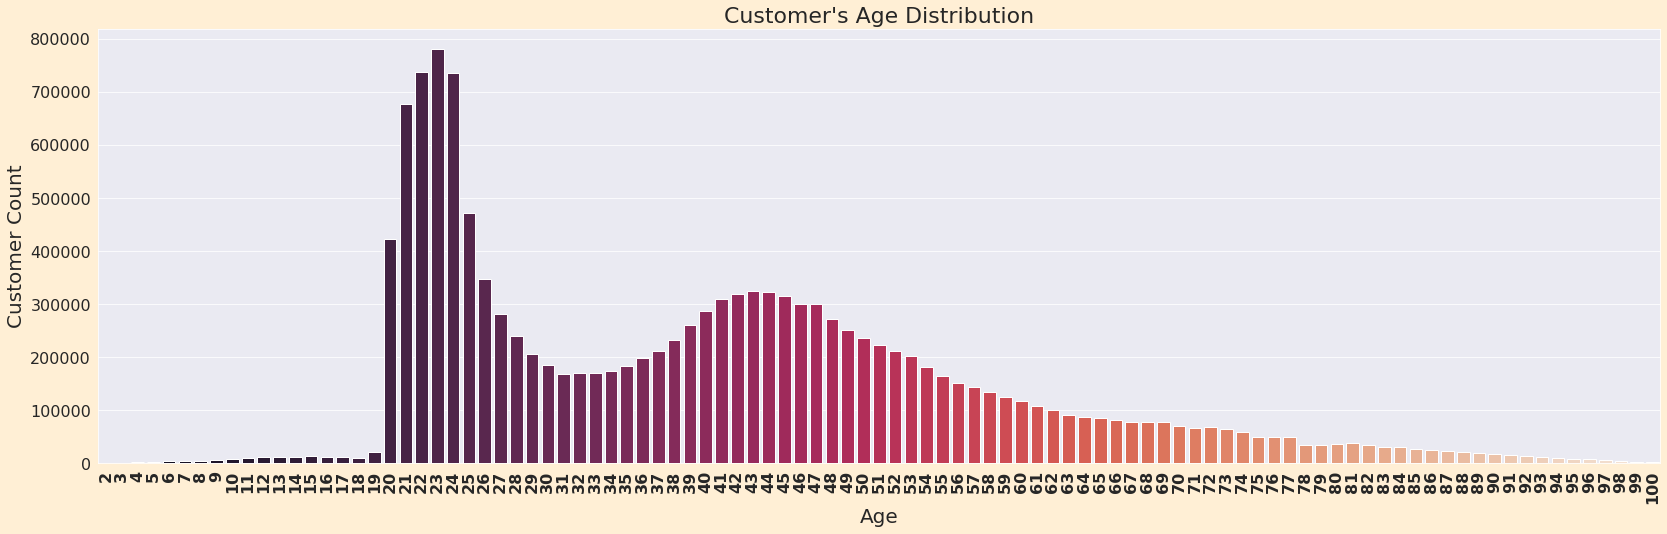

In [ ]:
age_index  = train_df.Age.value_counts().index.astype('int')
age_values = train_df.Age.value_counts()

plt.figure(figsize=(28,8),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.barplot(age_index,age_values,palette="rocket")
plt.xlabel('Age', fontsize=20)
plt.ylabel('Customer Count', fontsize=20)
plt.title("Customer's Age Distribution", fontsize=22)
plt.xticks(fontsize=16,rotation=90,weight='bold')
plt.yticks(fontsize=16)
plt.show()

In [ ]:
train_df[train_df.Age.isnull()].head(10)

Date  CustomerID Employee Cust_Country  Sex  Age   EntryDate   New  Seniority  PrimaryCustomer LastDateAsPrimaryCustomer CustomerType CustomerRelationType SameResidenceCountry OtherBirthCountry EmployeeSpouse EntryChannel Deceased  AddresType  ProvinceCode ProvinceName  Active  GrossIncome Segment  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit  Is_LastDateAsPrimaryCustomer_Present
261   2015-01-28     1050741      -99          -99  -99  NaN  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1029  2015-01-28     1051017      -99          -99  -99  NaN  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1063  2015-01-28     1051064      -99          -99  -99  NaN  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1154  2015-01-28     1051387      -99          -99  -99  NaN  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1779  2015-01-28     1048660      -99          -99  -99  NaN  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0 

* As all the features corresponding to Null values of 'Age' are also missing. <b>Let's impute Age using Mean.</b>

In [ ]:
train_df["Age"].fillna(train_df["Age"].mean(),inplace=True)
train_df["Age"] = train_df["Age"].astype(int)

In [ ]:
round(test_df[["Age"]].describe().T,0)

count  mean   std  min   25%   50%   75%    max
Age  929615.0  40.0  17.0  2.0  25.0  39.0  50.0  100.0

In [ ]:
test_df["Age"].fillna(test_df["Age"].mean(),inplace=True)
test_df["Age"] = test_df["Age"].astype(int)

<b>Seniority</b>

In [ ]:
train_df[train_df.Seniority.isnull()].head()

Date  CustomerID Employee Cust_Country  Sex  Age   EntryDate   New  Seniority  PrimaryCustomer LastDateAsPrimaryCustomer CustomerType CustomerRelationType SameResidenceCountry OtherBirthCountry EmployeeSpouse EntryChannel Deceased  AddresType  ProvinceCode ProvinceName  Active  GrossIncome Segment  SavingAccount  Guarantees  CurrentAccounts  DerivadaAccount  PayrollAccount  JuniorAccount  MoreParticularAccount  ParticularAccount  ParticularPlusAccount  ShortTermDeposits  MediumTermDeposits  LongTermDeposits  E_Account  Funds  Mortgage  Pensions_1  Loans  Taxes  CreditCard  Securities  HomeAccount  Payroll  Pensions_2  DirectDebit  Is_LastDateAsPrimaryCustomer_Present
261   2015-01-28     1050741      -99          -99  -99   40  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1029  2015-01-28     1051017      -99          -99  -99   40  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1063  2015-01-28     1051064      -99          -99  -99   40  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1154  2015-01-28     1051387      -99          -99  -99   40  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0      0           0           0            0      0.0         0.0            0                                   0.0
1779  2015-01-28     1048660      -99          -99  -99   40  2015-01-28 -99.0        NaN            -99.0                       NaT          -99                  -99                  -99               -99            -99          -99      -99       -99.0         -99.0      UNKNOWN   -99.0          NaN     -99              0           0                1                0               0              0                      0                  0                      0                  0                   0                 0          0      0         0           0      0 

* As we have imputed Entry Date as the minimum date of the customer i.e. very first date of the customer in the data.
* We can calculte Seniority by taking difference of Date and Entry date in months.

In [ ]:
train_df.loc[train_df["Seniority"].isnull(),"Seniority"] = ((train_df.loc[train_df["Seniority"].isnull()]["Date"]-train_df.loc[train_df["Seniority"].isnull()]["EntryDate"])/np.timedelta64(1, 'M')).astype(int)

* Imputing Seniority value as difference in months between Entry Date and Date
* Also, note that maximum seniority is 4 months and bank defines a customer to be New if he/she has registered 6 months back. Hence, earlier we imputed missing values of New as -99, we can impute it with 1 now.

In [ ]:
train_df.loc[train_df["New"] == -99, "New"] = 1

<b>Gross Income </b>

In [ ]:
round(train_df[['GrossIncome']].describe().T,0)

count      mean       std     min      25%       50%       75%        max
GrossIncome  10852934.0  131094.0  113646.0  1203.0  68711.0  101850.0  155956.0  1537817.0

In [ ]:
round(train_df[['GrossIncome']].describe().T,0)

count      mean       std     min      25%       50%       75%        max
GrossIncome  10852934.0  131094.0  113646.0  1203.0  68711.0  101850.0  155956.0  1537817.0

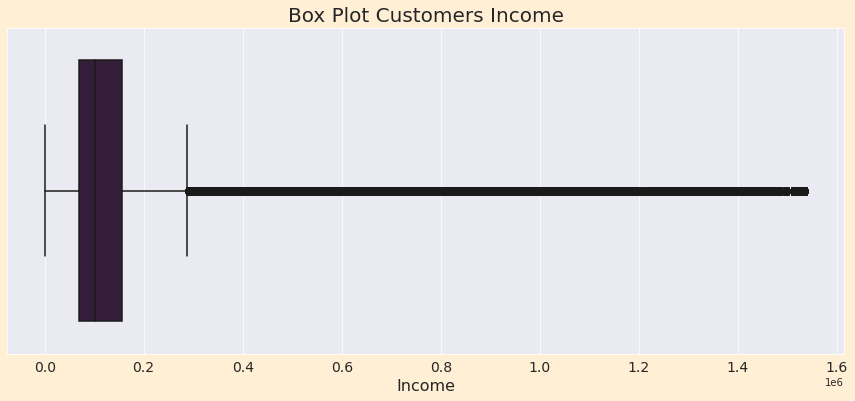

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.boxplot(train_df["GrossIncome"].values,palette=sns.color_palette("rocket"))
plt.xlabel('Income', fontsize=16)
plt.title("Box Plot Customers Income", fontsize=20)
plt.xticks(fontsize=14)
plt.show()

<i>Let's see whether we can impute missing values of Gross Income using customer's Segment information. </i>

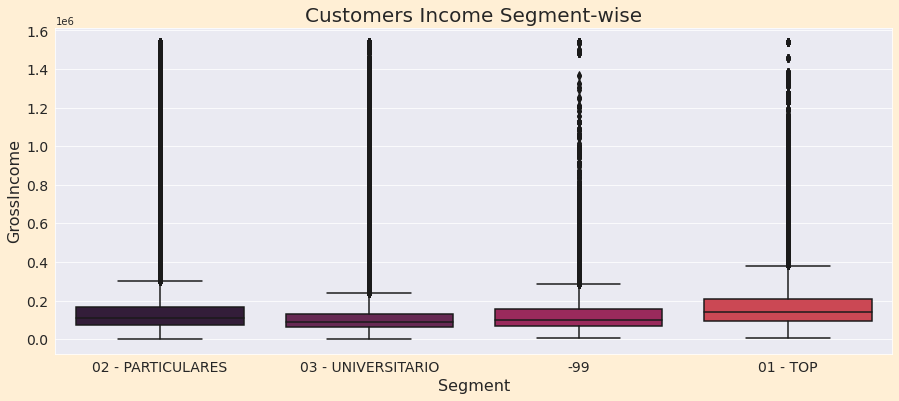

In [ ]:
plt.figure(figsize=(15,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.boxplot(train_df['Segment'], train_df["GrossIncome"].values,palette=sns.color_palette("rocket"))
plt.title("Customers Income Segment-wise", fontsize=20)
plt.xlabel('Segment', fontsize=16)
plt.ylabel("GrossIncome",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Box plots of customers income segement wise is highly overlapping. 

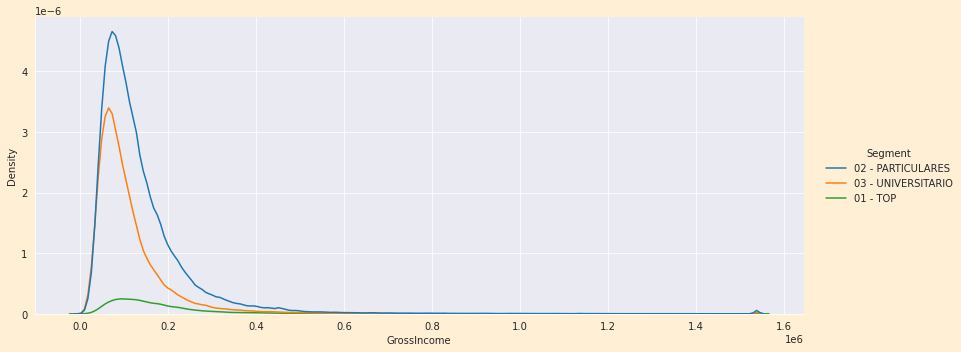

In [ ]:
sns.set_style("darkgrid")
ax = sns.displot(data=train_df, x="GrossIncome", hue="Segment", kind="kde",height=5,aspect=2.3)
ax.figure.set_facecolor('papayawhip')

* Even, PDF of Gross Income of different segements are overlapping. <b>We can't impute Gross Income using Segement.</b>

<i>Let's check whether is it possible to impute income using customers province data. </i>

In [ ]:
province_income = train_df[['ProvinceName','GrossIncome']]
series_20 = province_income.groupby('ProvinceName')['GrossIncome'].nunique().sort_values(ascending=False)

In [ ]:
series_20[0:10]

ProvinceName
MADRID       167141
BARCELONA     61149
VALENCIA      30481
SEVILLA       25991
CORUÑA, A     16961
MURCIA        15306
MALAGA        14516
ZARAGOZA      14105
ALICANTE      13384
CADIZ         12179
Name: GrossIncome, dtype: int64

<i>There are many provinces. It will be tough to visualize all of them in a graph and compare.</i><br>
<i>Let's start with top 5 provinces excluding Madrid as it will dominate in the graph, making hard for us to compare.</i>

In [ ]:
top_5_province = series_20[1:6].index.tolist()
province_income_5 = province_income[province_income.ProvinceName.isin(top_5_province)]

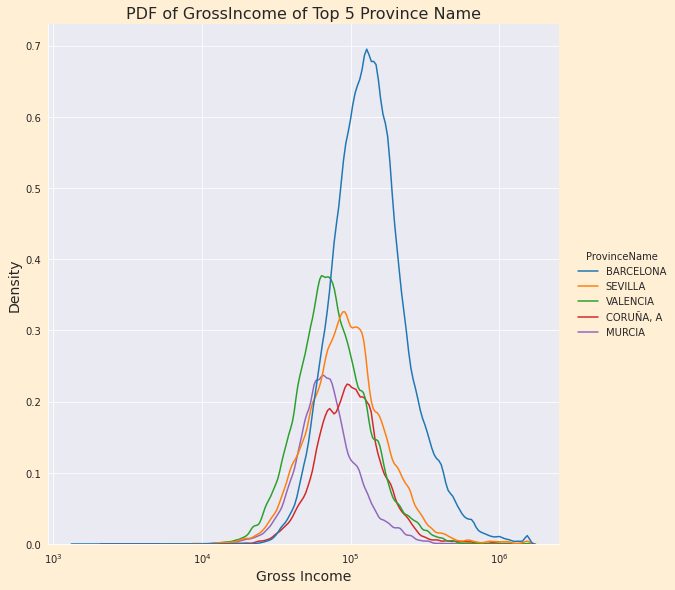

In [ ]:
sns.set_style("darkgrid")
ax = sns.displot(data=province_income_5, x="GrossIncome", hue="ProvinceName", kind="kde",height=8,log_scale=10)
ax.figure.set_facecolor('papayawhip')
plt.xlabel('Gross Income', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title("PDF of GrossIncome of Top 5 Province Name", fontsize=16)
plt.show()

* Well, these PDFs of Gross Income, Province wise are not overlapping as badly as Segment. 
* I think we can use Province to impute, missing incomes. However, to be sure lets check next 5 as well.

In [ ]:
province_5_10 = series_20[5:11].index.tolist()
province_income_5_10 = province_income[province_income.ProvinceName.isin(province_5_10)]

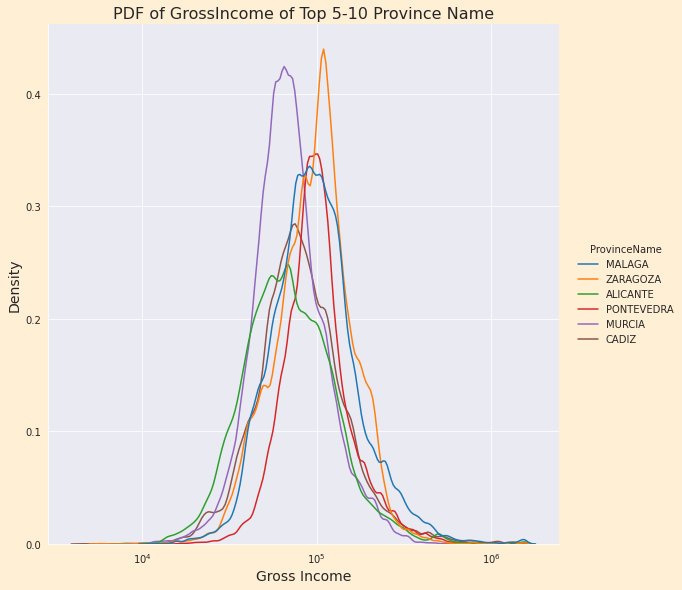

In [ ]:
sns.set_style("darkgrid")
ax = sns.displot(data=province_income_5_10, x="GrossIncome", hue="ProvinceName", kind="kde",height=8,log_scale=10)
ax.figure.set_facecolor('papayawhip')
plt.xlabel('Gross Income', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title("PDF of GrossIncome of Top 5-10 Province Name", fontsize=16)
plt.show()

<b>Well, this looks far better than segment wise PDF. 
Let's impute missing incomes with their Province's median gross income.</b>

In [ ]:
prov_income = train_df.groupby('ProvinceName')['GrossIncome'].median()

In [ ]:
train_df.loc[train_df['GrossIncome'].isnull(), 'GrossIncome'] = train_df.groupby('ProvinceName')['GrossIncome'].transform('median')
test_df.loc[test_df['GrossIncome'].isnull(), 'GrossIncome'] = test_df.groupby('ProvinceName')['GrossIncome'].transform('median')

<h3><b>9.9.4 Imputing Target Features</b></h3>

In [ ]:
train_df['Pensions_2'].value_counts(dropna=False)

0.0    12821161
1.0      810085
NaN       16063
Name: Pensions_2, dtype: int64

In [ ]:
train_df['Payroll'].value_counts(dropna=False)

0.0    12885285
1.0      745961
NaN       16063
Name: Payroll, dtype: int64

* We will impute this with most frequent occurring value which is 0 in this case.

In [ ]:
train_df.loc[train_df["Payroll"].isnull(),"Payroll"] = 0
train_df.loc[train_df["Pensions_2"].isnull(),"Pensions_2"] = 0

In [ ]:
train_df['Payroll'] = train_df['Payroll'].astype('int64')
train_df['Pensions_2'] = train_df['Pensions_2'].astype('int64')

<b>Let's have a final look:<b>

In [ ]:
pd.DataFrame([train_df.isnull().sum().values,test_df.isnull().sum().values], columns=train_df.isnull().sum().index, index=['Train_missing', 'Test_missing']).T

Train_missing  Test_missing
Date                                 0.0           0.0
CustomerID                           0.0           0.0
Employee                             0.0           0.0
Cust_Country                         0.0           0.0
Sex                                  0.0           0.0
Age                                  0.0           0.0
EntryDate                            0.0           0.0
New                                  0.0           0.0
Seniority                            0.0           0.0
PrimaryCustomer                      0.0           0.0
LastDateAsPrimaryCustomer     13622516.0      927932.0
CustomerType                         0.0           0.0
CustomerRelationType                 0.0           0.0
SameResidenceCountry                 0.0           0.0
OtherBirthCountry                    0.0           0.0
EmployeeSpouse                       0.0           0.0
EntryChannel                         0.0           0.0
Deceased                             0.0           0.0
AddresType                           0.0           0.0
ProvinceCode                         0.0           0.0
ProvinceName                         0.0           0.0
Active                               0.0           0.0
GrossIncome                          0.0           0.0
Segment                              0.0           0.0
SavingAccount                        0.0           NaN
Guarantees                           0.0           NaN
CurrentAccounts                      0.0           NaN
DerivadaAccount                      0.0           NaN
PayrollAccount                       0.0           NaN
JuniorAccount                        0.0           NaN
MoreParticularAccount                0.0           NaN
ParticularAccount                    0.0           NaN
ParticularPlusAccount                0.0           NaN
ShortTermDeposits                    0.0           NaN
MediumTermDeposits                   0.0           NaN
LongTermDeposits                     0.0           NaN
E_Account                            0.0           NaN
Funds                                0.0           NaN
Mortgage                             0.0           NaN
Pensions_1                           0.0           NaN
Loans                                0.0           NaN
Taxes                                0.0           NaN
CreditCard                           0.0           NaN
Securities                           0.0           NaN
HomeAccount                          0.0           NaN
Payroll                              0.0           NaN
Pensions_2                           0.0           NaN
DirectDebit                          0.0           NaN

<b>We have treated all the missing values in the Train and Test Data.</b>

<h3><b> 9.10 Reducing Dimensionality</b> </h3>

After EDA and studying behaviour, there are few features which aren't be of much use in modelling for the following reasons :     
1. They have same value throughout the data which implies zero variance, hence no information.
2. Two features are highly correlated. hence using jsut one of them
3. More than 99% of the values are completely missing.
4. Dropping few target features on the basis these two reasons : 
 * No customers have purchased them since Jan'15 
 * They have a clear downward trend, which means their popularity decreases continuously over time. Hence, I would not want to recommend these products to customers

Considering above points following features are being dropped:  

Customer Features    
1. EmployeeSpouse
2. AddresType
3. LastDateAsPrimaryCustomer

Target Features: 
4. SavingAccount
5. Guarantees
6. Short Term Deposits
7. Medium Term Deposits
8. Long term Deposits
9. Mortgage
10. Home Accounts

In [ ]:
train_df.columns

Index(['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age',
       'EntryDate', 'New', 'Seniority', 'PrimaryCustomer',
       'LastDateAsPrimaryCustomer', 'CustomerType', 'CustomerRelationType',
       'SameResidenceCountry', 'OtherBirthCountry', 'EmployeeSpouse',
       'EntryChannel', 'AddresType', 'ProvinceCode', 'ProvinceName',
       'GrossIncome', 'SavingAccount', 'Guarantees', 'CurrentAccounts',
       'DerivadaAccount', 'PayrollAccount', 'JuniorAccount',
       'MoreParticularAccount', 'ParticularAccount', 'ParticularPlusAccount',
       'ShortTermDeposits', 'MediumTermDeposits', 'LongTermDeposits',
       'E_Account', 'Funds', 'Mortgage', 'Pensions_1', 'Loans', 'Taxes',
       'CreditCard', 'Securities', 'HomeAccount', 'Payroll', 'Pensions_2',
       'DirectDebit', 'Segment', 'Deceased', 'Active'],
      dtype='object')

In [ ]:
keep_cols = ['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age',
       'EntryDate', 'New', 'Seniority', 'PrimaryCustomer',
       'CustomerType', 'CustomerRelationType',
       'SameResidenceCountry', 'OtherBirthCountry','EntryChannel','ProvinceCode', 'ProvinceName',
       'GrossIncome', 'Segment', 'Deceased', 'Active',
             'CurrentAccounts','DerivadaAccount', 'PayrollAccount', 'JuniorAccount',
             'MoreParticularAccount', 'ParticularAccount', 'ParticularPlusAccount',
             'E_Account', 'Funds', 'Pensions_1', 'Loans', 'Taxes','CreditCard', 
             'Securities', 'Payroll', 'Pensions_2','DirectDebit']

In [ ]:
train_treated = train_df[keep_cols]

In [ ]:
test_treated = test_df[keep_cols[0:21]]

In [ ]:
for col in cat_cols_1:
  train_df[col] = train_df[col].astype(str)
  test_df[col] = test_df[col].astype(str)

In [ ]:
train_treated.to_pickle('train_treated.pkl')

In [ ]:
test_treated.to_pickle('test_treated.pkl')